## <ins>Import dependencies

In [117]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import scipy.stats as stats
import io
import base64

import warnings
warnings.filterwarnings("ignore")

## <ins>Read in the data from the preprocessed csv files

### df_cleaned

In [118]:
# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath(""))

# Navigate up two levels to reach the Project4 directory
project_dir = os.path.dirname(current_dir)

# Construct the absolute path to the CSV file
file_path = os.path.join(project_dir, "data/df_output/df_cleaned.csv")

# Load the CSV file
df_no_imputed = pd.read_csv(file_path)

# Show the df
df_no_imputed.head(2)

IDUSGS PLAYTYPE   WELLTYPE FORMSIMPLE      TDS   LATITUDE  LONGITUDE  \
0      63    Shale  Shale Gas  Marcellus  54800.0  40.441658 -79.986932   
1      64    Shale  Shale Gas  Marcellus  26100.0  40.441658 -79.986932   

          STATE     COUNTY           PROVINCE  ...  FeTot    K    Li     Mg  \
0  Pennsylvania  Allegheny  Appalachian Basin  ...  27.40  0.0  21.5  295.0   
1  Pennsylvania  Allegheny  Appalachian Basin  ...   6.47  0.0  12.5  188.0   

        Na    SO4     Sr      Zn  CHARGEBAL  BASIN_CATEGORY  
0  12000.0  105.0  736.5  0.0839      -10.5     Appalachian  
1   6920.0  116.0  215.0  0.0321       -3.0     Appalachian  

[2 rows x 34 columns]

In [119]:
df_no_imputed.columns

Index(['IDUSGS', 'PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'TDS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 'WELLNAME', 'API',
       'DEPTHUPPER', 'DEPTHLOWER', 'PERIOD', 'DATESAMPLE', 'PH', 'B', 'Ba',
       'Br', 'HCO3', 'Ca', 'Cl', 'FeTot', 'K', 'Li', 'Mg', 'Na', 'SO4', 'Sr',
       'Zn', 'CHARGEBAL', 'BASIN_CATEGORY'],
      dtype='object')

In [120]:
df_no_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60658 entries, 0 to 60657
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDUSGS          60658 non-null  int64  
 1   PLAYTYPE        60658 non-null  object 
 2   WELLTYPE        60658 non-null  object 
 3   FORMSIMPLE      60658 non-null  object 
 4   TDS             60658 non-null  float64
 5   LATITUDE        60658 non-null  float64
 6   LONGITUDE       60658 non-null  float64
 7   STATE           60658 non-null  object 
 8   COUNTY          60026 non-null  object 
 9   PROVINCE        60658 non-null  object 
 10  REGION          60658 non-null  object 
 11  WELLNAME        54693 non-null  object 
 12  API             34447 non-null  float64
 13  DEPTHUPPER      47354 non-null  float64
 14  DEPTHLOWER      40757 non-null  float64
 15  PERIOD          48402 non-null  object 
 16  DATESAMPLE      46382 non-null  object 
 17  PH              45174 non-null 

### df_cleaned_imputed

In [121]:
# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath(""))

# Navigate up two levels to reach the Project4 directory
project_dir = os.path.dirname(current_dir)

# Construct the absolute path to the CSV file
file_path = os.path.join(project_dir, "data/df_output/df_cleaned_imputed.csv")

# Load the CSV file
df_with_imputed = pd.read_csv(file_path)

# Show the df
df_with_imputed.head(2)

IDUSGS PLAYTYPE   WELLTYPE FORMSIMPLE      TDS   LATITUDE  LONGITUDE  \
0      63    Shale  Shale Gas  Marcellus  54800.0  40.441658 -79.986932   
1      64    Shale  Shale Gas  Marcellus  26100.0  40.441658 -79.986932   

          STATE     COUNTY           PROVINCE  ...  FeTot    K    Li     Mg  \
0  Pennsylvania  Allegheny  Appalachian Basin  ...  27.40  0.0  21.5  295.0   
1  Pennsylvania  Allegheny  Appalachian Basin  ...   6.47  0.0  12.5  188.0   

        Na    SO4     Sr      Zn  CHARGEBAL  BASIN_CATEGORY  
0  12000.0  105.0  736.5  0.0839      -10.5     Appalachian  
1   6920.0  116.0  215.0  0.0321       -3.0     Appalachian  

[2 rows x 34 columns]

In [122]:
df_with_imputed.columns

Index(['IDUSGS', 'PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'TDS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 'WELLNAME', 'API',
       'DEPTHUPPER', 'DEPTHLOWER', 'PERIOD', 'DATESAMPLE', 'PH', 'B', 'Ba',
       'Br', 'HCO3', 'Ca', 'Cl', 'FeTot', 'K', 'Li', 'Mg', 'Na', 'SO4', 'Sr',
       'Zn', 'CHARGEBAL', 'BASIN_CATEGORY'],
      dtype='object')

In [123]:
df_with_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60658 entries, 0 to 60657
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDUSGS          60658 non-null  int64  
 1   PLAYTYPE        60658 non-null  object 
 2   WELLTYPE        60658 non-null  object 
 3   FORMSIMPLE      60658 non-null  object 
 4   TDS             60658 non-null  float64
 5   LATITUDE        60658 non-null  float64
 6   LONGITUDE       60658 non-null  float64
 7   STATE           60658 non-null  object 
 8   COUNTY          60026 non-null  object 
 9   PROVINCE        60658 non-null  object 
 10  REGION          60658 non-null  object 
 11  WELLNAME        54693 non-null  object 
 12  API             34447 non-null  float64
 13  DEPTHUPPER      60658 non-null  float64
 14  DEPTHLOWER      40757 non-null  float64
 15  PERIOD          48402 non-null  object 
 16  DATESAMPLE      46382 non-null  object 
 17  PH              45174 non-null 

### df_{basin}_pca_with_target

In [124]:
# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath(""))

# Navigate up two levels to reach the Project4 directory
project_dir = os.path.dirname(current_dir)

dfs = []  # Create an empty list to store dataframes
basins = df_with_imputed['BASIN_CATEGORY'].unique()

for basin in basins:
    # Construct the absolute path to the CSV file
    file_path = os.path.join(project_dir, f"data/pca_data/byBasin_pca/{basin}_pca_with_target.csv")

    # Load the CSV file
    df = pd.read_csv(file_path)

    # Add a new column for the basin name
    df['BASIN_CATEGORY'] = basin

    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all the dataframes into one
df_pca_all_basins = pd.concat(dfs, ignore_index=True)

# Show the combined dataframe
print('Combined Dataframe:')
print('===============================')
print(df_pca_all_basins.head(2))
print('-------------------------------')
print(df_pca_all_basins.info())


Combined Dataframe:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.266081  1.874993  3.506635 -0.032301  0.030829 -0.788981 -0.449659   
1 -3.312880  1.560057  2.655659  0.048384  0.517013 -1.890688 -0.462558   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.058008 -1.115495 -1.019037 -0.773039 -0.126684  0.110222 -0.054233   
1 -0.556231 -0.148876 -0.132370 -0.226743 -0.031409  0.125099  0.028728   

       PC15    Li BASIN_CATEGORY  
0  0.026171  21.5    Appalachian  
1 -0.001987  12.5    Appalachian  
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60658 entries, 0 to 60657
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PC1             60658 non-null  float64
 1   PC2             60658 non-null  float64
 2   PC3             60658 non-null  float64
 3   PC4             60658 non-null  float64
 4   PC5    

### Constraining to Gulf Coast Basin Only (to help interim runtime)

In [125]:
df_no_imputed = df_no_imputed[df_no_imputed['BASIN_CATEGORY'] == 'Gulf Coast']
df_with_imputed = df_with_imputed[df_with_imputed['BASIN_CATEGORY'] == 'Gulf Coast']
df_pca_all_basins = df_pca_all_basins[df_pca_all_basins['BASIN_CATEGORY'] == 'Gulf Coast']

## <ins>Generate SVR regression models for each basin for consideration

### Establishing function for running models for each Basin given certain variable inputs

In [126]:
def generate_svr_models_by_basin(df, round, basins, categorical_columns, test_size, random_state, kernel_values, c_values, epsilon_values):
    
    df_starting = df.copy()

    # Create an empty list to store results for each basin
    results_list = []

    for basin in basins:
        
        print('===============================')
        print(f'{basin}')
        print('===============================')

        '''--------------------------------------------------------------------------------------------------------------'''
        '''Finalize data preprocessing per input variables / requirements of SVR regression model'''

        # Drop rows from anything that isn't the 'basin' at hand
        df_basin = df_starting[df_starting['BASIN_CATEGORY'] == basin]

        # Drop the 'Basin' column as it is no longer needed
        df_basin.drop('BASIN_CATEGORY', axis=1, inplace=True)

        # Drop null values in the 'Li' (target) column
        df_basin.dropna(subset=['Li'], inplace=True)

        # Drop any remaining null values
        df_basin.dropna(inplace=True)

        # Get the remaining number of rows
        num_rows = df_basin.shape[0]
        print("Number of data points: ", num_rows)

        if num_rows > 0:

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Encode categorical features (if any)'''

            # One-hot encode categorical variables (if any); if none provided, this is skipped
            if categorical_columns:
                df_basin = pd.get_dummies(df_basin, columns=categorical_columns, dtype=int)
            
            '''--------------------------------------------------------------------------------------------------------------'''
            '''Split testing/training sets'''

            # Splitting the data into features (X) and the target variable (y)
            y = df_basin['Li'].copy()                   # Target variable
            X = df_basin.drop(columns=['Li']).copy()    # Features

            # Splitting the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Scale features'''

            if 'pca' not in round:
                # Standardize features by removing the mean and scaling to unit variance
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Train & test model'''

            # Create a parameter grid
            param_grid = {'kernel': kernel_values, 'C': c_values, 'epsilon': epsilon_values}

            # Determine the number of splits for cross-validation
            n_samples = X_train.shape[0]
            # Print the number of samples in the training dataset
            print("Number of samples in the training dataset:", n_samples)
            n_splits = min(5, n_samples)  # Use 5 splits or the number of samples, whichever is smaller
            n_splits = max(2, n_splits)  # Ensure there are at least 2 splits

            # Perform grid search with cross-validation
            grid_search = GridSearchCV(SVR(), param_grid, cv=n_splits, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)

            # Get the best parameters
            best_params = grid_search.best_params_
            print("Best parameters:", best_params)

            # Get the actual values used in the model
            best_kernel = best_params['kernel']
            best_C = best_params['C']
            best_epsilon = best_params['epsilon']

            # Get the best model
            best_model = grid_search.best_estimator_

            # Evaluate the best model
            y_pred = best_model.predict(X_test)

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Get all the performance metrics...'''

            # Calculate the mean squared error and the root mean squared error
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            # Calculate the variance of the target variable
            target_variance = np.var(y_test)

            # Calculate the mean absolute error
            mae = mean_absolute_error(y_test, y_pred)
            
            # Calculate R-squared
            r2 = r2_score(y_test, y_pred)

            # Calculate the percentage of predictions within certain percentage ranges
            percentage_ranges = [5, 15, 25, 50]  # Percentage ranges
            within_ranges = {}
            for percentage in percentage_ranges:
                threshold = (percentage / 100) * np.mean(y_test)
                within_ranges[f'within_{percentage}_percent'] = np.mean(np.abs(y_test - y_pred) <= threshold) * 100

            # Calculate percentage differences between predicted and actual values
            percentage_diff = (np.abs(y_pred - y_test) / y_test) * 100
            # Calculate the actual percentage range
            min_percentage_range = np.min(percentage_diff)
            max_percentage_range = np.max(percentage_diff)

            # Quantile regression loss at 25th, 50th, and 75th percentiles
            quantiles = [0.25, 0.5, 0.75]
            quantile_losses = [np.percentile(np.abs(y_test - y_pred), q * 100) for q in quantiles]

            # Perform k-fold cross-validation
            kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            cv_scores = cross_val_score(best_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

            # Convert scores to positive values
            cv_scores = -cv_scores

            # Print all the the metrics
            print('-------------------------------')
            print("MODEL PERFORMANCE METRICS")
            print('-------------------------------')
            print("Variance of the target variable:", target_variance)
            print("MSE of the model:", mse)
            if mse < target_variance:   # Compare the MSE to the variance
                print("The model's MSE is smaller than the variance of the target variable.")
                print("The model is capturing a significant portion of the variability in the target variable.")
            else:
                print("The model's MSE is close to or larger than the variance of the target variable.")
                print("The model's performance may be limited compared to the variability of the target variable.")
            print("RMSE of the model:", rmse)
            print("MAE of the best SVR model:", mae)
            print('-------------------------------')
            print("R-squared (Coefficient of Determination):", r2)
            print('-------------------------------')
            print(f"Percentage of predictions within different tolerance levels:")
            for percentage in percentage_ranges:
                print(f"±{percentage}%: ", within_ranges[f'within_{percentage}_percent'])
            print('-------------------------------')
            print(f"Minimum percentage difference: {min_percentage_range:.2f}%")
            print(f"Maximum percentage difference: {max_percentage_range:.2f}%")
            print('-------------------------------')
            print("Quantile regression loss:")
            for q, loss in zip(quantiles, quantile_losses):
                print(f"Quantile {q}: {loss}")
            print('-------------------------------')
            print("Cross-validation MSE scores:", cv_scores)
            print("Mean cross-validation MSE:", np.mean(cv_scores))
            print('-------------------------------')

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Generate descriptive plots'''

            #Directory where plots are saved
            model_type = 'svr'
            model_title_format = 'SVR'
            image_folder_path = f'../../images/{model_type}'

            # Plot actual vs predicted values
            plt.scatter(y_test, y_pred, alpha=0.5)
            plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
            colors = ['lightblue', 'lightgreen', 'palegoldenrod', 'lightsalmon']
            for i, percentage in enumerate(percentage_ranges):
                threshold = (percentage / 100) * np.mean(y_test)
                plt.plot([min(y_test), max(y_test)], [min(y_test) + threshold, max(y_test) + threshold],
                        linestyle='--', color=colors[i], label=f'Within {percentage}%')
                plt.plot([min(y_test), max(y_test)], [min(y_test) - threshold, max(y_test) - threshold],
                        linestyle='--', color=colors[i])
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.title(f'Actual vs Predicted Li Concentrations for {basin}\n{model_title_format} (Kernel: {best_kernel}, C: {best_C}, $\epsilon$: {best_epsilon})')
            plt.legend()
            image_file_name = f"{basin.replace(' ', '')}_actual_vs_predicted_{model_type}_round_{round}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            # Plot histogram of predicted Li concentration values
            plt.hist(y_pred, bins=20)
            plt.xlabel('Predicted Li Concentration')
            plt.ylabel('Frequency')
            plt.title(f'Histogram of Predicted Li Concentrations for {basin}\n{model_title_format} (Kernel: {best_kernel}, C: {best_C}, $\epsilon$: {best_epsilon})')
            image_file_name = f"{basin.replace(' ', '')}_histogram_of_predicted_{model_type}_round_{round}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            # Plot histogram of residuals
            residuals = y_test - y_pred
            plt.hist(residuals, bins=20)
            plt.xlabel('Residuals')
            plt.ylabel('Frequency')
            plt.title(f'Histogram of Residuals for {basin}\n{model_title_format} (Kernel: {best_kernel}, C: {best_C}, $\epsilon$: {best_epsilon})')
            image_file_name = f"{basin.replace(' ', '')}_histogram_of_residuals_{model_type}_round_{round}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            # Create a Q-Q plot of residuals
            stats.probplot(residuals, dist="norm", plot=plt)
            plt.title(f'Q-Q Plot of Residuals for {basin}\n{model_title_format} (Kernel: {best_kernel}, C: {best_C}, $\epsilon$: {best_epsilon})')
            image_file_name = f"{basin.replace(' ', '')}_qq_plot_of_residuals_{model_type}_round_{round}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Add results to a list to feed to the results dataframe'''

            # Append results to the list
            results_list.append([round, basin, num_rows, len(X.columns), list(X.columns), kernel_values, best_kernel, c_values, best_C, 
                                 epsilon_values, best_epsilon, target_variance, mse, rmse, mae, r2] + list(within_ranges.values()) + 
                                 [min_percentage_range, max_percentage_range, quantile_losses[0], quantile_losses[1], quantile_losses[2], 
                                 np.mean(cv_scores)])

        else: 
            print(f'No round{round} model generated for {basin}.')

    # Create a DataFrame from the results list
    columns = ['round', 'basin', 'data_row_count','feature_quantity', 'feature_list', 'kernel_options', 'best_kernel', 'c_options', 'best_c', 
               'epsilon_options', 'best_epsilon', 'target_variable_variance', 'mse', 'rmse', 'mae', 'r2'] + [f'within_{percentage}_percent' for percentage in percentage_ranges] + [
               'results_min%_difference', 'results_max%_difference', '0.25_quantile_loss', '0.5_quantile_loss', '0.75_quantile_loss', 'cross_val_mse']
    
    df_results = pd.DataFrame(results_list, columns=columns)

    # Round all values in the DataFrame to two decimal places
    df_results = df_results.round(2)

    # Sort the DataFrame
    df_results.sort_values(by=['within_15_percent'], ascending=False, inplace=True)

    return df_results


### INPUT: PCA

In [127]:
# Define the input df for this section
df = df_pca_all_basins.copy()

# Define variables that are common to all rounds
basins = df['BASIN_CATEGORY'].unique()
categorical_columns = []

#### ROUND 1

Gulf Coast
Number of data points:  888
Number of samples in the training dataset: 621


Best parameters: {'C': 1, 'epsilon': 0.5, 'kernel': 'poly'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 16797.03549157902
MSE of the model: 11098.961942813743
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 105.35161101195246
MAE of the best SVR model: 24.50825419532195
-------------------------------
R-squared (Coefficient of Determination): 0.3392309048594879
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  27.340823970037455
±15%:  61.79775280898876
±25%:  67.41573033707866
±50%:  78.27715355805243
-------------------------------
Minimum percentage difference: 0.30%
Maximum percentage difference: 874.13%
-------------------------------
Quantile regression loss:
Quantile 0.25: 2.554290830173306
Quantile 0.5: 4.60842000943839
Quanti

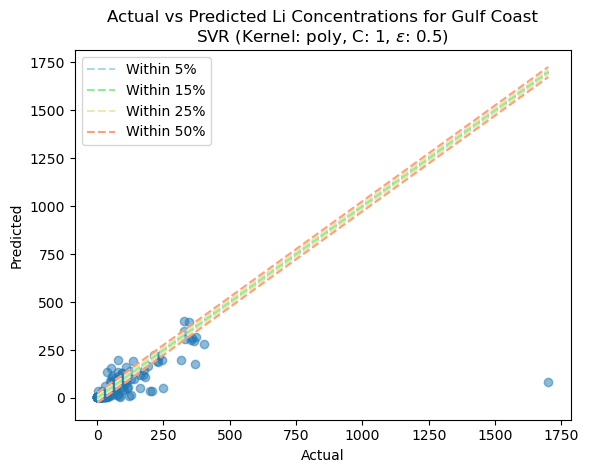

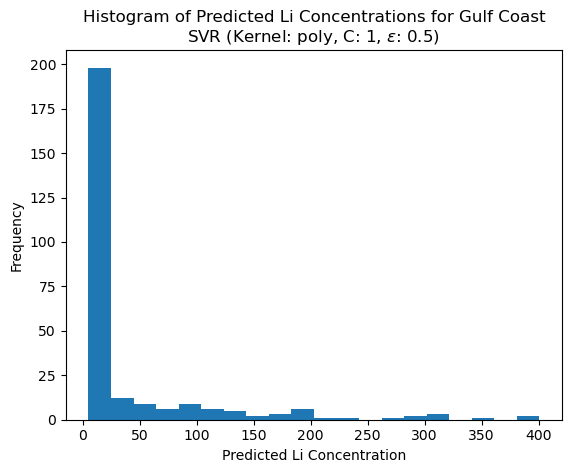

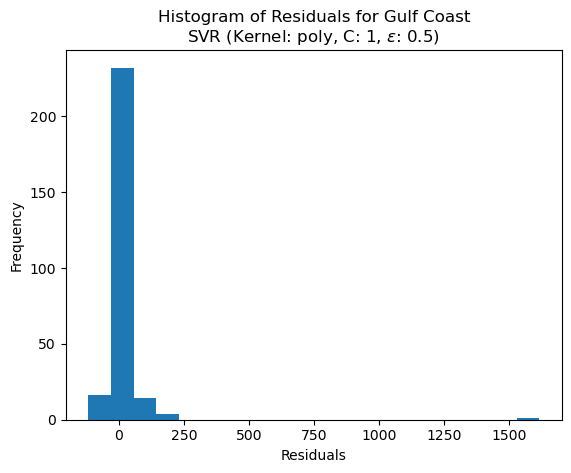

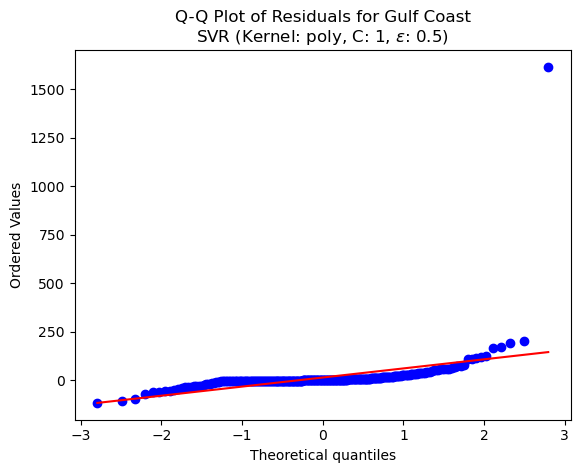

round       basin  data_row_count  feature_quantity  \
0  01_pca  Gulf Coast             888                15   

                                        feature_list       kernel_options  \
0  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [linear, rbf, poly]   

  best_kernel     c_options  best_c   epsilon_options  ...  within_5_percent  \
0        poly  [0.1, 1, 10]       1  [0.01, 0.1, 0.5]  ...             27.34   

   within_15_percent  within_25_percent  within_50_percent  \
0               61.8              67.42              78.28   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                      0.3                   874.13                2.55   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               4.61               21.59        5375.06  

[1 rows x 26 columns]

In [128]:
# Define all the variables...
round = '01_pca'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
epsilon_values = [0.01, 0.1, 0.5]

# Run the function...
df_round01_pca = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round01_pca

#### ROUND 2

Gulf Coast
Number of data points:  888
Number of samples in the training dataset: 621


Best parameters: {'C': 100, 'epsilon': 0.5, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 16797.03549157902
MSE of the model: 10737.259820432513
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 103.62074995111989
MAE of the best SVR model: 15.360032473600379
-------------------------------
R-squared (Coefficient of Determination): 0.36076459290596274
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  46.81647940074906
±15%:  71.91011235955057
±25%:  78.27715355805243
±50%:  91.38576779026218
-------------------------------
Minimum percentage difference: 0.26%
Maximum percentage difference: 1544.83%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.9761503213300871
Quantile 0.5: 2.953282090644541
Q

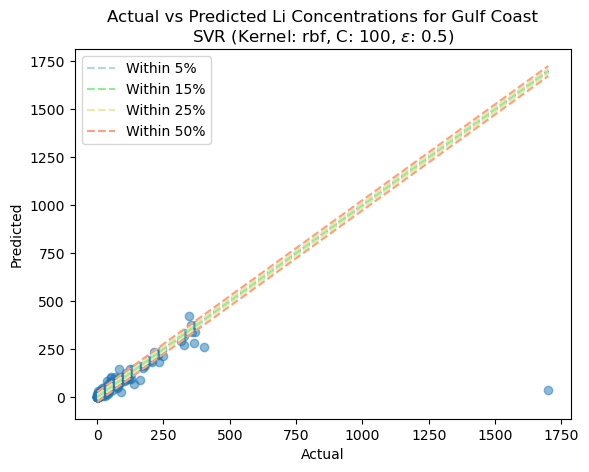

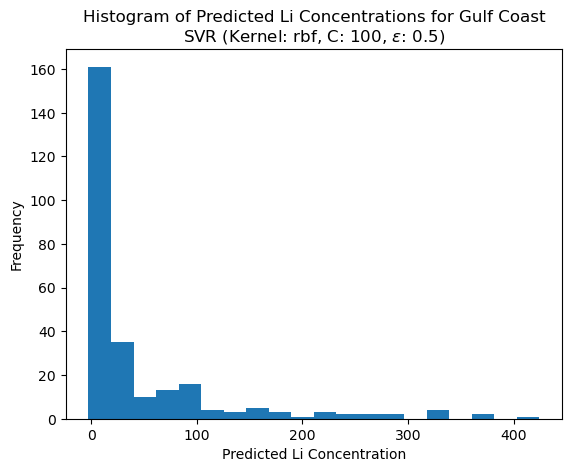

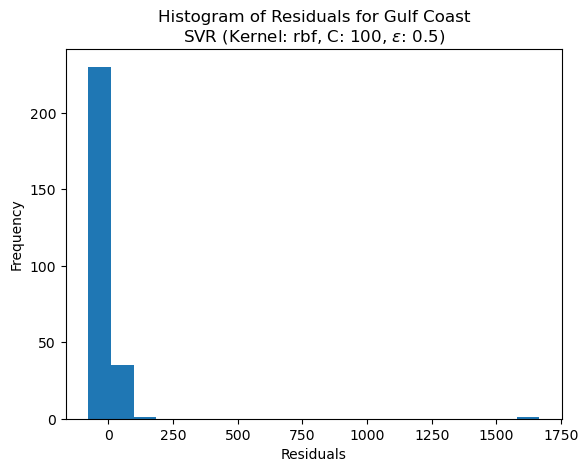

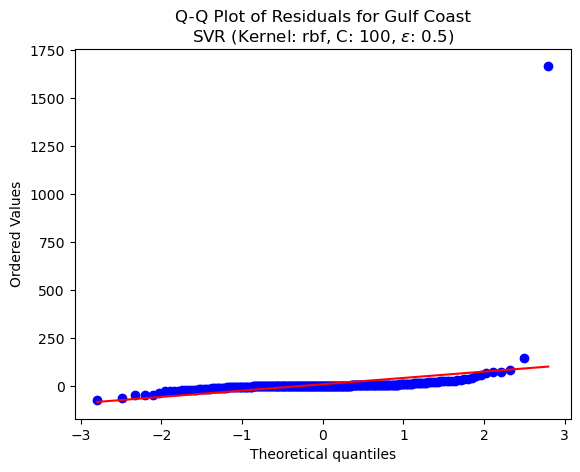

round       basin  data_row_count  feature_quantity  \
0  02_pca  Gulf Coast             888                15   

                                        feature_list  \
0  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   

                 kernel_options best_kernel                      c_options  \
0  [linear, rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50, 100]   

   best_c              epsilon_options  ...  within_5_percent  \
0     100  [0.01, 0.05, 0.1, 0.2, 0.5]  ...             46.82   

   within_15_percent  within_25_percent  within_50_percent  \
0              71.91              78.28              91.39   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.26                  1544.83                0.98   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               2.95               10.39         4703.4  

[1 rows x 26 columns]

In [129]:
# Define all the variables...
round = '02_pca'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50, 100]
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.5]

# Run the function...
df_round02_pca = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round02_pca

#### ROUND 3

Gulf Coast
Number of data points:  888
Number of samples in the training dataset: 666


Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 19313.61518772352
MSE of the model: 12733.489156997246
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 112.842762980163
MAE of the best SVR model: 16.692875781054706
-------------------------------
R-squared (Coefficient of Determination): 0.34069882654122996
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  50.45045045045045
±15%:  72.07207207207207
±25%:  78.82882882882883
±50%:  91.44144144144144
-------------------------------
Minimum percentage difference: 0.78%
Maximum percentage difference: 1538.96%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.9332110352585445
Quantile 0.5: 2.6711820908543658
Qua

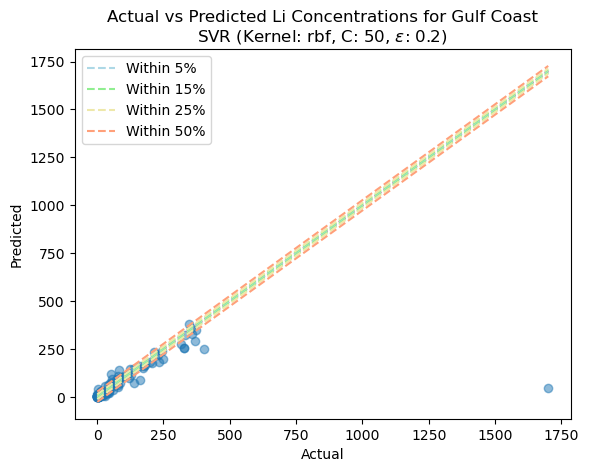

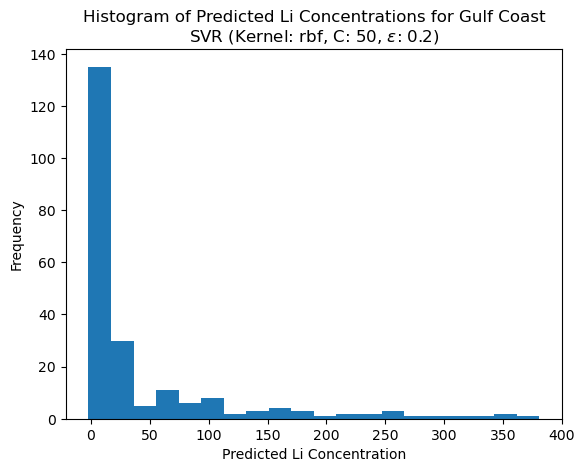

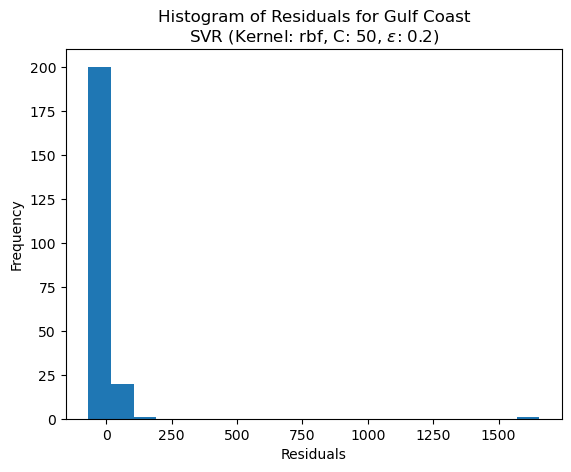

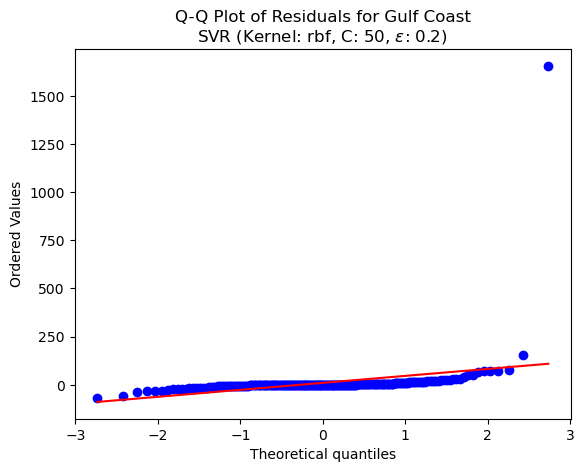

round       basin  data_row_count  feature_quantity  \
0  03_pca  Gulf Coast             888                15   

                                        feature_list        kernel_options  \
0  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   

  best_kernel                 c_options  best_c         epsilon_options  ...  \
0         rbf  [0.1, 0.5, 1, 5, 10, 50]      50  [0.01, 0.05, 0.1, 0.2]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             50.45              72.07              78.83              91.44   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.78                  1538.96                0.93   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               2.67               10.61        4752.45  

[1 rows x 26 columns]

In [130]:
# Define all the variables...
round = '03_pca'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50]
epsilon_values = [0.01, 0.05, 0.1, 0.2]

# Run the function...
df_round03_pca = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round03_pca

#### ROUND 4

Gulf Coast
Number of data points:  888
Number of samples in the training dataset: 666


Best parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'poly'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 19313.61518772352
MSE of the model: 13093.411796819786
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 114.42644710389196
MAE of the best SVR model: 25.42877412643213
-------------------------------
R-squared (Coefficient of Determination): 0.3220631316532361
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  29.72972972972973
±15%:  64.41441441441441
±25%:  68.46846846846847
±50%:  79.72972972972973
-------------------------------
Minimum percentage difference: 0.28%
Maximum percentage difference: 840.68%
-------------------------------
Quantile regression loss:
Quantile 0.25: 2.356166386135482
Quantile 0.5: 4.308455163086603
Quanti

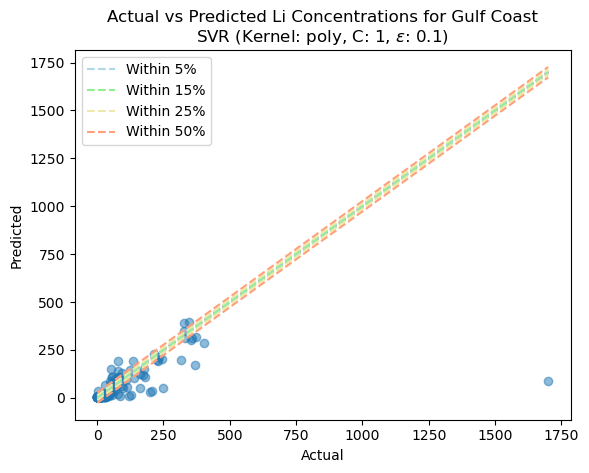

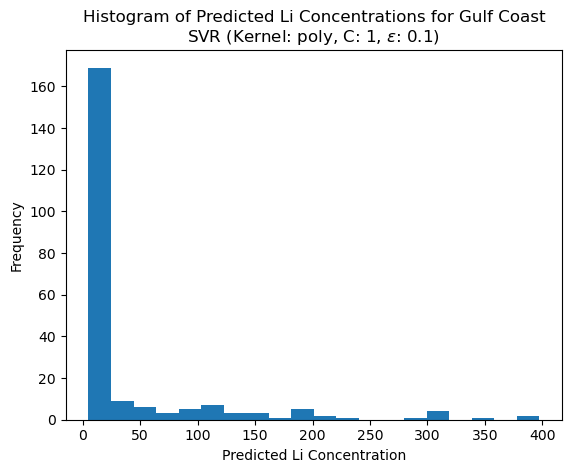

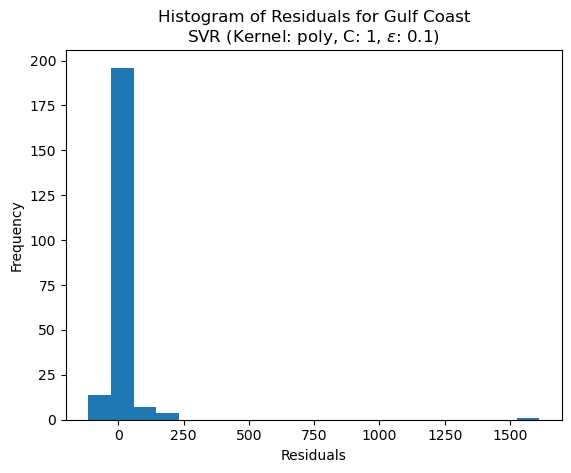

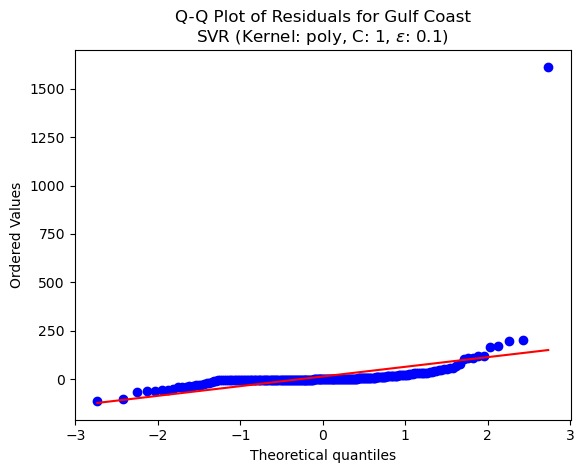

round       basin  data_row_count  feature_quantity  \
0  04_pca  Gulf Coast             888                15   

                                        feature_list        kernel_options  \
0  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   

  best_kernel             c_options  best_c    epsilon_options  ...  \
0        poly  [0.1, 0.5, 1, 5, 10]       1  [0.01, 0.05, 0.1]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             29.73              64.41              68.47              79.73   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.28                   840.68                2.36   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               4.31               21.38        5138.58  

[1 rows x 26 columns]

In [131]:
# Define all the variables...
round = '04_pca'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10]
epsilon_values = [0.01, 0.05, 0.1]

# Run the function...
df_round04_pca = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round04_pca

#### ROUND 5

Gulf Coast
Number of data points:  888
Number of samples in the training dataset: 532


Best parameters: {'C': 150, 'epsilon': 0.5, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 15220.196403299024
MSE of the model: 8336.379371340092
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 91.30377523049138
MAE of the best SVR model: 15.050710713054626
-------------------------------
R-squared (Coefficient of Determination): 0.452281747853585
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  46.348314606741575
±15%:  71.06741573033707
±25%:  77.80898876404494
±50%:  90.73033707865169
-------------------------------
Minimum percentage difference: 0.36%
Maximum percentage difference: 1336.97%
-------------------------------
Quantile regression loss:
Quantile 0.25: 1.0408888679558421
Quantile 0.5: 3.0019484499130558
Qu

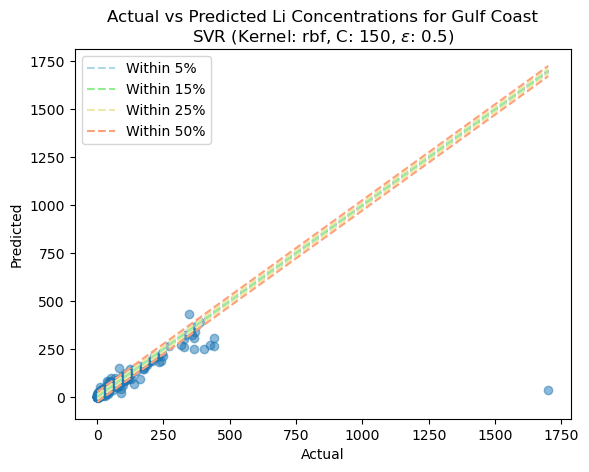

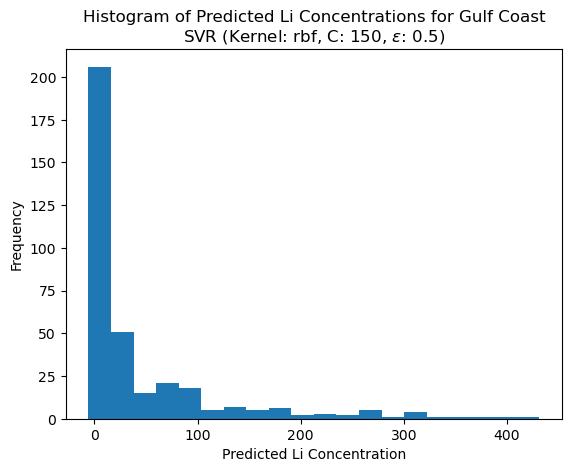

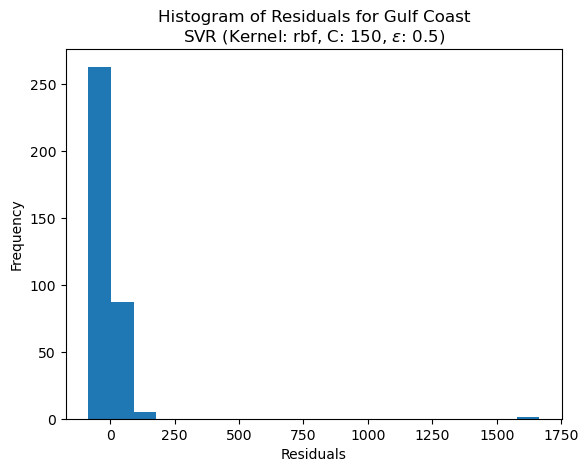

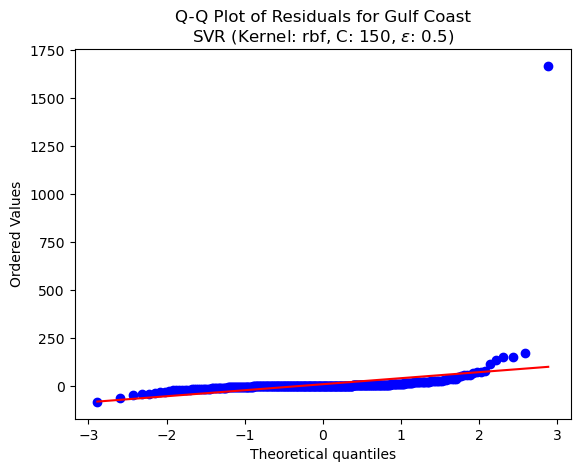

round       basin  data_row_count  feature_quantity  \
0  05_pca  Gulf Coast             888                15   

                                        feature_list        kernel_options  \
0  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0         rbf  [10, 50, 100, 150, 200]     150  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...             46.35              71.07              77.81   

   within_50_percent  results_min%_difference  results_max%_difference  \
0              90.73                     0.36                  1336.97   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                1.04                3.0                11.1        5297.03  

[1 rows x 26 columns]

In [132]:
# Define all the variables...
round = '05_pca'
test_size = 0.4
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round05_pca = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round05_pca

#### ROUND 6

Gulf Coast
Number of data points:  888
Number of samples in the training dataset: 666
Best parameters: {'C': 200, 'epsilon': 0.4, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 19313.61518772352
MSE of the model: 13109.015892268666
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 114.49461075643983
MAE of the best SVR model: 15.922251568895312
-------------------------------
R-squared (Coefficient of Determination): 0.3212551992543966
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  51.35135135135135
±15%:  73.87387387387388
±25%:  78.37837837837837
±50%:  92.7927927927928
-------------------------------
Minimum percentage difference: 0.01%
Maximum percentage difference: 1567.18%
-------------------------------
Quantile 

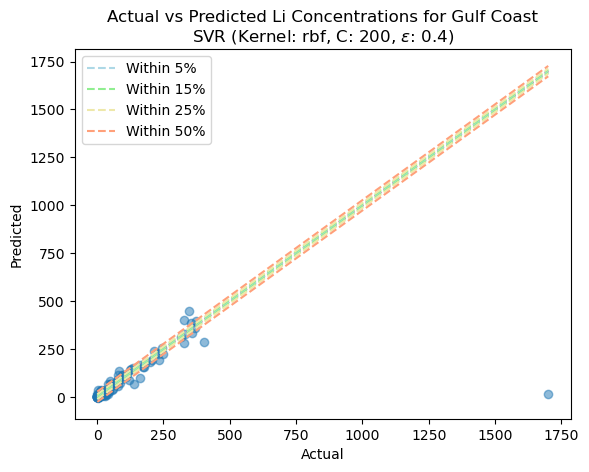

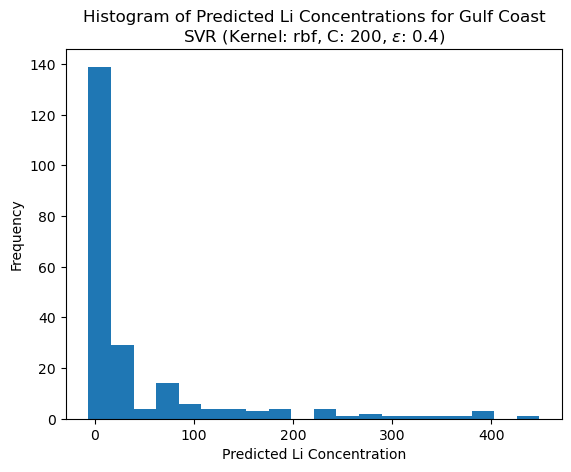

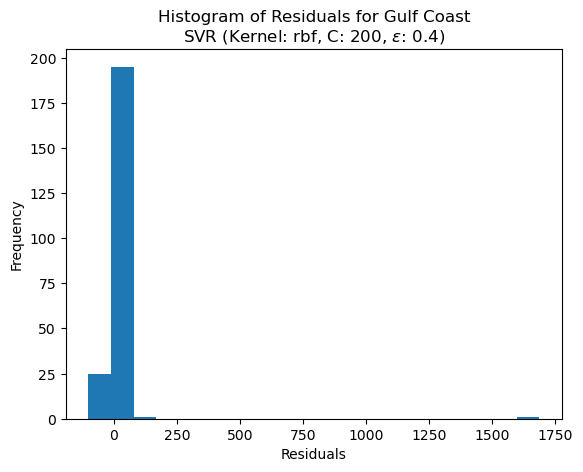

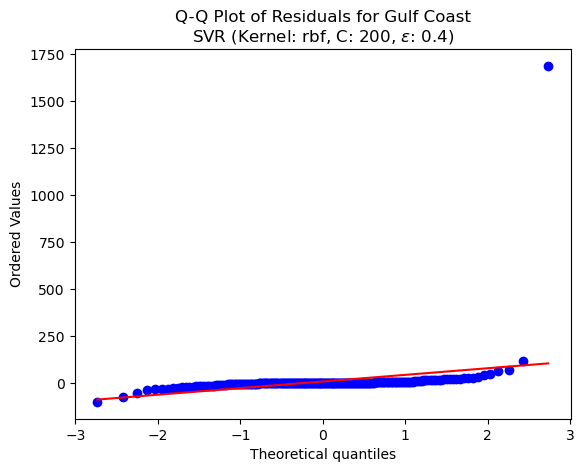

round       basin  data_row_count  feature_quantity  \
0  06_pca  Gulf Coast             888                15   

                                        feature_list        kernel_options  \
0  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0         rbf  [10, 50, 100, 150, 200]     200  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...             51.35              73.87              78.38   

   within_50_percent  results_min%_difference  results_max%_difference  \
0              92.79                     0.01                  1567.18   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                0.94               2.47                9.38        4266.12  

[1 rows x 26 columns]

In [133]:
# Define all the variables...
round = '06_pca'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round06_pca = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round06_pca

#### ROUND 7

Gulf Coast
Number of data points:  888
Number of samples in the training dataset: 666


Best parameters: {'C': 50, 'epsilon': 0.5, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 19313.61518772352
MSE of the model: 12738.15360949178
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 112.86342901707258
MAE of the best SVR model: 16.686119560893317
-------------------------------
R-squared (Coefficient of Determination): 0.3404573154388705
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  50.0
±15%:  71.62162162162163
±25%:  78.82882882882883
±50%:  91.44144144144144
-------------------------------
Minimum percentage difference: 0.43%
Maximum percentage difference: 1582.19%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.963365855771698
Quantile 0.5: 2.7135741947361396
Quantile 0.75: 10

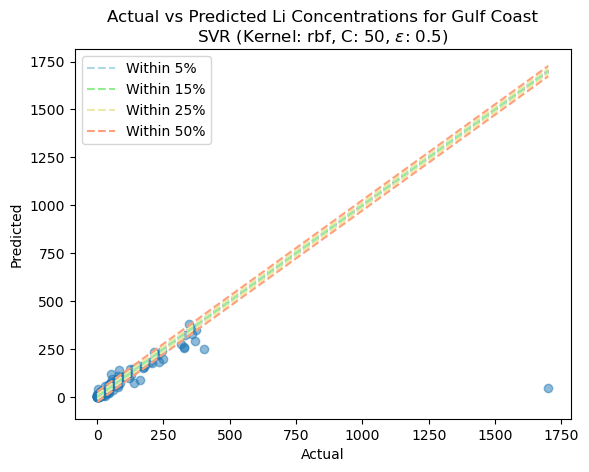

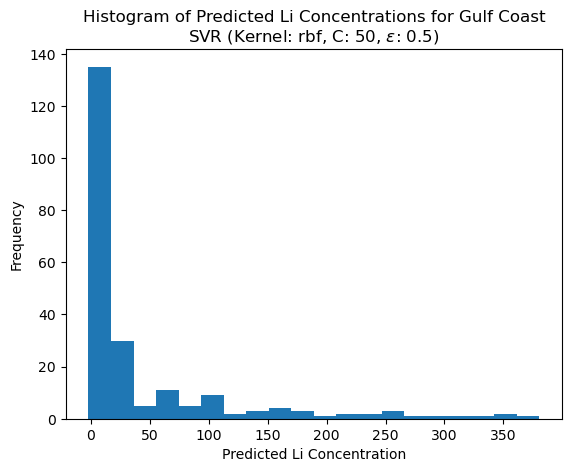

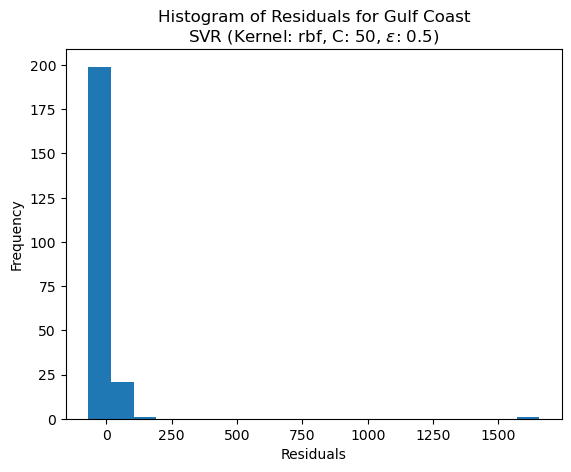

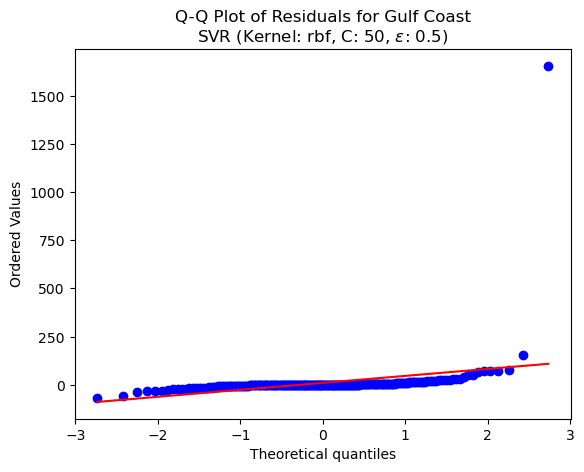

round       basin  data_row_count  feature_quantity  \
0  07_pca  Gulf Coast             888                15   

                                        feature_list kernel_options  \
0  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...    [rbf, poly]   

  best_kernel             c_options  best_c            epsilon_options  ...  \
0         rbf  [10, 20, 30, 40, 50]      50  [0.1, 0.2, 0.3, 0.4, 0.5]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0              50.0              71.62              78.83              91.44   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.43                  1582.19                0.96   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               2.71                10.4         4753.4  

[1 rows x 26 columns]

In [134]:
# Define all the variables...
round = '07_pca'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly']
c_values = [10, 20, 30, 40, 50]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round07_pca = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round07_pca

### INPUT: Base df (w/ imputed values) (w/ categorical columns) --- NOT RUN

In [135]:
# Define the input df for this section
df = df_with_imputed.copy()

# Drop the 'IDUSGS' column as it is not needed
columns_to_drop = ['IDUSGS', 'API', 'DATESAMPLE']
df.drop(columns_to_drop, axis=1, inplace=True)

# Define variables that are common to all rounds
basins = df['BASIN_CATEGORY'].unique()
categorical_columns = ['PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'STATE', 'COUNTY', 
                       'PROVINCE', 'REGION', 'WELLNAME', 'PERIOD']

#### ROUND 1

Gulf Coast
Number of data points:  222
Number of samples in the training dataset: 155


Best parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 54595.38489329473
MSE of the model: 34478.234970374244
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 185.68315747631567
MAE of the best SVR model: 49.62460650240826
-------------------------------
R-squared (Coefficient of Determination): 0.36847711509386605
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  25.37313432835821
±15%:  52.23880597014925
±25%:  67.16417910447761
±50%:  77.61194029850746
-------------------------------
Minimum percentage difference: 2.54%
Maximum percentage difference: 14356.48%
-------------------------------
Quantile regression loss:
Quantile 0.25: 5.420737292176638
Quantile 0.5: 14.99625153982386

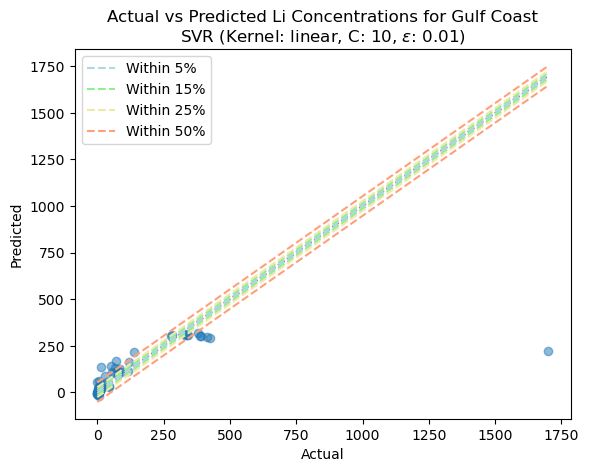

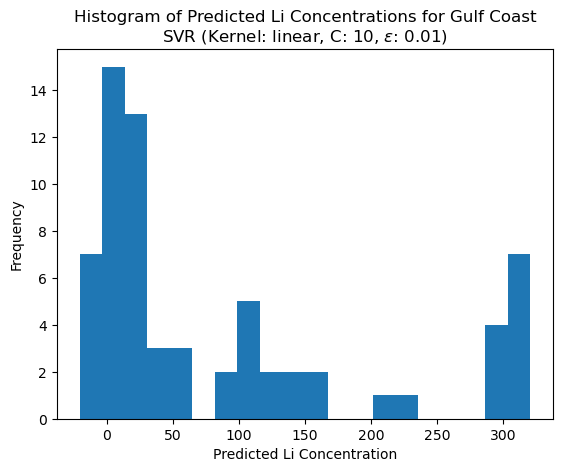

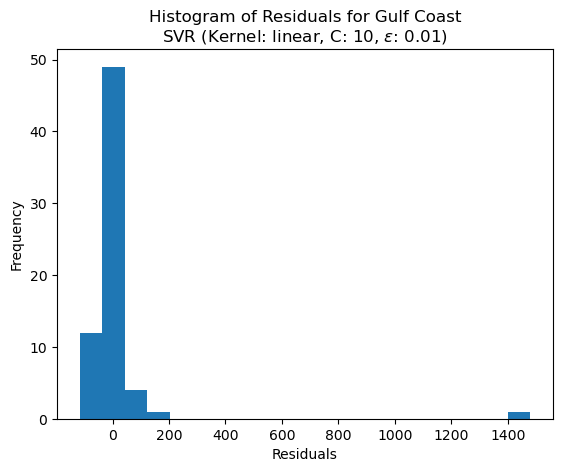

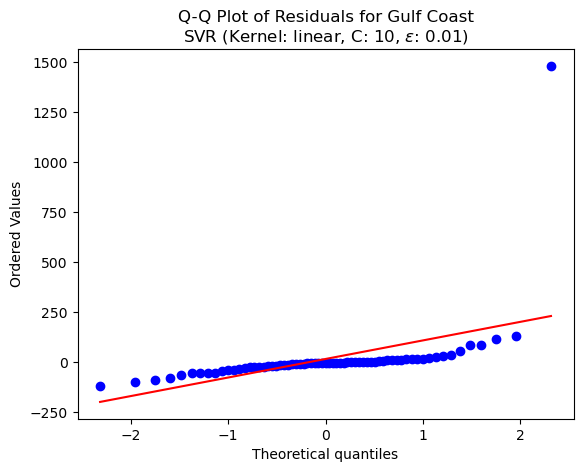

round       basin  data_row_count  feature_quantity  \
0  01_wi_wc  Gulf Coast             222               343   

                                        feature_list       kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [linear, rbf, poly]   

  best_kernel     c_options  best_c   epsilon_options  ...  within_5_percent  \
0      linear  [0.1, 1, 10]      10  [0.01, 0.1, 0.5]  ...             25.37   

   within_15_percent  within_25_percent  within_50_percent  \
0              52.24              67.16              77.61   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     2.54                 14356.48                5.42   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               15.0               39.61        14735.0  

[1 rows x 26 columns]

In [136]:
# Define all the variables...
round = '01_wi_wc'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
epsilon_values = [0.01, 0.1, 0.5]

# Run the function...
df_round01_wi_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round01_wi_wc

#### ROUND 2

Gulf Coast
Number of data points:  222
Number of samples in the training dataset: 155
Best parameters: {'C': 5, 'epsilon': 0.01, 'kernel': 'linear'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 54595.38489329473
MSE of the model: 35026.47482033687
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 187.15361289683102
MAE of the best SVR model: 50.390661232030745
-------------------------------
R-squared (Coefficient of Determination): 0.35843524340390265
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  25.37313432835821
±15%:  55.223880597014926
±25%:  64.17910447761194
±50%:  79.1044776119403
-------------------------------
Minimum percentage difference: 1.01%
Maximum percentage difference: 13810.73%
-------------------------------
Quant

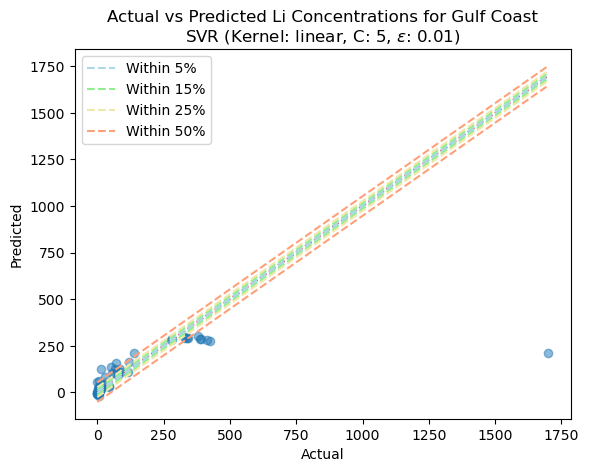

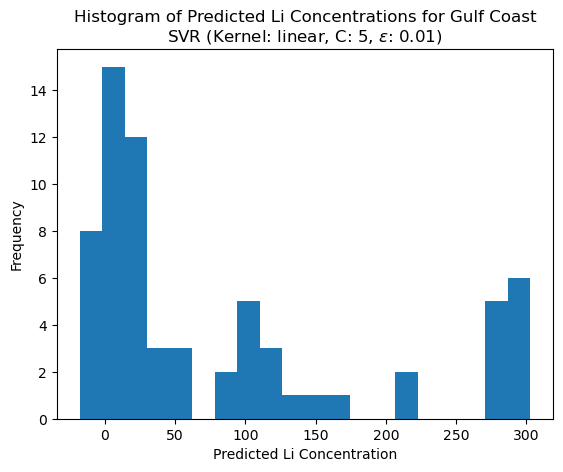

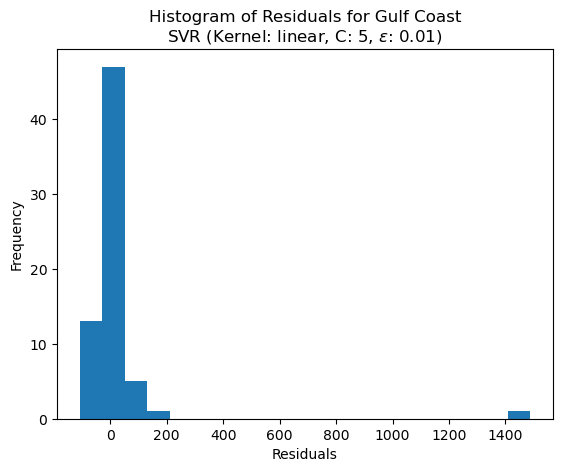

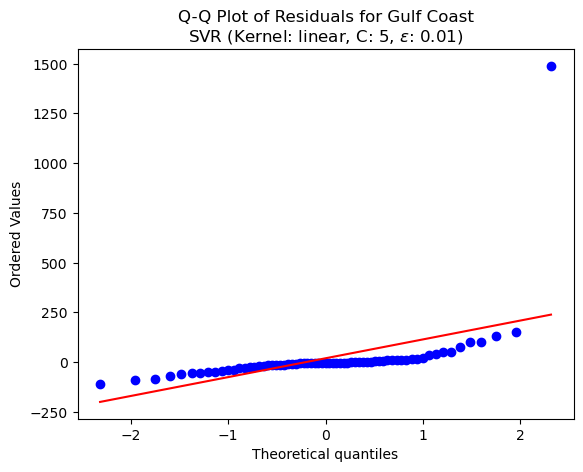

round       basin  data_row_count  feature_quantity  \
0  02_wi_wc  Gulf Coast             222               343   

                                        feature_list  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   

                 kernel_options best_kernel                      c_options  \
0  [linear, rbf, poly, sigmoid]      linear  [0.1, 0.5, 1, 5, 10, 50, 100]   

   best_c              epsilon_options  ...  within_5_percent  \
0       5  [0.01, 0.05, 0.1, 0.2, 0.5]  ...             25.37   

   within_15_percent  within_25_percent  within_50_percent  \
0              55.22              64.18               79.1   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     1.01                 13810.73                5.34   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               13.6               45.78       14813.12  

[1 rows x 26 columns]

In [137]:
# Define all the variables...
round = '02_wi_wc'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50, 100]
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.5]

# Run the function...
df_round02_wi_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round02_wi_wc

#### ROUND 3

Gulf Coast
Number of data points:  222
Number of samples in the training dataset: 166
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 63788.99234257018
MSE of the model: 56107.87199012268
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 236.87100284780044
MAE of the best SVR model: 79.663000598949
-------------------------------
R-squared (Coefficient of Determination): 0.12041451150689231
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  42.857142857142854
±15%:  71.42857142857143
±25%:  73.21428571428571
±50%:  78.57142857142857
-------------------------------
Minimum percentage difference: 2.06%
Maximum percentage difference: 1416.37%
-------------------------------
Quantil

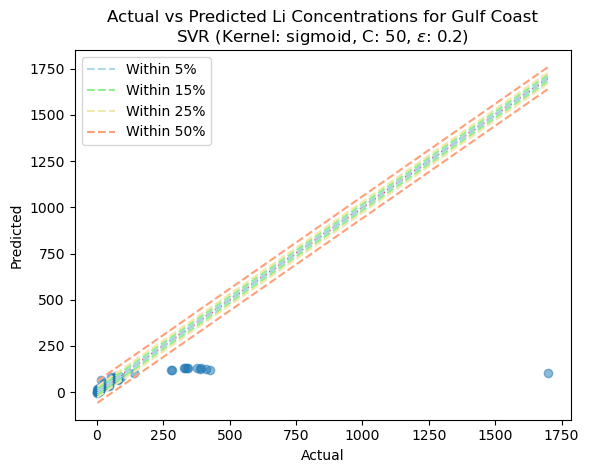

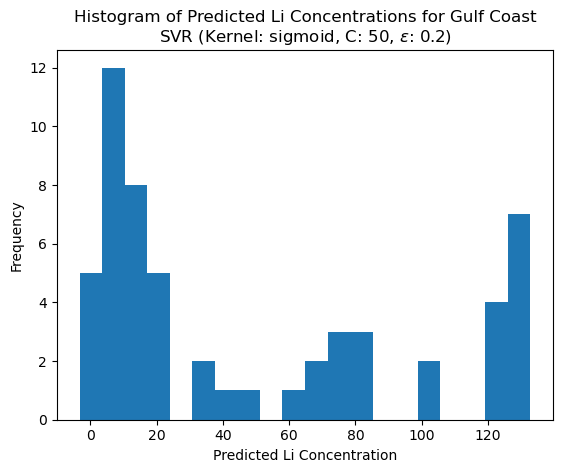

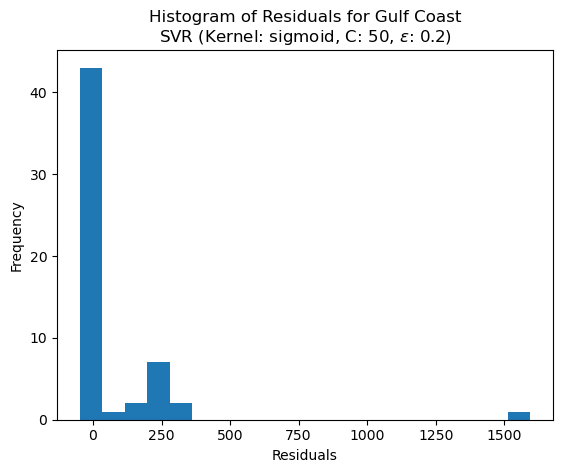

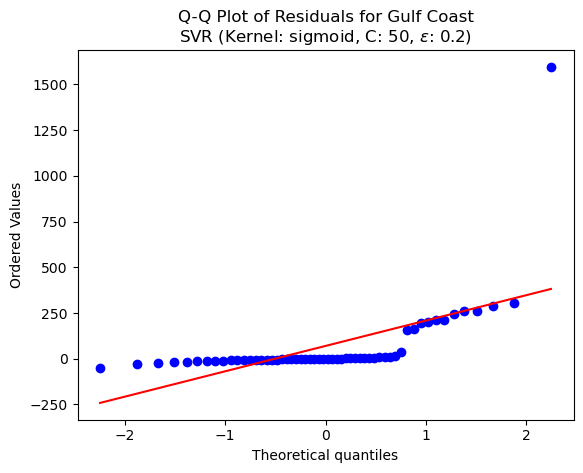

round       basin  data_row_count  feature_quantity  \
0  03_wi_wc  Gulf Coast             222               343   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                 c_options  best_c         epsilon_options  ...  \
0     sigmoid  [0.1, 0.5, 1, 5, 10, 50]      50  [0.01, 0.05, 0.1, 0.2]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             42.86              71.43              73.21              78.57   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     2.06                  1416.37                2.85   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               7.12                32.4       18817.24  

[1 rows x 26 columns]

In [138]:
# Define all the variables...
round = '03_wi_wc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50]
epsilon_values = [0.01, 0.05, 0.1, 0.2]

# Run the function...
df_round03_wi_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round03_wi_wc

#### ROUND 4

Gulf Coast
Number of data points:  222
Number of samples in the training dataset: 166
Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 63788.99234257018
MSE of the model: 63115.02293277397
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 251.22703463754448
MAE of the best SVR model: 90.67711141372779
-------------------------------
R-squared (Coefficient of Determination): 0.010565606777055425
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  42.857142857142854
±15%:  69.64285714285714
±25%:  73.21428571428571
±50%:  76.78571428571429
-------------------------------
Minimum percentage difference: 1.76%
Maximum percentage difference: 1451.33%
-------------------------------
Quan

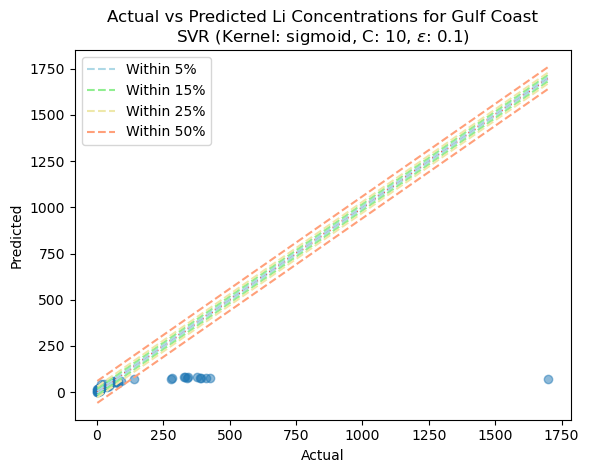

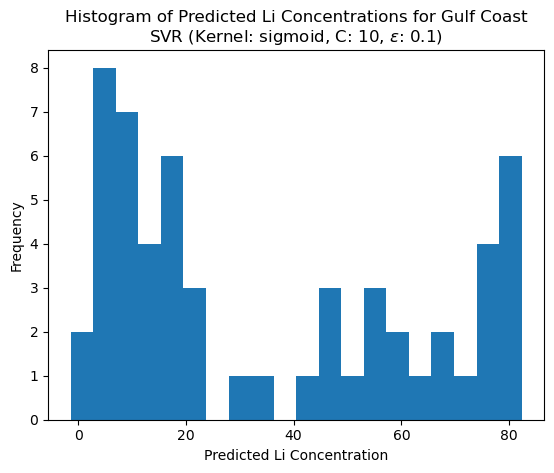

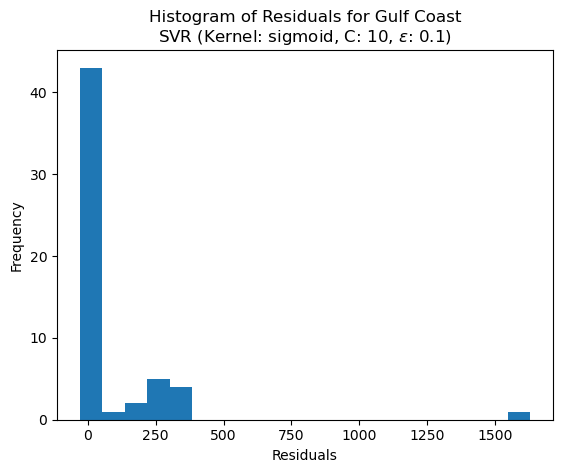

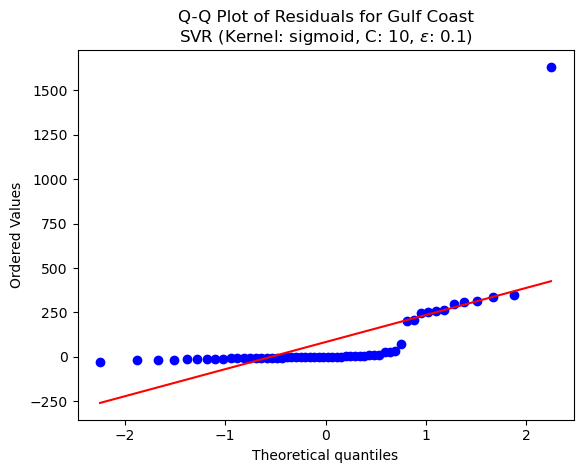

round       basin  data_row_count  feature_quantity  \
0  04_wi_wc  Gulf Coast             222               343   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel             c_options  best_c    epsilon_options  ...  \
0     sigmoid  [0.1, 0.5, 1, 5, 10]      10  [0.01, 0.05, 0.1]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             42.86              69.64              73.21              76.79   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     1.76                  1451.33                2.87   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               8.86               31.02       21859.47  

[1 rows x 26 columns]

In [139]:
# Define all the variables...
round = '04_wi_wc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10]
epsilon_values = [0.01, 0.05, 0.1]

# Run the function...
df_round04_wi_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round04_wi_wc

#### ROUND 5

Gulf Coast
Number of data points:  222
Number of samples in the training dataset: 133
Best parameters: {'C': 200, 'epsilon': 0.5, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 43574.37341711904
MSE of the model: 30205.96429536413
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 173.7986314542325
MAE of the best SVR model: 47.53715911915592
-------------------------------
R-squared (Coefficient of Determination): 0.3067952118045345
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  28.08988764044944
±15%:  58.42696629213483
±25%:  65.1685393258427
±50%:  77.52808988764045
-------------------------------
Minimum percentage difference: 0.33%
Maximum percentage difference: 11596.72%
-------------------------------
Quantil

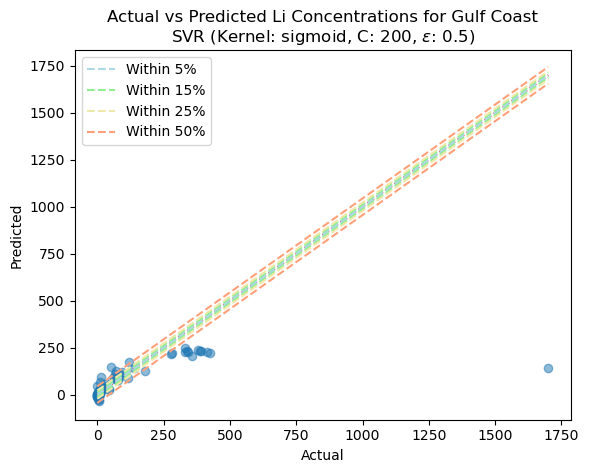

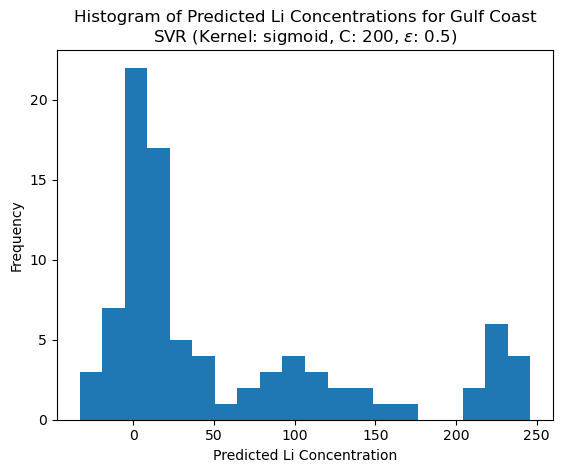

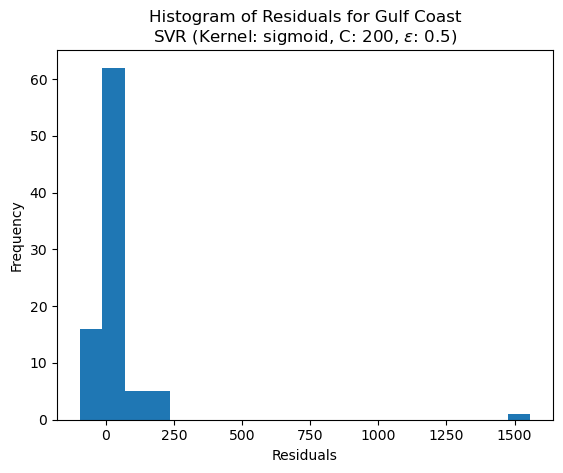

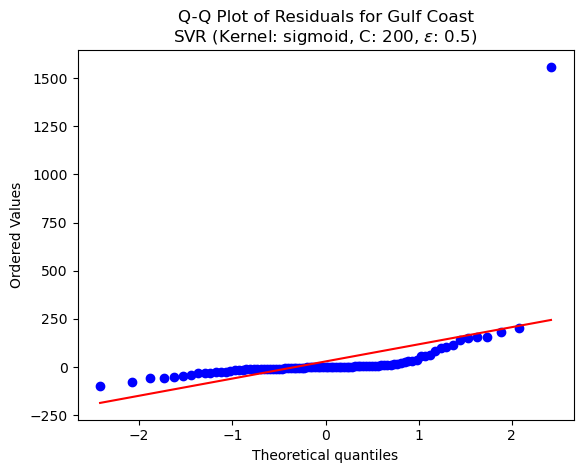

round       basin  data_row_count  feature_quantity  \
0  05_wi_wc  Gulf Coast             222               343   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0     sigmoid  [10, 50, 100, 150, 200]     200  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...             28.09              58.43              65.17   

   within_50_percent  results_min%_difference  results_max%_difference  \
0              77.53                     0.33                 11596.72   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                3.61              11.54               31.35       18068.38  

[1 rows x 26 columns]

In [140]:
# Define all the variables...
round = '05_wi_wc'
test_size = 0.4
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round05_wi_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round05_wi_wc

#### ROUND 6

Gulf Coast
Number of data points:  222
Number of samples in the training dataset: 166
Best parameters: {'C': 200, 'epsilon': 0.5, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 63788.99234257018
MSE of the model: 46850.99155337495
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 216.4508987123291
MAE of the best SVR model: 61.15714937942266
-------------------------------
R-squared (Coefficient of Determination): 0.26553171898737593
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  46.42857142857143
±15%:  64.28571428571429
±25%:  69.64285714285714
±50%:  76.78571428571429
-------------------------------
Minimum percentage difference: 0.82%
Maximum percentage difference: 1064.89%
-------------------------------
Quanti

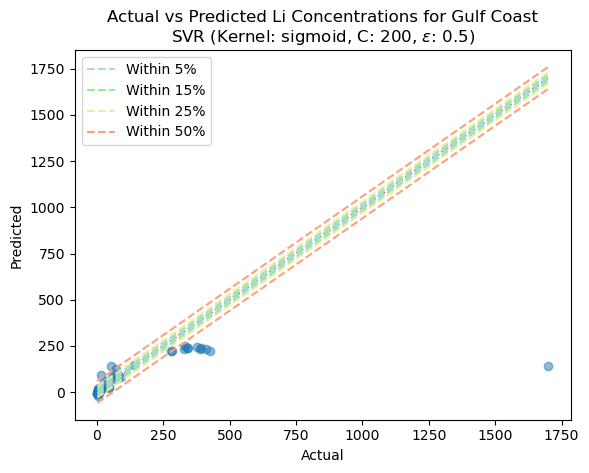

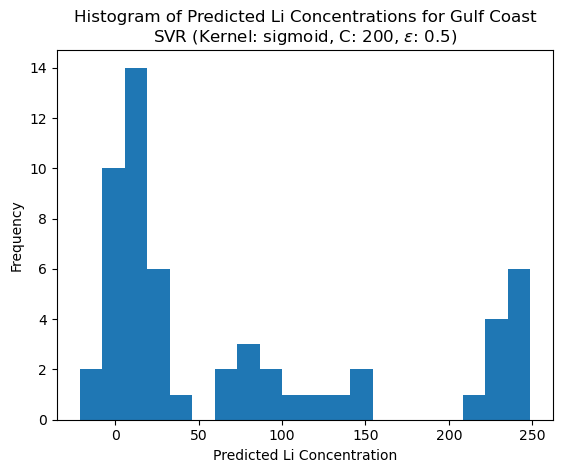

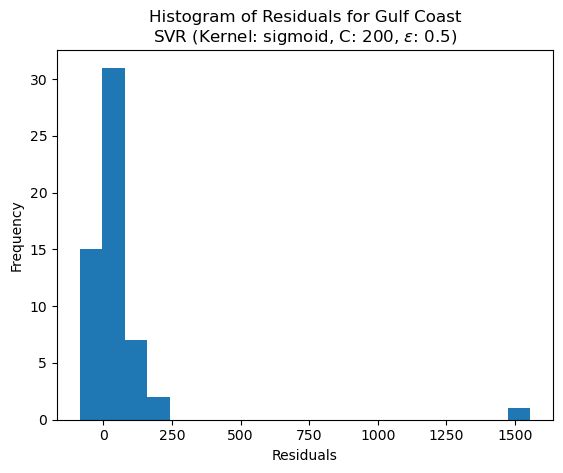

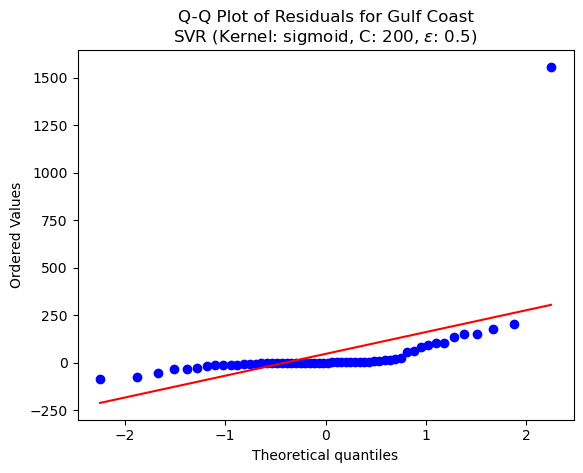

round       basin  data_row_count  feature_quantity  \
0  06_wi_wc  Gulf Coast             222               343   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0     sigmoid  [10, 50, 100, 150, 200]     200  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...             46.43              64.29              69.64   

   within_50_percent  results_min%_difference  results_max%_difference  \
0              76.79                     0.82                  1064.89   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                3.13               9.41               55.23       15297.35  

[1 rows x 26 columns]

In [141]:
# Define all the variables...
round = '06_wi_wc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round06_wi_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round06_wi_wc

#### ROUND 7

Gulf Coast
Number of data points:  222
Number of samples in the training dataset: 166
Best parameters: {'C': 50, 'epsilon': 0.5, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 63788.99234257018
MSE of the model: 49785.59381818358
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 223.1268558873709
MAE of the best SVR model: 75.90065267709903
-------------------------------
R-squared (Coefficient of Determination): 0.219526880894798
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  17.857142857142858
±15%:  51.78571428571429
±25%:  67.85714285714286
±50%:  76.78571428571429
-------------------------------
Minimum percentage difference: 1.82%
Maximum percentage difference: 2577.10%
-------------------------------
Quantile reg

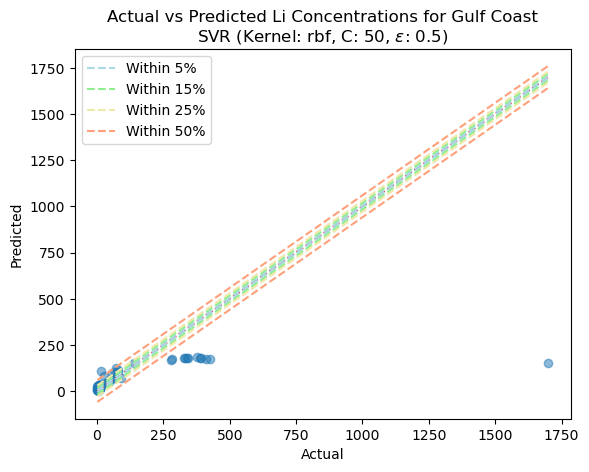

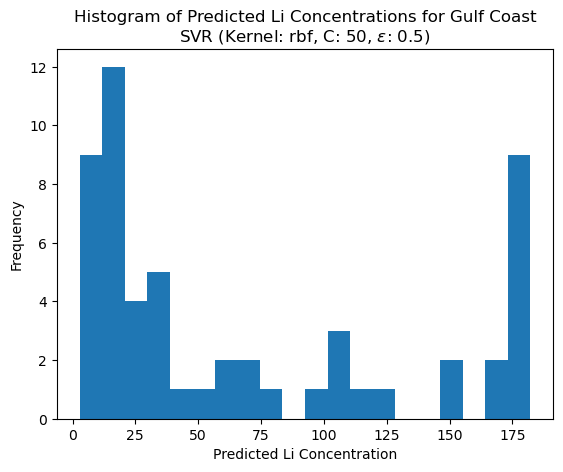

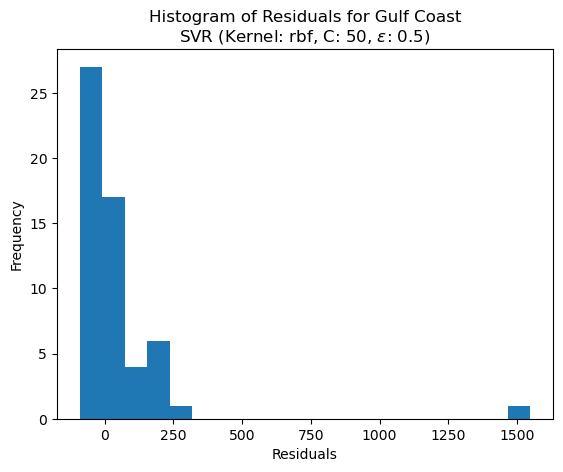

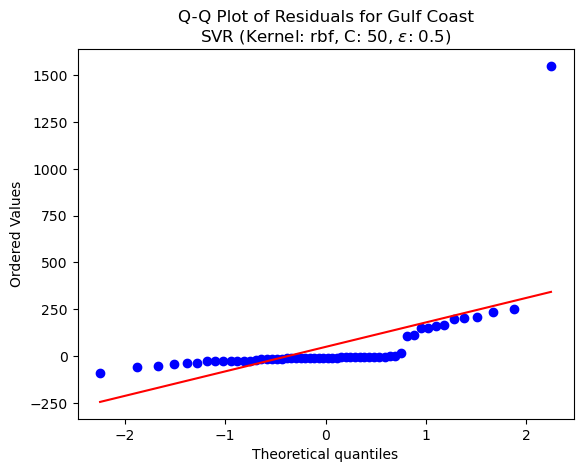

round       basin  data_row_count  feature_quantity  \
0  07_wi_wc  Gulf Coast             222               343   

                                        feature_list kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...    [rbf, poly]   

  best_kernel             c_options  best_c            epsilon_options  ...  \
0         rbf  [10, 20, 30, 40, 50]      50  [0.1, 0.2, 0.3, 0.4, 0.5]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             17.86              51.79              67.86              76.79   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     1.82                   2577.1                8.06   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               16.5               52.65        20275.7  

[1 rows x 26 columns]

In [142]:
# Define all the variables...
round = '07_wi_wc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly']
c_values = [10, 20, 30, 40, 50]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round07_wi_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round07_wi_wc

### INPUT: Base df (w/ imputed values) (no categorical columns)

In [143]:
# Define the input df for this section
df = df_with_imputed.copy()

# Drop the 'IDUSGS' column as it is not needed
columns_to_drop = ['IDUSGS', 'API', 'DATESAMPLE', 'PLAYTYPE', 'WELLTYPE', 
                   'FORMSIMPLE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 
                   'WELLNAME', 'PERIOD']
df.drop(columns_to_drop, axis=1, inplace=True)

# Define variables that are common to all rounds
basins = df['BASIN_CATEGORY'].unique()
categorical_columns = []

#### ROUND 1

Gulf Coast
Number of data points:  326
Number of samples in the training dataset: 228
Best parameters: {'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 9346.212241024572
MSE of the model: 2846.555912608787
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 53.35312467521267
MAE of the best SVR model: 28.98127506789031
-------------------------------
R-squared (Coefficient of Determination): 0.6954321345160535
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  13.26530612244898
±15%:  44.89795918367347
±25%:  56.12244897959183
±50%:  74.48979591836735
-------------------------------
Minimum percentage difference: 0.50%
Maximum percentage difference: 2042.97%
-------------------------------
Quantile 

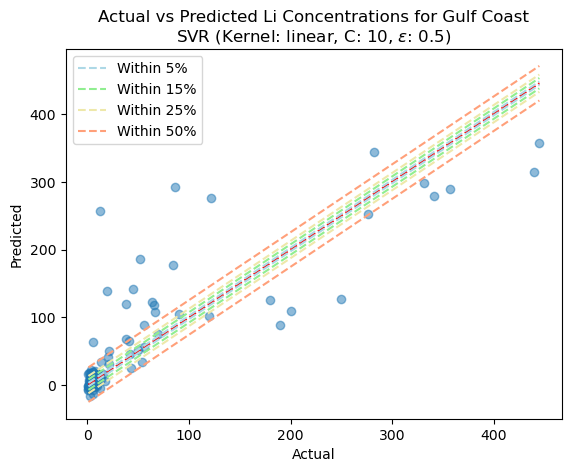

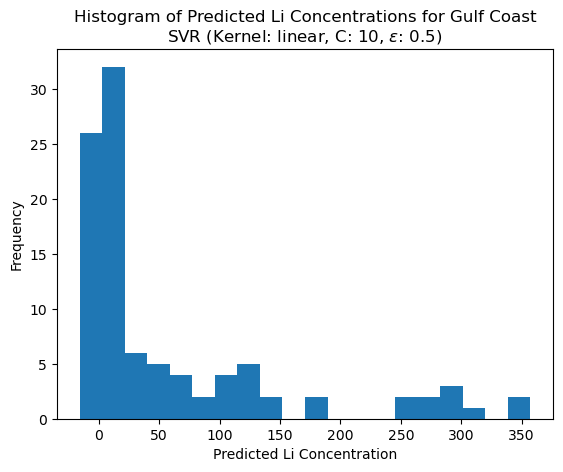

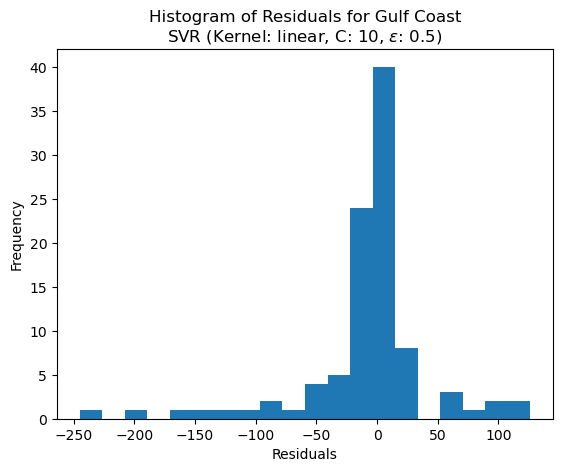

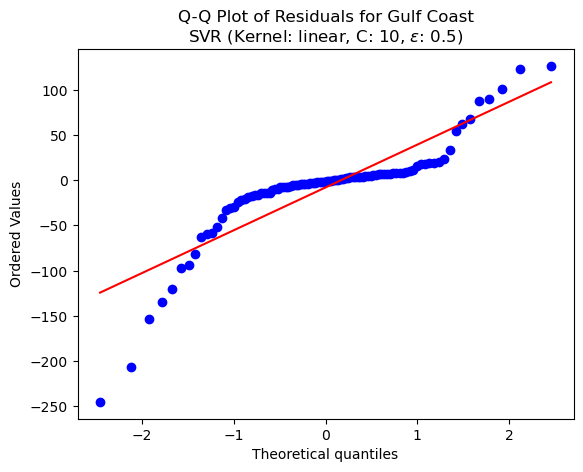

round       basin  data_row_count  feature_quantity  \
0  01_wi_nc  Gulf Coast             326                20   

                                        feature_list       kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [linear, rbf, poly]   

  best_kernel     c_options  best_c   epsilon_options  ...  within_5_percent  \
0      linear  [0.1, 1, 10]      10  [0.01, 0.1, 0.5]  ...             13.27   

   within_15_percent  within_25_percent  within_50_percent  \
0               44.9              56.12              74.49   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                      0.5                  2042.97                4.19   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               8.56               28.11       19580.48  

[1 rows x 26 columns]

In [144]:
# Define all the variables...
round = '01_wi_nc'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
epsilon_values = [0.01, 0.1, 0.5]

# Run the function...
df_round01_wi_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round01_wi_nc

#### ROUND 2

Gulf Coast
Number of data points:  326
Number of samples in the training dataset: 228


Best parameters: {'C': 100, 'epsilon': 0.5, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 9346.212241024572
MSE of the model: 1057.1205018629826
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 32.513389578187365
MAE of the best SVR model: 15.659339681884239
-------------------------------
R-squared (Coefficient of Determination): 0.8868931632835361
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  34.69387755102041
±15%:  61.224489795918366
±25%:  74.48979591836735
±50%:  82.6530612244898
-------------------------------
Minimum percentage difference: 0.46%
Maximum percentage difference: 976.52%
-------------------------------
Quantile regression loss:
Quantile 0.25: 1.6130627704803089
Quantile 0.5: 5.011106579360089
Qua

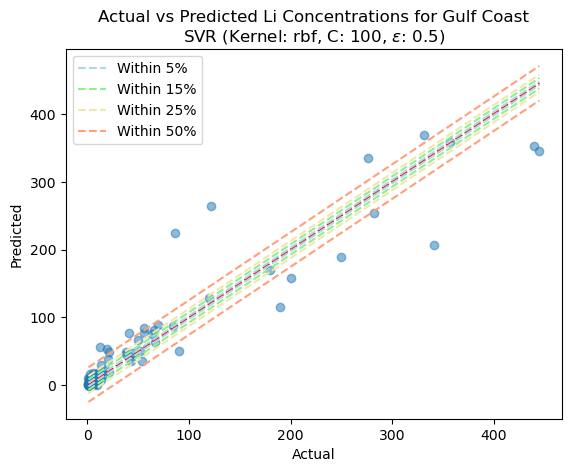

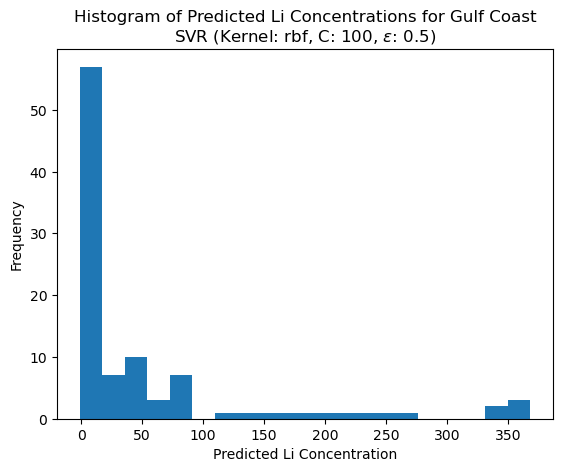

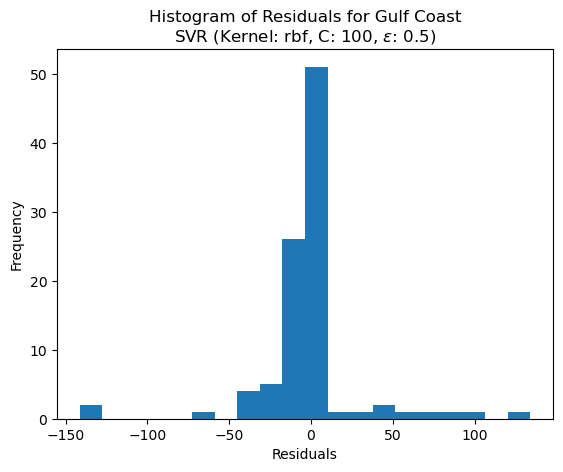

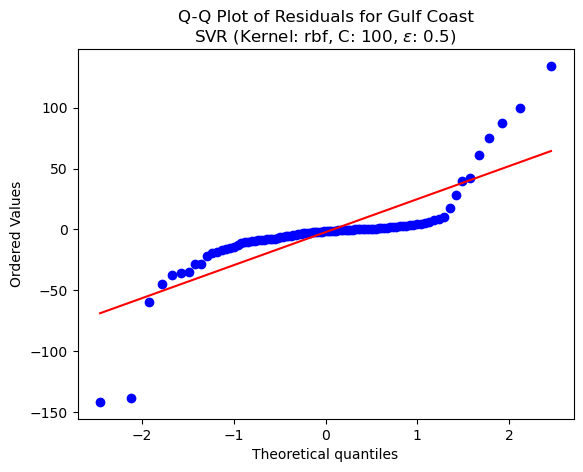

round       basin  data_row_count  feature_quantity  \
0  02_wi_nc  Gulf Coast             326                20   

                                        feature_list  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   

                 kernel_options best_kernel                      c_options  \
0  [linear, rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50, 100]   

   best_c              epsilon_options  ...  within_5_percent  \
0     100  [0.01, 0.05, 0.1, 0.2, 0.5]  ...             34.69   

   within_15_percent  within_25_percent  within_50_percent  \
0              61.22              74.49              82.65   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.46                   976.52                1.61   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               5.01                13.7       20189.56  

[1 rows x 26 columns]

In [145]:
# Define all the variables...
round = '02_wi_nc'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50, 100]
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.5]

# Run the function...
df_round02_wi_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round02_wi_nc

#### ROUND 3

Gulf Coast
Number of data points:  326
Number of samples in the training dataset: 244
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 8537.363939976205
MSE of the model: 936.4631138200758
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 30.601684819958457
MAE of the best SVR model: 14.202678186032239
-------------------------------
R-squared (Coefficient of Determination): 0.8903100394449524
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  34.146341463414636
±15%:  63.41463414634146
±25%:  76.82926829268293
±50%:  85.36585365853658
-------------------------------
Minimum percentage difference: 0.75%
Maximum percentage difference: 890.57%
-------------------------------
Quantile r

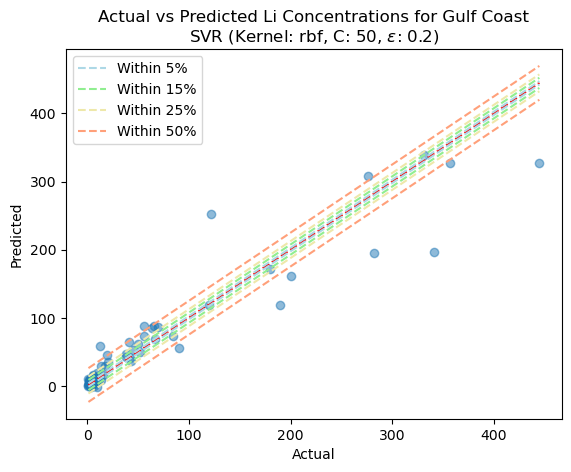

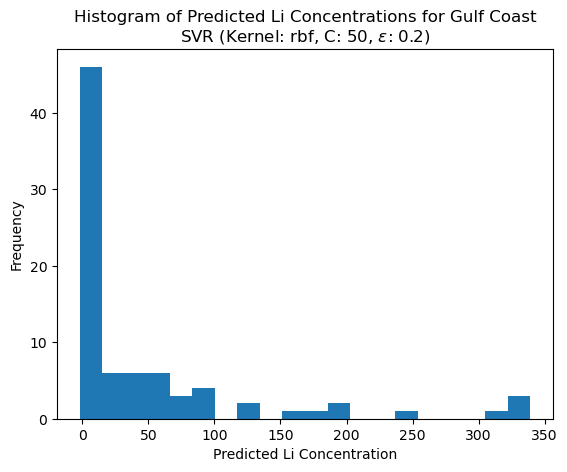

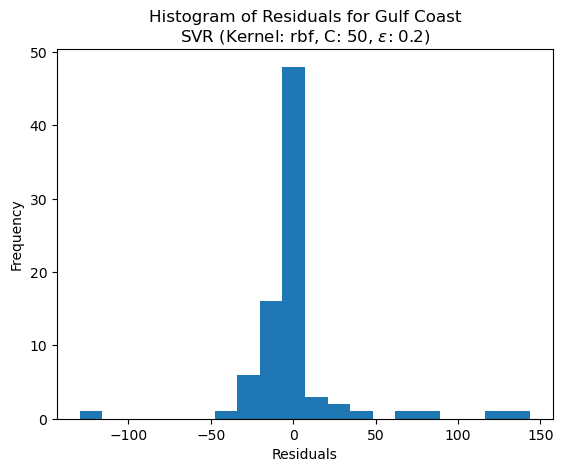

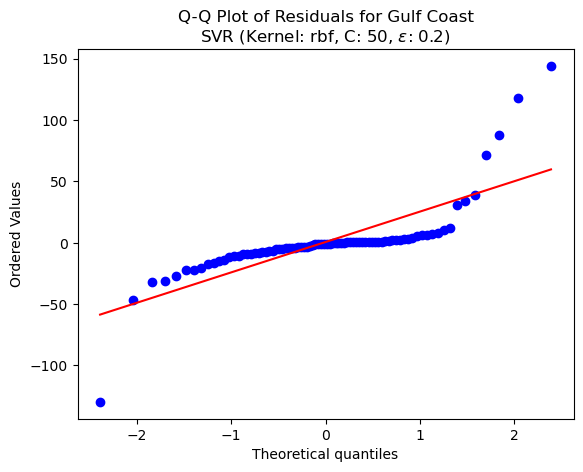

round       basin  data_row_count  feature_quantity  \
0  03_wi_nc  Gulf Coast             326                20   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                 c_options  best_c         epsilon_options  ...  \
0         rbf  [0.1, 0.5, 1, 5, 10, 50]      50  [0.01, 0.05, 0.1, 0.2]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             34.15              63.41              76.83              85.37   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.75                   890.57                 1.2   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               4.88               11.47        19642.8  

[1 rows x 26 columns]

In [146]:
# Define all the variables...
round = '03_wi_nc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50]
epsilon_values = [0.01, 0.05, 0.1, 0.2]

# Run the function...
df_round03_wi_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round03_wi_nc

#### ROUND 4

Gulf Coast
Number of data points:  326
Number of samples in the training dataset: 244
Best parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'poly'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 8537.363939976205
MSE of the model: 1445.3421145687992
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 38.01765530077834
MAE of the best SVR model: 19.615824359596576
-------------------------------
R-squared (Coefficient of Determination): 0.8307039356960074
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  25.609756097560975
±15%:  62.19512195121951
±25%:  68.29268292682927
±50%:  75.60975609756098
-------------------------------
Minimum percentage difference: 1.10%
Maximum percentage difference: 2090.86%
-------------------------------
Quantil

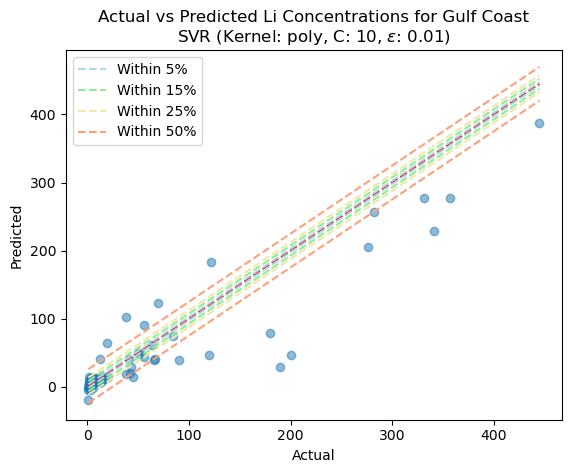

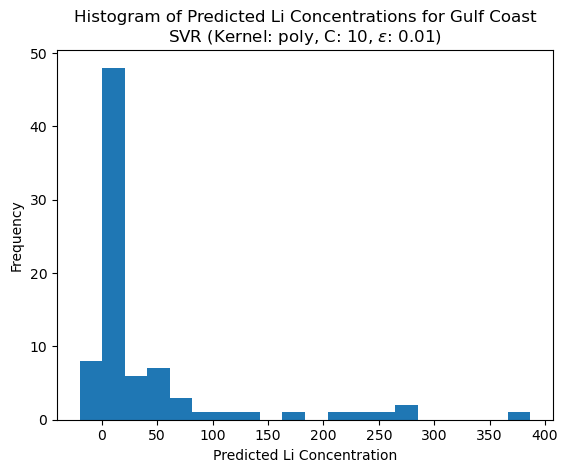

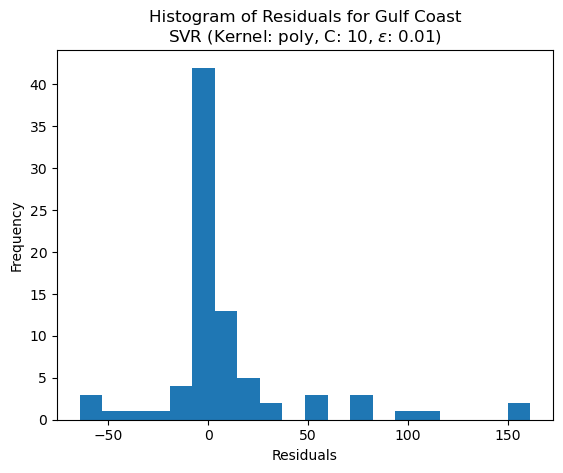

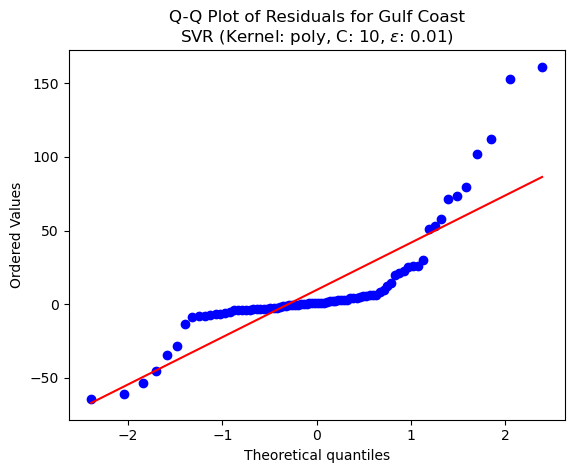

round       basin  data_row_count  feature_quantity  \
0  04_wi_nc  Gulf Coast             326                20   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel             c_options  best_c    epsilon_options  ...  \
0        poly  [0.1, 0.5, 1, 5, 10]      10  [0.01, 0.05, 0.1]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             25.61               62.2              68.29              75.61   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                      1.1                  2090.86                2.47   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               4.86               22.13       20632.83  

[1 rows x 26 columns]

In [147]:
# Define all the variables...
round = '04_wi_nc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10]
epsilon_values = [0.01, 0.05, 0.1]

# Run the function...
df_round04_wi_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round04_wi_nc

#### ROUND 5

Gulf Coast
Number of data points:  326
Number of samples in the training dataset: 195
Best parameters: {'C': 200, 'epsilon': 0.5, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 26168.165805757242
MSE of the model: 16148.33060321515
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 127.07608194784395
MAE of the best SVR model: 30.30220274021785
-------------------------------
R-squared (Coefficient of Determination): 0.38290170113251243
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  38.93129770992366
±15%:  62.59541984732825
±25%:  74.04580152671755
±50%:  84.7328244274809
-------------------------------
Minimum percentage difference: 0.27%
Maximum percentage difference: 1606.71%
-------------------------------
Quantile 

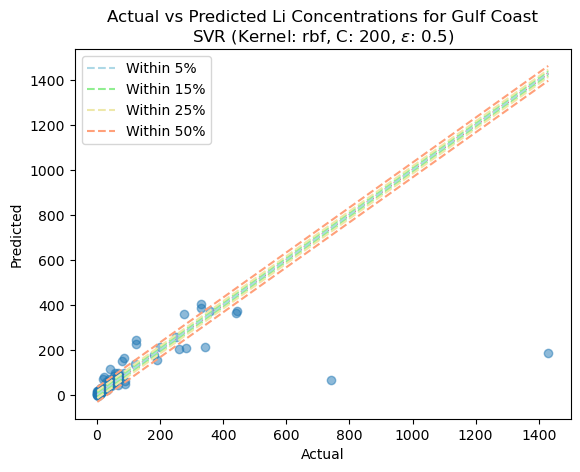

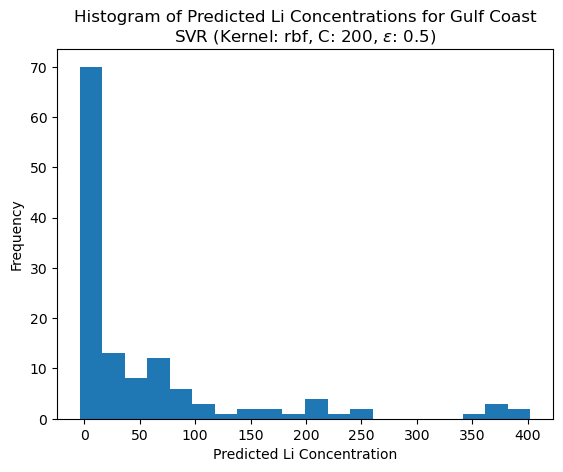

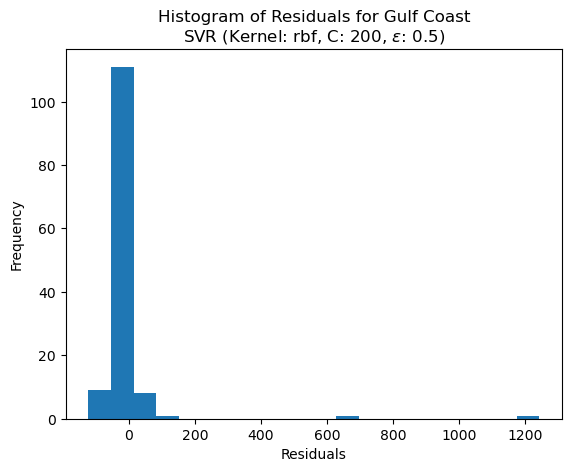

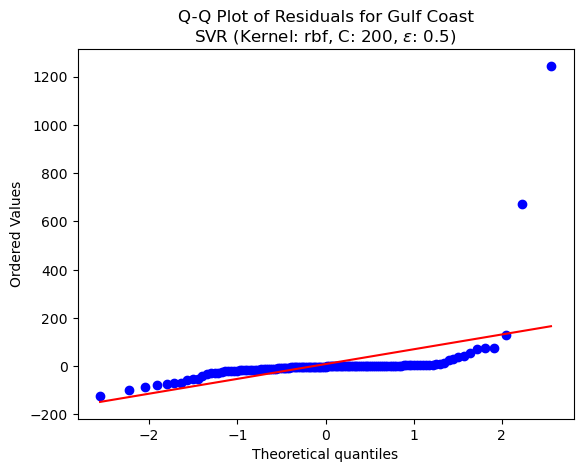

round       basin  data_row_count  feature_quantity  \
0  05_wi_nc  Gulf Coast             326                20   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0         rbf  [10, 50, 100, 150, 200]     200  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...             38.93               62.6              74.05   

   within_50_percent  results_min%_difference  results_max%_difference  \
0              84.73                     0.27                  1606.71   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                1.33               4.95                17.3       13390.01  

[1 rows x 26 columns]

In [148]:
# Define all the variables...
round = '05_wi_nc'
test_size = 0.4
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round05_wi_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round05_wi_nc

#### ROUND 6

Gulf Coast
Number of data points:  326
Number of samples in the training dataset: 244
Best parameters: {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 8537.363939976205
MSE of the model: 797.8265108632686
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 28.24582289230159
MAE of the best SVR model: 13.371620018288759
-------------------------------
R-squared (Coefficient of Determination): 0.9065488461693139
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  37.80487804878049
±15%:  64.63414634146342
±25%:  76.82926829268293
±50%:  85.36585365853658
-------------------------------
Minimum percentage difference: 0.31%
Maximum percentage difference: 1011.91%
-------------------------------
Quantile r

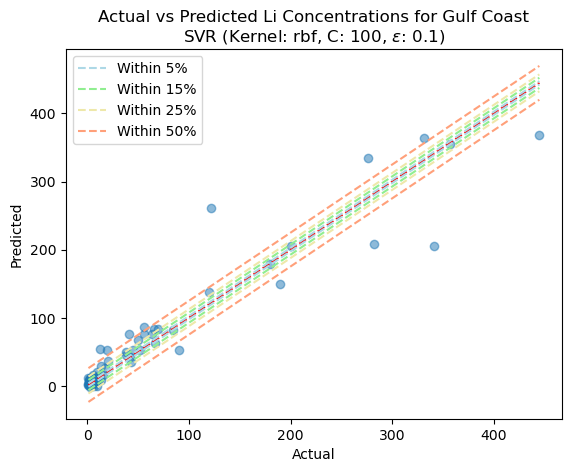

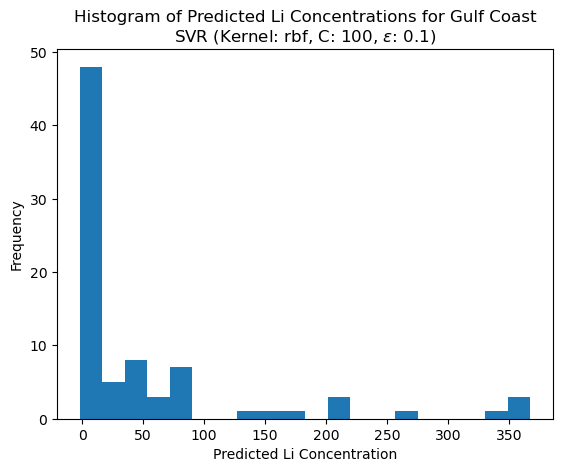

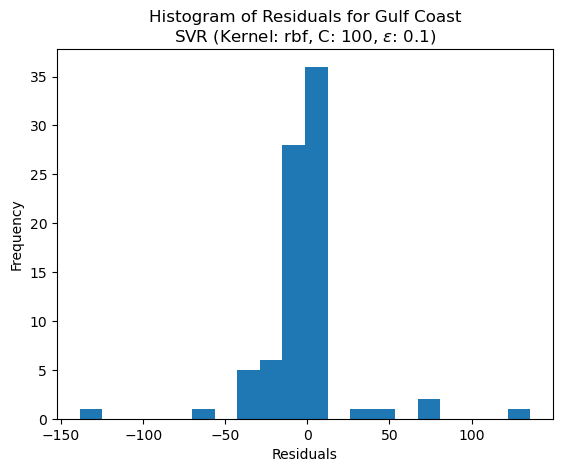

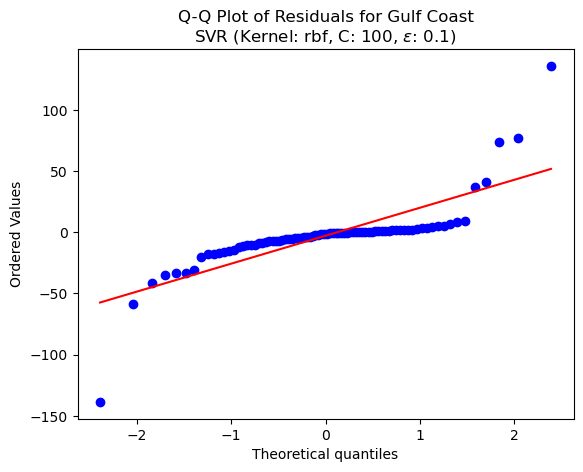

round       basin  data_row_count  feature_quantity  \
0  06_wi_nc  Gulf Coast             326                20   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0         rbf  [10, 50, 100, 150, 200]     100  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...              37.8              64.63              76.83   

   within_50_percent  results_min%_difference  results_max%_difference  \
0              85.37                     0.31                  1011.91   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                1.37               4.97               11.19        18884.5  

[1 rows x 26 columns]

In [149]:
# Define all the variables...
round = '06_wi_nc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round06_wi_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round06_wi_nc

#### ROUND 7

Gulf Coast
Number of data points:  326
Number of samples in the training dataset: 244
Best parameters: {'C': 50, 'epsilon': 0.5, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 8537.363939976205
MSE of the model: 935.7675256626828
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 30.590317514904662
MAE of the best SVR model: 14.20804440851496
-------------------------------
R-squared (Coefficient of Determination): 0.8903915151981572
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  35.36585365853659
±15%:  63.41463414634146
±25%:  76.82926829268293
±50%:  85.36585365853658
-------------------------------
Minimum percentage difference: 0.43%
Maximum percentage difference: 917.34%
-------------------------------
Quantile reg

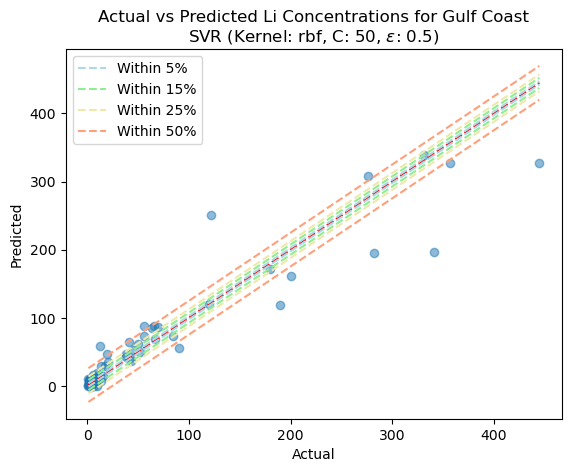

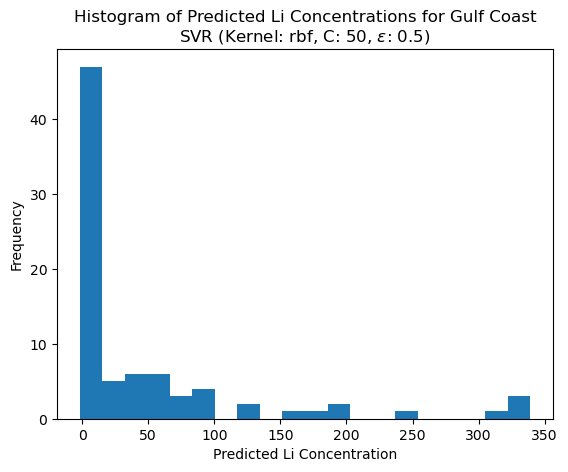

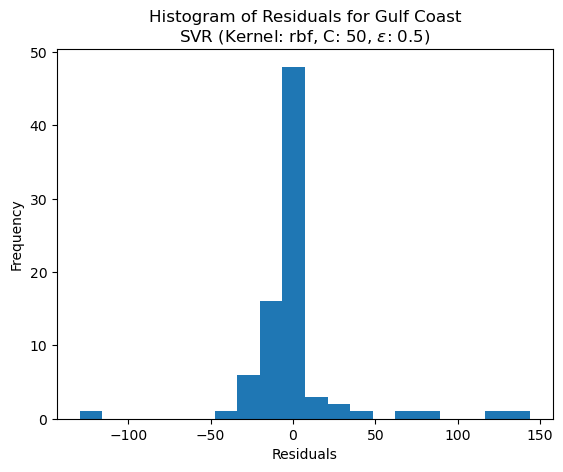

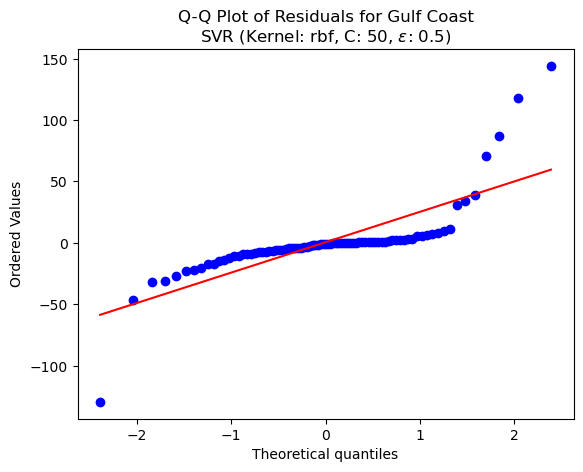

round       basin  data_row_count  feature_quantity  \
0  07_wi_nc  Gulf Coast             326                20   

                                        feature_list kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...    [rbf, poly]   

  best_kernel             c_options  best_c            epsilon_options  ...  \
0         rbf  [10, 20, 30, 40, 50]      50  [0.1, 0.2, 0.3, 0.4, 0.5]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             35.37              63.41              76.83              85.37   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.43                   917.34                1.07   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               5.11               11.35       19631.38  

[1 rows x 26 columns]

In [150]:
# Define all the variables...
round = '07_wi_nc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly']
c_values = [10, 20, 30, 40, 50]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round07_wi_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round07_wi_nc

### INPUT: Base df (no imputed values) (w/ categorical columns)

In [151]:
# Define the input df for this section
df = df_no_imputed.copy()

# Drop the 'IDUSGS' column as it is not needed
columns_to_drop = ['IDUSGS', 'API', 'DATESAMPLE']
df.drop(columns_to_drop, axis=1, inplace=True)

# Define variables that are common to all rounds
basins = df['BASIN_CATEGORY'].unique()
categorical_columns = ['PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'STATE', 'COUNTY', 
                       'PROVINCE', 'REGION', 'WELLNAME', 'PERIOD']

#### ROUND 1

Gulf Coast
Number of data points:  55
Number of samples in the training dataset: 38
Best parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 117813.96809688582
MSE of the model: 98495.0604622091
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 313.8392270928048
MAE of the best SVR model: 129.81461262270403
-------------------------------
R-squared (Coefficient of Determination): 0.16397807447406876
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  23.52941176470588
±15%:  47.05882352941176
±25%:  52.94117647058824
±50%:  82.35294117647058
-------------------------------
Minimum percentage difference: 8.56%
Maximum percentage difference: 497.99%
-------------------------------
Quantile 

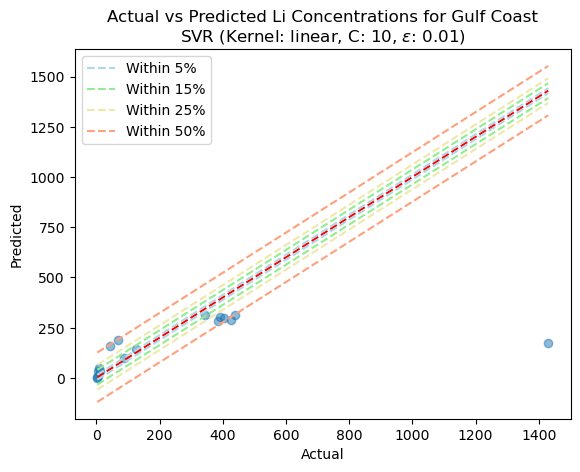

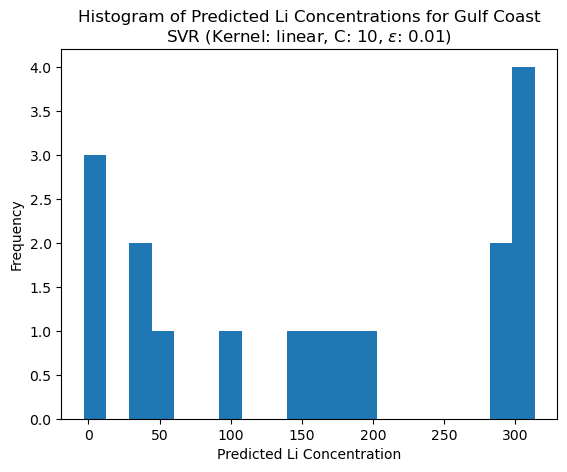

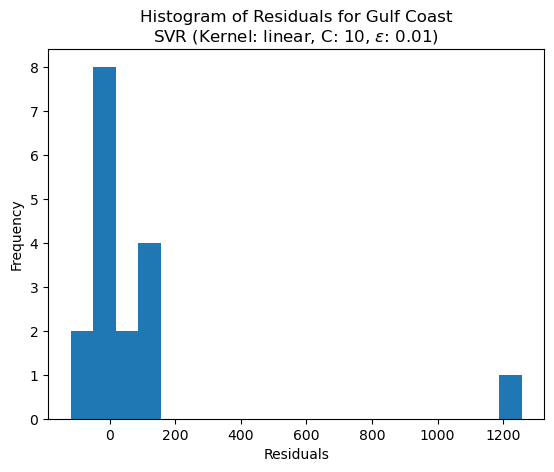

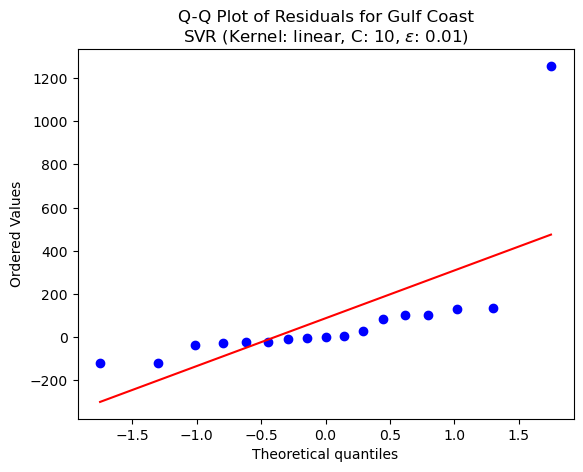

round       basin  data_row_count  feature_quantity  \
0  01_ni_wc  Gulf Coast              55               103   

                                        feature_list       kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [linear, rbf, poly]   

  best_kernel     c_options  best_c   epsilon_options  ...  within_5_percent  \
0      linear  [0.1, 1, 10]      10  [0.01, 0.1, 0.5]  ...             23.53   

   within_15_percent  within_25_percent  within_50_percent  \
0              47.06              52.94              82.35   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     8.56                   497.99               20.76   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0              38.63               118.0        5616.74  

[1 rows x 26 columns]

In [152]:
# Define all the variables...
round = '01_ni_wc'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
epsilon_values = [0.01, 0.1, 0.5]

# Run the function...
df_round01_ni_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round01_ni_wc

#### ROUND 2

Gulf Coast
Number of data points:  55
Number of samples in the training dataset: 38
Best parameters: {'C': 5, 'epsilon': 0.01, 'kernel': 'linear'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 117813.96809688582
MSE of the model: 98495.0604622091
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 313.8392270928048
MAE of the best SVR model: 129.81461262270403
-------------------------------
R-squared (Coefficient of Determination): 0.16397807447406876
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  23.52941176470588
±15%:  47.05882352941176
±25%:  52.94117647058824
±50%:  82.35294117647058
-------------------------------
Minimum percentage difference: 8.56%
Maximum percentage difference: 497.99%
-------------------------------
Quantile r

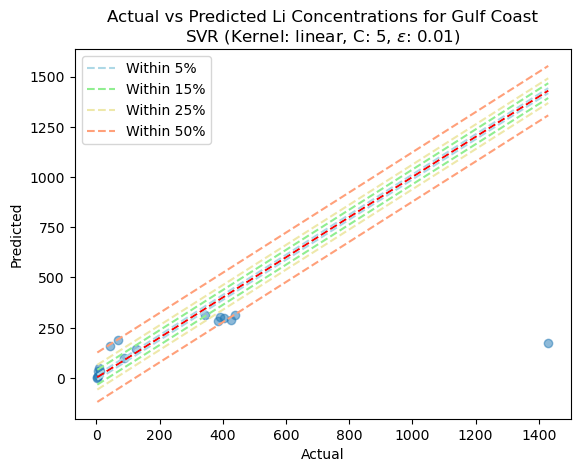

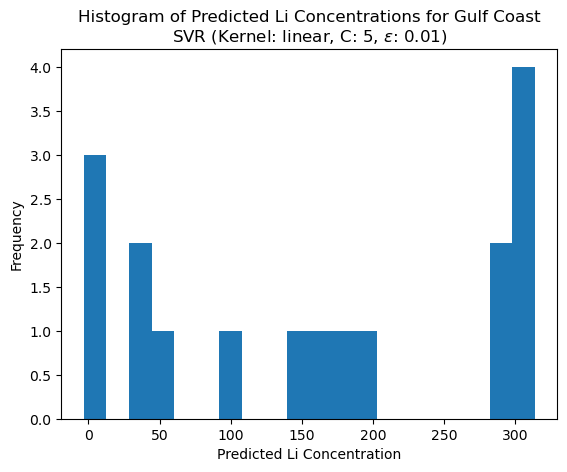

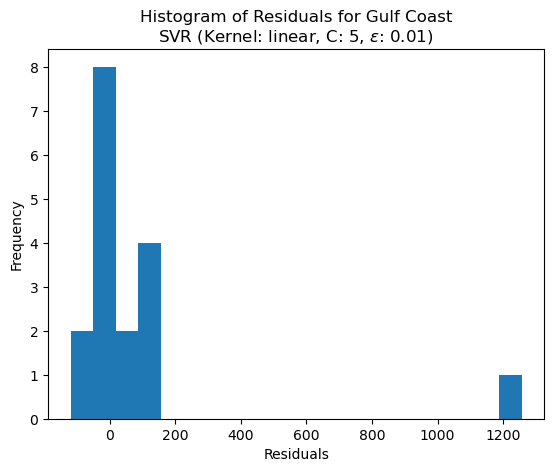

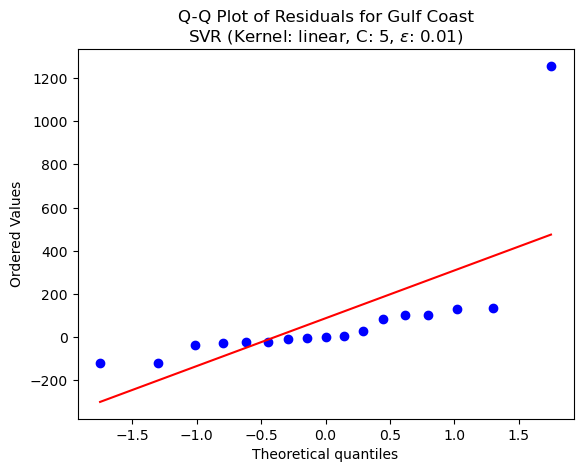

round       basin  data_row_count  feature_quantity  \
0  02_ni_wc  Gulf Coast              55               103   

                                        feature_list  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   

                 kernel_options best_kernel                      c_options  \
0  [linear, rbf, poly, sigmoid]      linear  [0.1, 0.5, 1, 5, 10, 50, 100]   

   best_c              epsilon_options  ...  within_5_percent  \
0       5  [0.01, 0.05, 0.1, 0.2, 0.5]  ...             23.53   

   within_15_percent  within_25_percent  within_50_percent  \
0              47.06              52.94              82.35   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     8.56                   497.99               20.76   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0              38.63               118.0        5616.74  

[1 rows x 26 columns]

In [153]:
# Define all the variables...
round = '02_ni_wc'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50, 100]
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.5]

# Run the function...
df_round02_ni_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round02_ni_wc

#### ROUND 3

Gulf Coast
Number of data points:  55
Number of samples in the training dataset: 41
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 132904.78964285713
MSE of the model: 111830.17190047387
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 334.41018510277746
MAE of the best SVR model: 156.35372058652396
-------------------------------
R-squared (Coefficient of Determination): 0.1585692870739659
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  28.57142857142857
±15%:  35.714285714285715
±25%:  50.0
±50%:  71.42857142857143
-------------------------------
Minimum percentage difference: 12.43%
Maximum percentage difference: 332.49%
-------------------------------
Quantile regressio

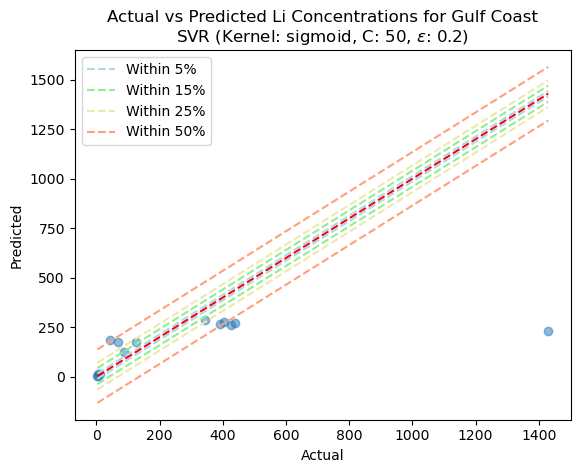

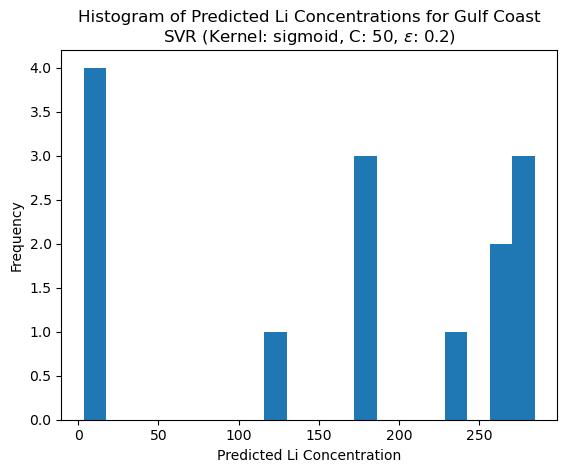

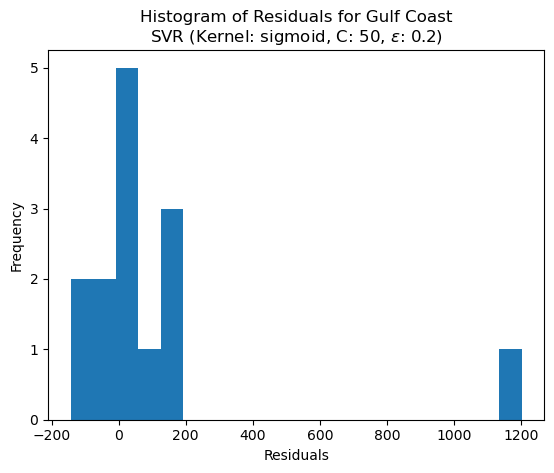

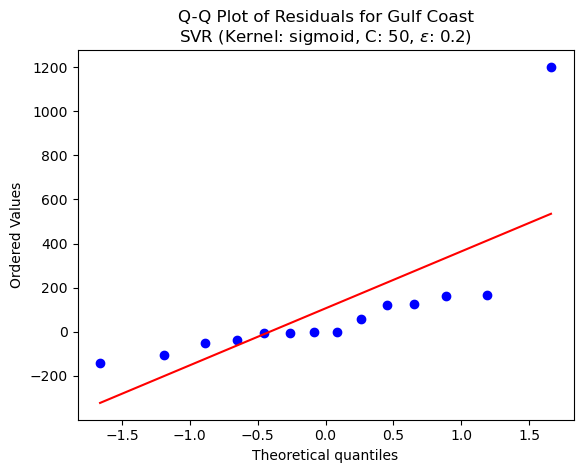

round       basin  data_row_count  feature_quantity  \
0  03_ni_wc  Gulf Coast              55               103   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                 c_options  best_c         epsilon_options  ...  \
0     sigmoid  [0.1, 0.5, 1, 5, 10, 50]      50  [0.01, 0.05, 0.1, 0.2]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             28.57              35.71               50.0              71.43   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                    12.43                   332.49               15.61   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0              81.77              138.82       11934.85  

[1 rows x 26 columns]

In [154]:
# Define all the variables...
round = '03_ni_wc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50]
epsilon_values = [0.01, 0.05, 0.1, 0.2]

# Run the function...
df_round03_ni_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round03_ni_wc

#### ROUND 4

Gulf Coast
Number of data points:  55
Number of samples in the training dataset: 41
Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 132904.78964285713
MSE of the model: 153245.42679874637
The model's MSE is close to or larger than the variance of the target variable.
The model's performance may be limited compared to the variability of the target variable.
RMSE of the model: 391.46574153908585
MAE of the best SVR model: 203.13025600296416
-------------------------------
R-squared (Coefficient of Determination): -0.15304668259547882
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  35.714285714285715
±15%:  50.0
±25%:  57.14285714285714
±50%:  57.14285714285714
-------------------------------
Minimum percentage difference: 5.54%
Maximum percentage difference: 118.93%
-------------------------------
Qua

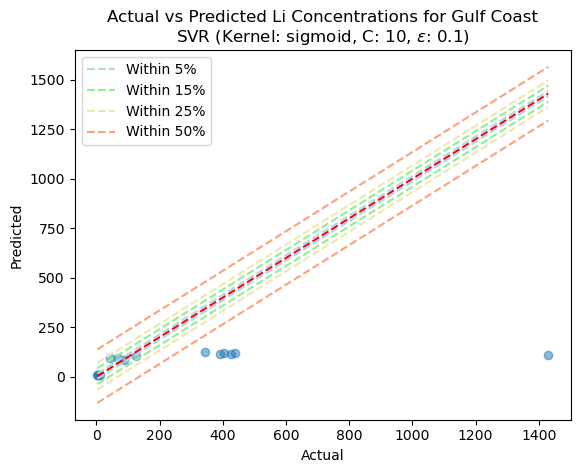

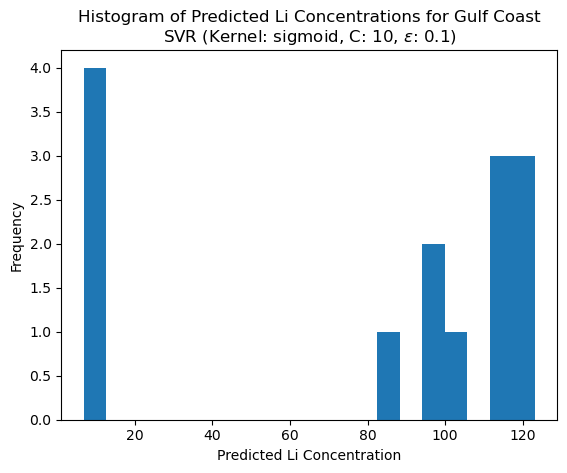

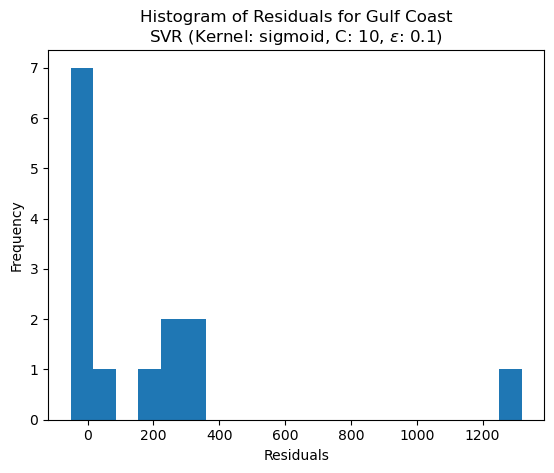

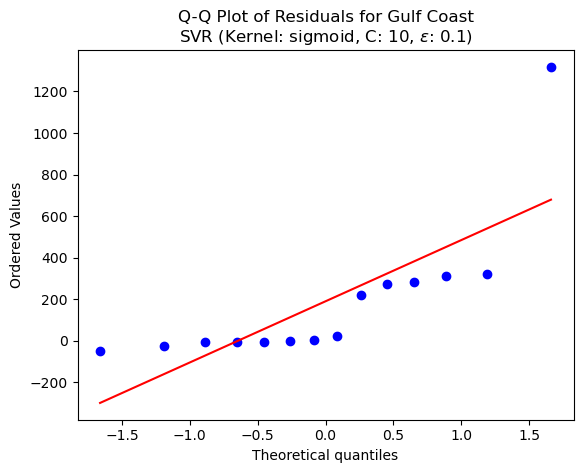

round       basin  data_row_count  feature_quantity  \
0  04_ni_wc  Gulf Coast              55               103   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel             c_options  best_c    epsilon_options  ...  \
0     sigmoid  [0.1, 0.5, 1, 5, 10]      10  [0.01, 0.05, 0.1]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             35.71               50.0              57.14              57.14   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     5.54                   118.93                4.82   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0              38.71              280.65       25127.92  

[1 rows x 26 columns]

In [155]:
# Define all the variables...
round = '04_ni_wc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10]
epsilon_values = [0.01, 0.05, 0.1]

# Run the function...
df_round04_ni_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round04_ni_wc

#### ROUND 5

Gulf Coast
Number of data points:  55
Number of samples in the training dataset: 33
Best parameters: {'C': 200, 'epsilon': 0.1, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 95870.01671487604
MSE of the model: 73711.26928493024
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 271.4981938888917
MAE of the best SVR model: 112.3325701224252
-------------------------------
R-squared (Coefficient of Determination): 0.23113323841224953
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  13.636363636363635
±15%:  45.45454545454545
±25%:  54.54545454545454
±50%:  86.36363636363636
-------------------------------
Minimum percentage difference: 9.83%
Maximum percentage difference: 342.31%
-------------------------------
Quantile

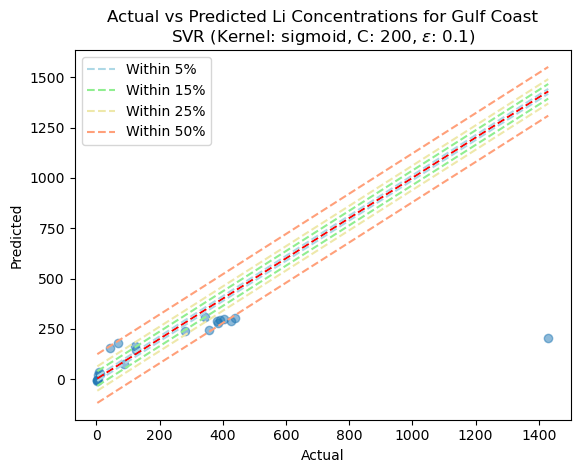

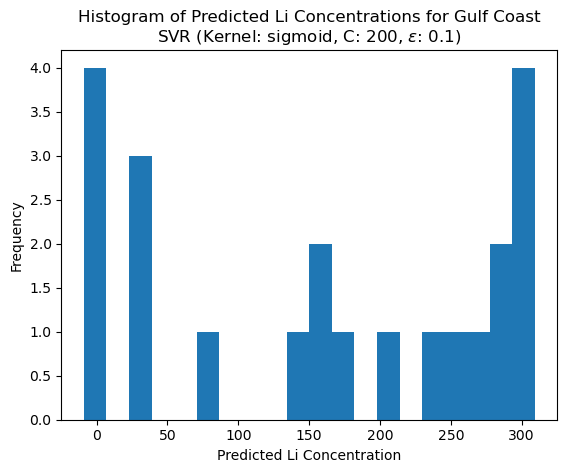

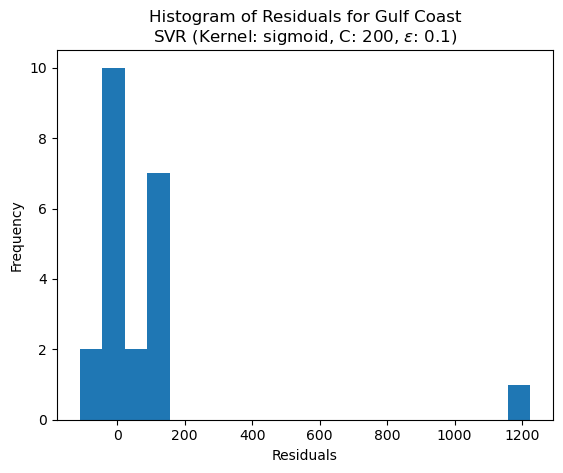

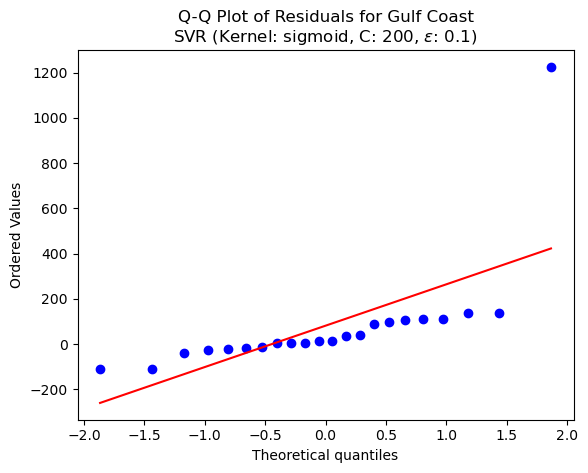

round       basin  data_row_count  feature_quantity  \
0  05_ni_wc  Gulf Coast              55               103   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0     sigmoid  [10, 50, 100, 150, 200]     200  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...             13.64              45.45              54.55   

   within_50_percent  results_min%_difference  results_max%_difference  \
0              86.36                     9.83                   342.31   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               14.93              41.06              109.63        8789.91  

[1 rows x 26 columns]

In [156]:
# Define all the variables...
round = '05_ni_wc'
test_size = 0.4
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round05_ni_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round05_ni_wc

#### ROUND 6

Gulf Coast
Number of data points:  55
Number of samples in the training dataset: 41
Best parameters: {'C': 200, 'epsilon': 0.1, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 132904.78964285713
MSE of the model: 107900.36785848007
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 328.48191405080445
MAE of the best SVR model: 137.8838095304848
-------------------------------
R-squared (Coefficient of Determination): 0.18813785305683228
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  28.57142857142857
±15%:  50.0
±25%:  50.0
±50%:  92.85714285714286
-------------------------------
Minimum percentage difference: 3.55%
Maximum percentage difference: 295.93%
-------------------------------
Quantile regression loss:
Quanti

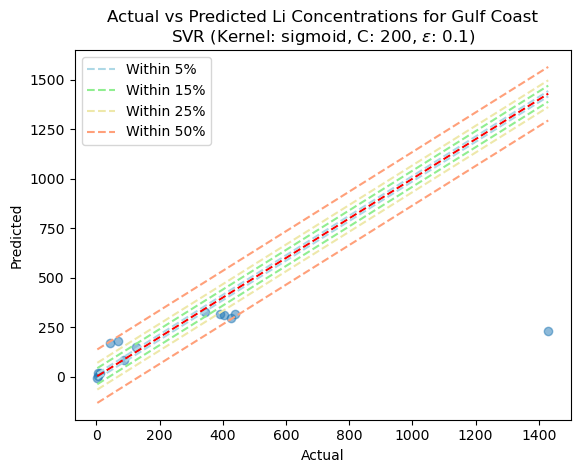

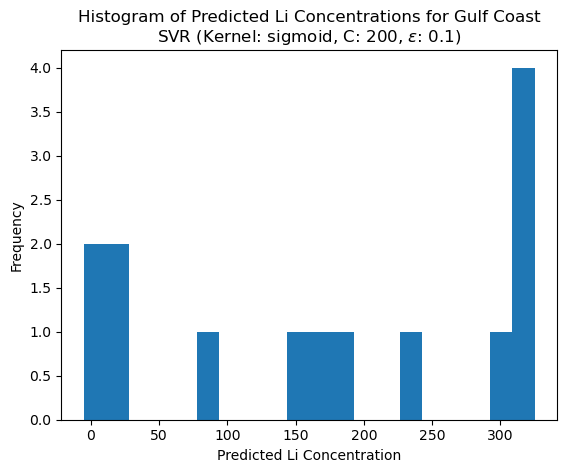

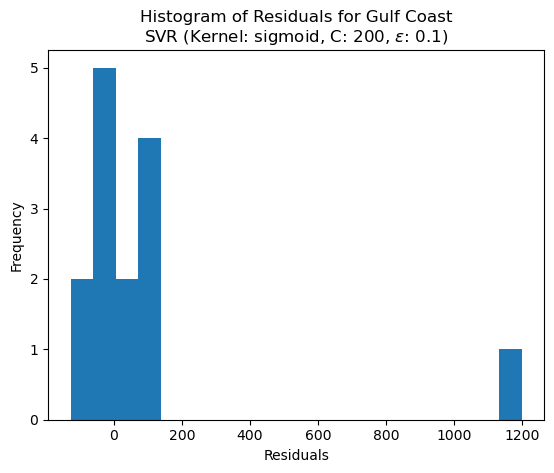

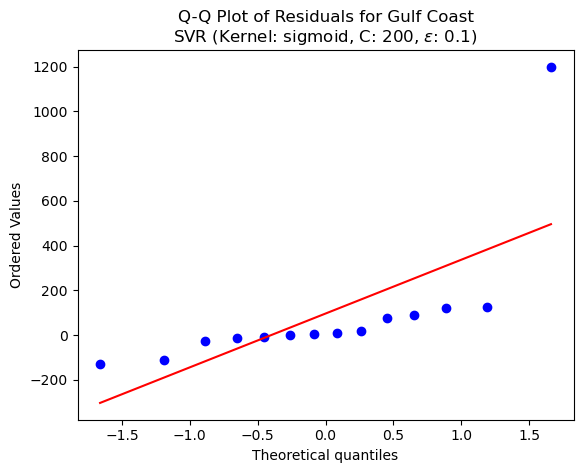

round       basin  data_row_count  feature_quantity  \
0  06_ni_wc  Gulf Coast              55               103   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0     sigmoid  [10, 50, 100, 150, 200]     200  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...             28.57               50.0               50.0   

   within_50_percent  results_min%_difference  results_max%_difference  \
0              92.86                     3.55                   295.93   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                11.4              50.27              119.18        6989.62  

[1 rows x 26 columns]

In [157]:
# Define all the variables...
round = '06_ni_wc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round06_ni_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round06_ni_wc

#### ROUND 7

Gulf Coast
Number of data points:  55
Number of samples in the training dataset: 41
Best parameters: {'C': 50, 'epsilon': 0.5, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 132904.78964285713
MSE of the model: 126822.53304756658
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 356.12151444074055
MAE of the best SVR model: 162.3850155926697
-------------------------------
R-squared (Coefficient of Determination): 0.04576401355914128
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  28.57142857142857
±15%:  35.714285714285715
±25%:  42.857142857142854
±50%:  64.28571428571429
-------------------------------
Minimum percentage difference: 15.79%
Maximum percentage difference: 355.39%
-------------------------------
Quantile

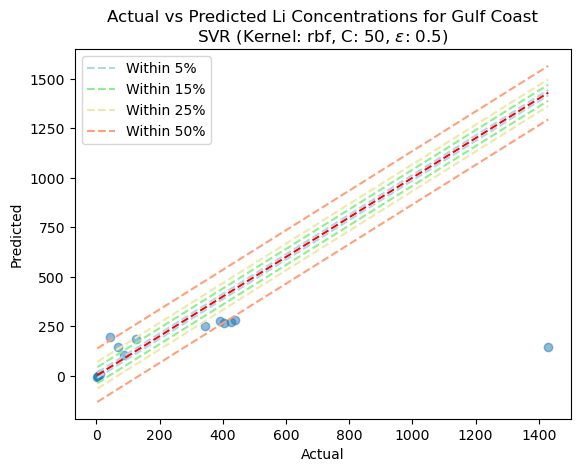

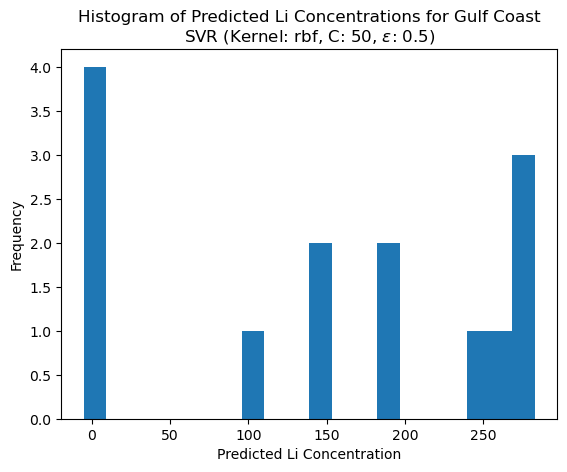

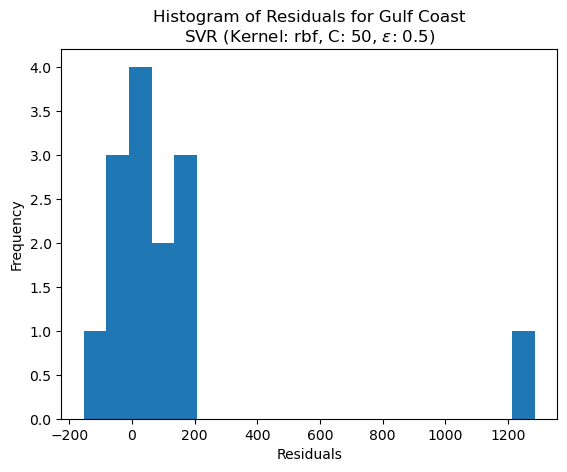

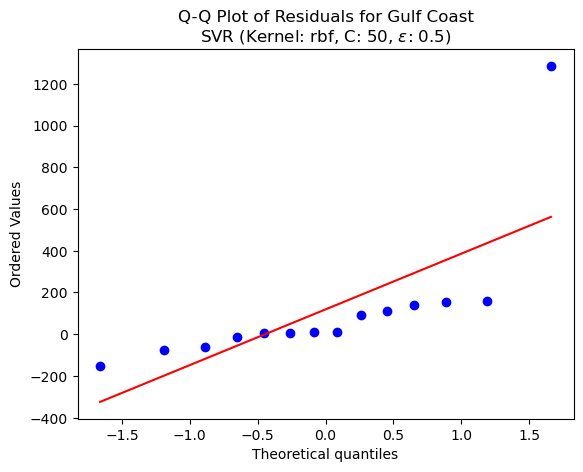

round       basin  data_row_count  feature_quantity  \
0  07_ni_wc  Gulf Coast              55               103   

                                        feature_list kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...    [rbf, poly]   

  best_kernel             c_options  best_c            epsilon_options  ...  \
0         rbf  [10, 20, 30, 40, 50]      50  [0.1, 0.2, 0.3, 0.4, 0.5]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             28.57              35.71              42.86              64.29   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                    15.79                   355.39               10.45   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0              84.41              149.07        16433.4  

[1 rows x 26 columns]

In [158]:
# Define all the variables...
round = '07_ni_wc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly']
c_values = [10, 20, 30, 40, 50]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round07_ni_wc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round07_ni_wc

### INPUT: Base df (no imputed values) (no categorical columns)

In [159]:
# Define the input df for this section
df = df_no_imputed.copy()

# Drop the 'IDUSGS' column as it is not needed
columns_to_drop = ['IDUSGS', 'API', 'DATESAMPLE', 'PLAYTYPE', 'WELLTYPE', 
                   'FORMSIMPLE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 
                   'WELLNAME', 'PERIOD']
df.drop(columns_to_drop, axis=1, inplace=True)

# Define variables that are common to all rounds
basins = df['BASIN_CATEGORY'].unique()
categorical_columns = []

#### ROUND 1

Gulf Coast
Number of data points:  78
Number of samples in the training dataset: 54


Best parameters: {'C': 1, 'epsilon': 0.5, 'kernel': 'linear'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 22587.945815972216
MSE of the model: 4096.268601066393
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 64.00209841143017
MAE of the best SVR model: 40.93457060365238
-------------------------------
R-squared (Coefficient of Determination): 0.8186524514252256
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  45.83333333333333
±15%:  54.166666666666664
±25%:  54.166666666666664
±50%:  66.66666666666666
-------------------------------
Minimum percentage difference: 4.09%
Maximum percentage difference: 418.89%
-------------------------------
Quantile regression loss:
Quantile 0.25: 1.0649800276349475
Quantile 0.5: 9.539844633447075
Qu

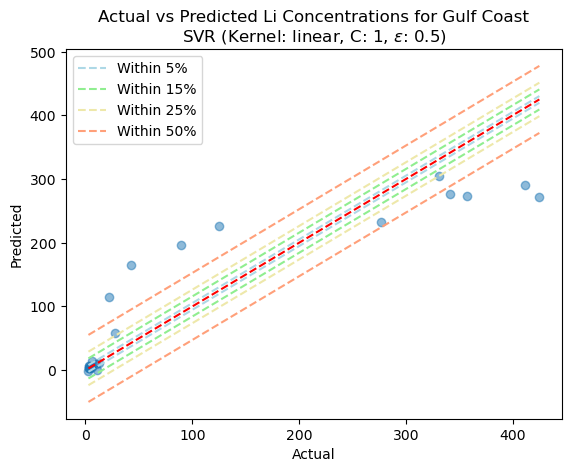

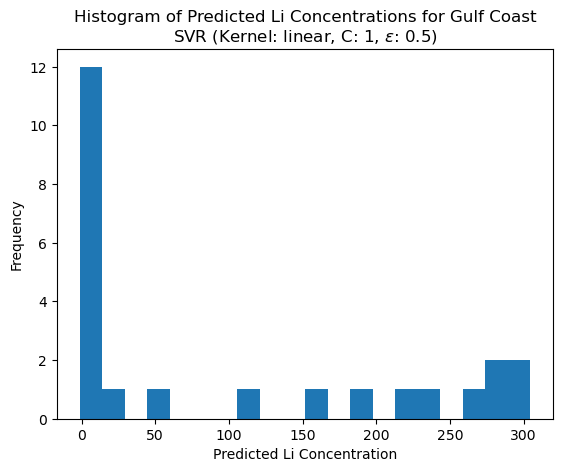

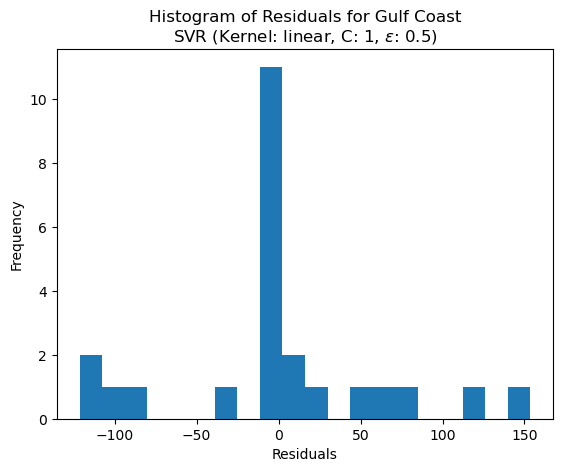

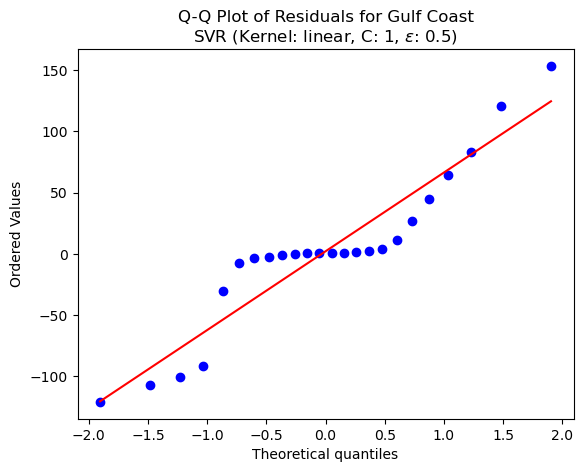

round       basin  data_row_count  feature_quantity  \
0  01_ni_nc  Gulf Coast              78                20   

                                        feature_list       kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [linear, rbf, poly]   

  best_kernel     c_options  best_c   epsilon_options  ...  within_5_percent  \
0      linear  [0.1, 1, 10]       1  [0.01, 0.1, 0.5]  ...             45.83   

   within_15_percent  within_25_percent  within_50_percent  \
0              54.17              54.17              66.67   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     4.09                   418.89                1.06   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               9.54               85.16       38535.58  

[1 rows x 26 columns]

In [160]:
# Define all the variables...
round = '01_ni_nc'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
epsilon_values = [0.01, 0.1, 0.5]

# Run the function...
df_round01_ni_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round01_ni_nc

#### ROUND 2

Gulf Coast
Number of data points:  78
Number of samples in the training dataset: 54


Best parameters: {'C': 50, 'epsilon': 0.01, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 22587.945815972216
MSE of the model: 5655.028111695131
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 75.19992095537822
MAE of the best SVR model: 44.79470919024166
-------------------------------
R-squared (Coefficient of Determination): 0.7496439845496534
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  37.5
±15%:  45.83333333333333
±25%:  58.333333333333336
±50%:  75.0
-------------------------------
Minimum percentage difference: 0.37%
Maximum percentage difference: 843.30%
-------------------------------
Quantile regression loss:
Quantile 0.25: 2.679515311343222
Quantile 0.5: 18.876672091324295
Quantile 0.75: 59.11389394

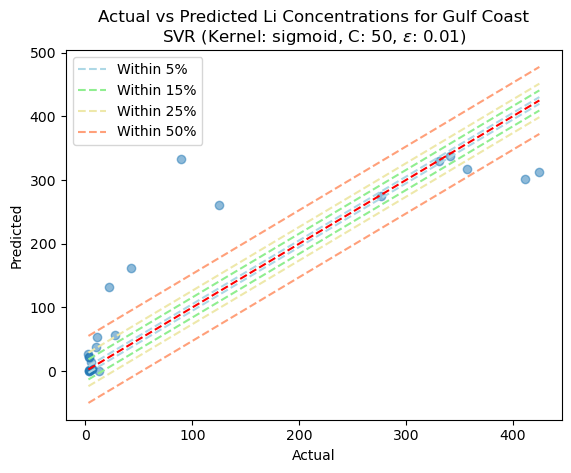

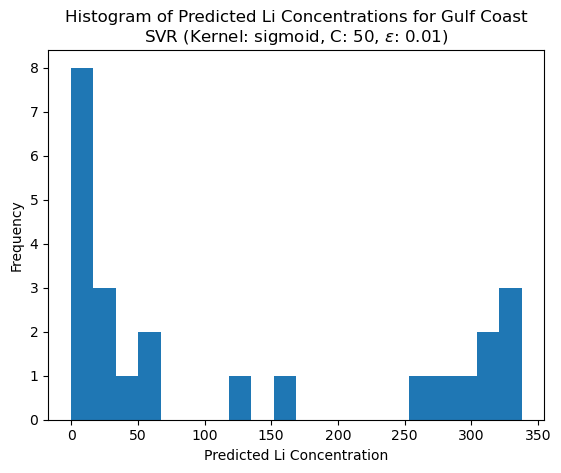

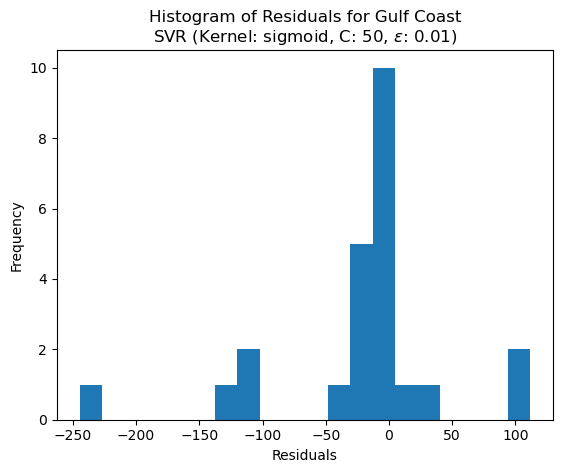

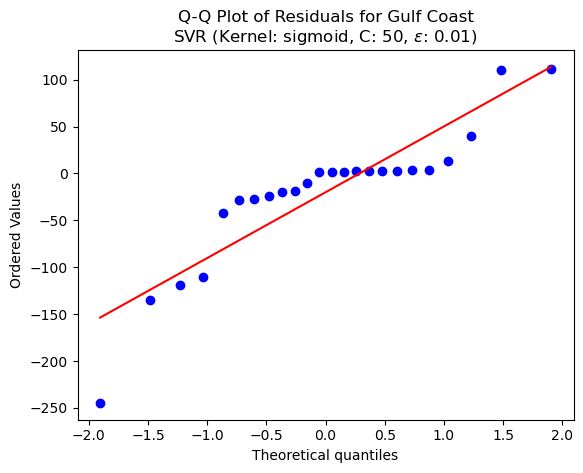

round       basin  data_row_count  feature_quantity  \
0  02_ni_nc  Gulf Coast              78                20   

                                        feature_list  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   

                 kernel_options best_kernel                      c_options  \
0  [linear, rbf, poly, sigmoid]     sigmoid  [0.1, 0.5, 1, 5, 10, 50, 100]   

   best_c              epsilon_options  ...  within_5_percent  \
0      50  [0.01, 0.05, 0.1, 0.2, 0.5]  ...              37.5   

   within_15_percent  within_25_percent  within_50_percent  \
0              45.83              58.33               75.0   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.37                    843.3                2.68   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0              18.88               59.11       32489.43  

[1 rows x 26 columns]

In [161]:
# Define all the variables...
round = '02_ni_nc'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50, 100]
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.5]

# Run the function...
df_round02_ni_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round02_ni_nc

#### ROUND 3

Gulf Coast
Number of data points:  78
Number of samples in the training dataset: 58
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 18070.4826
MSE of the model: 6490.836191274966
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 80.56572590919147
MAE of the best SVR model: 48.982856143592564
-------------------------------
R-squared (Coefficient of Determination): 0.6408044912273143
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  5.0
±15%:  35.0
±25%:  55.00000000000001
±50%:  70.0
-------------------------------
Minimum percentage difference: 1.65%
Maximum percentage difference: 997.21%
-------------------------------
Quantile regression loss:
Quantile 0.25: 5.11092858736609

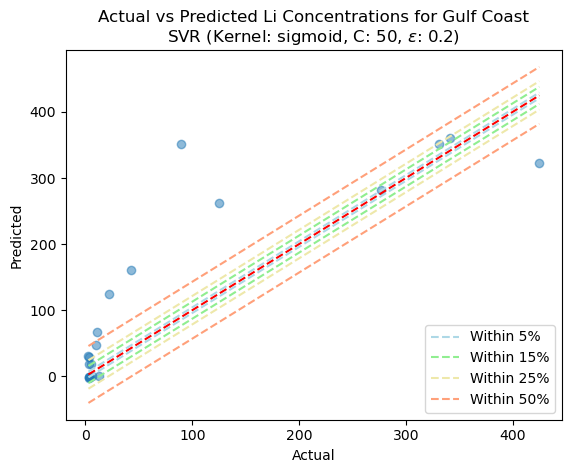

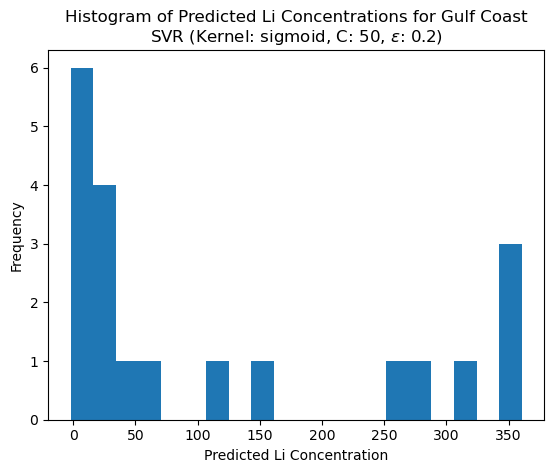

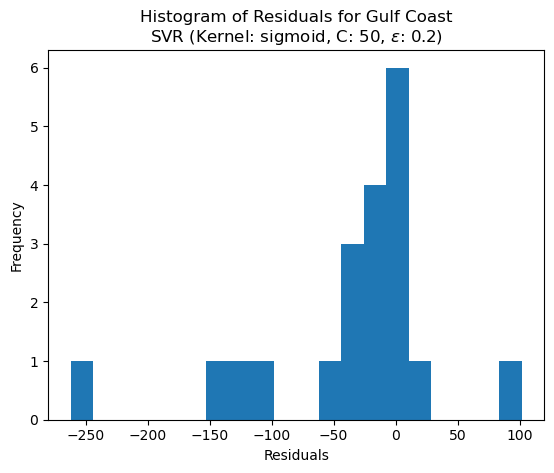

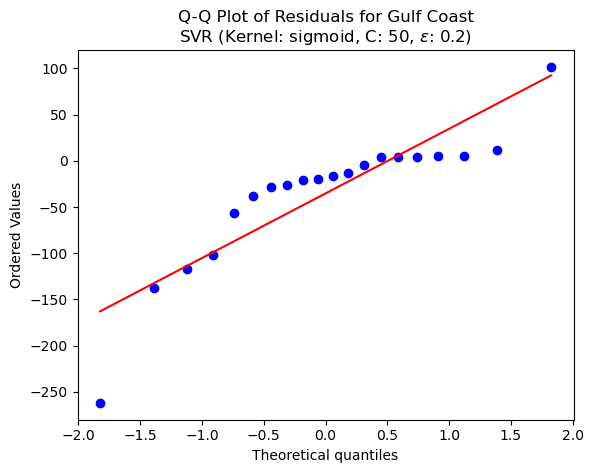

round       basin  data_row_count  feature_quantity  \
0  03_ni_nc  Gulf Coast              78                20   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                 c_options  best_c         epsilon_options  ...  \
0     sigmoid  [0.1, 0.5, 1, 5, 10, 50]      50  [0.01, 0.05, 0.1, 0.2]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0               5.0               35.0               55.0               70.0   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     1.65                   997.21                5.11   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0              20.22               67.97       33211.62  

[1 rows x 26 columns]

In [162]:
# Define all the variables...
round = '03_ni_nc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50]
epsilon_values = [0.01, 0.05, 0.1, 0.2]

# Run the function...
df_round03_ni_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round03_ni_nc

#### ROUND 4

Gulf Coast
Number of data points:  78
Number of samples in the training dataset: 58
Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 18070.4826
MSE of the model: 6901.760723949554
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 83.07683626589035
MAE of the best SVR model: 46.46177921799711
-------------------------------
R-squared (Coefficient of Determination): 0.6180643939221881
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  40.0
±15%:  60.0
±25%:  60.0
±50%:  65.0
-------------------------------
Minimum percentage difference: 1.68%
Maximum percentage difference: 263.45%
-------------------------------
Quantile regression loss:
Quantile 0.25: 1.4744928693806727
Quantile 0

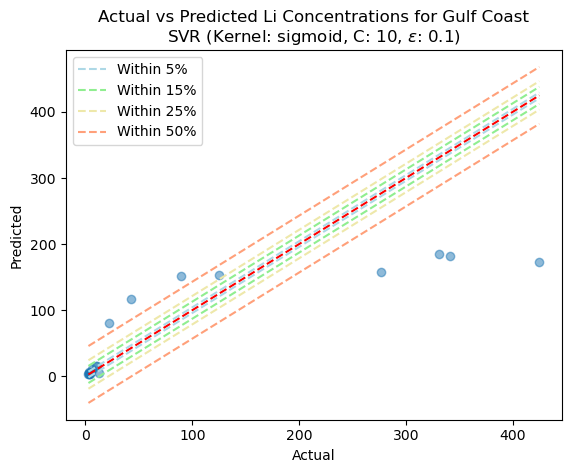

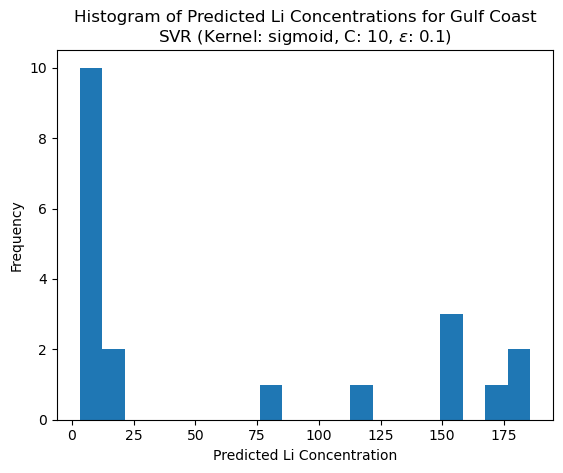

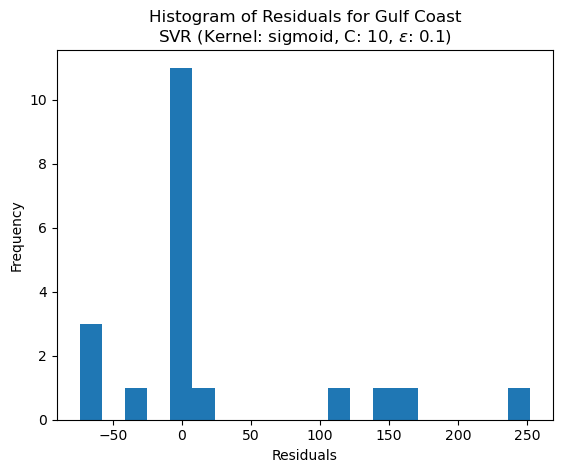

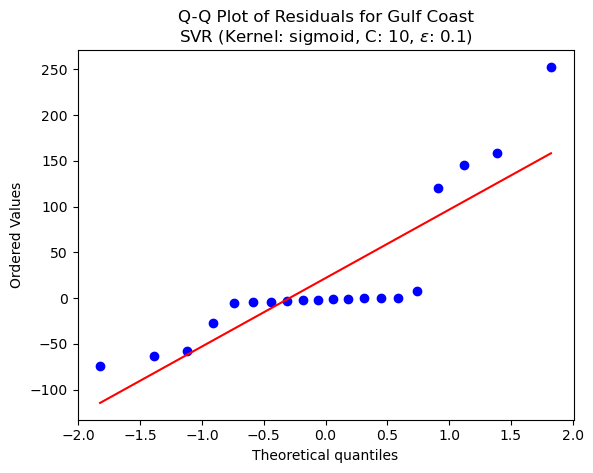

round       basin  data_row_count  feature_quantity  \
0  04_ni_nc  Gulf Coast              78                20   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel             c_options  best_c    epsilon_options  ...  \
0     sigmoid  [0.1, 0.5, 1, 5, 10]      10  [0.01, 0.05, 0.1]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0              40.0               60.0               60.0               65.0   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     1.68                   263.45                1.47   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               4.95               65.61       46748.34  

[1 rows x 26 columns]

In [163]:
# Define all the variables...
round = '04_ni_nc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10]
epsilon_values = [0.01, 0.05, 0.1]

# Run the function...
df_round04_ni_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round04_ni_nc

#### ROUND 5

Gulf Coast
Number of data points:  78
Number of samples in the training dataset: 46
Best parameters: {'C': 50, 'epsilon': 0.3, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 23388.791835937496
MSE of the model: 6490.662981215481
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 80.56465094081572
MAE of the best SVR model: 51.9590770281724
-------------------------------
R-squared (Coefficient of Determination): 0.7224883171929213
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  28.125
±15%:  46.875
±25%:  56.25
±50%:  65.625
-------------------------------
Minimum percentage difference: 0.81%
Maximum percentage difference: 686.17%
-------------------------------
Quantile regression loss:
Quantile 0.25: 4.9434817137259

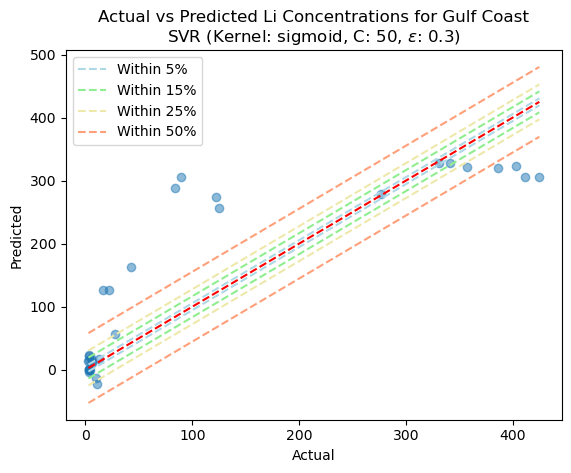

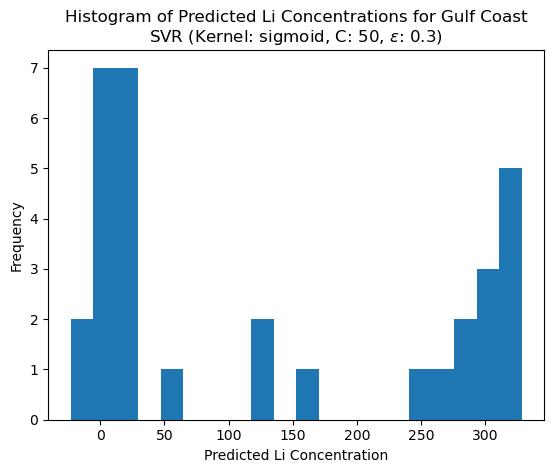

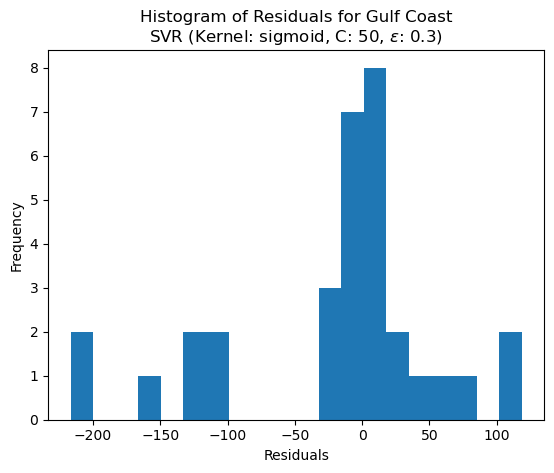

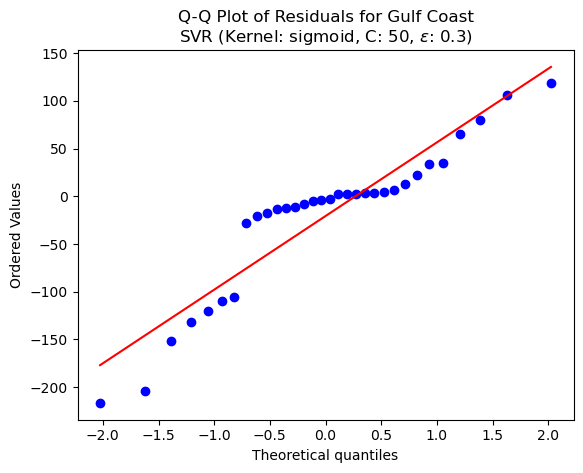

round       basin  data_row_count  feature_quantity  \
0  05_ni_nc  Gulf Coast              78                20   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0     sigmoid  [10, 50, 100, 150, 200]      50  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...             28.12              46.88              56.25   

   within_50_percent  results_min%_difference  results_max%_difference  \
0              65.62                     0.81                   686.17   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                4.94              19.29              105.33       41965.21  

[1 rows x 26 columns]

In [164]:
# Define all the variables...
round = '05_ni_nc'
test_size = 0.4
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round05_ni_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round05_ni_nc

#### ROUND 6

Gulf Coast
Number of data points:  78
Number of samples in the training dataset: 58
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 18070.4826
MSE of the model: 6490.836191274966
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 80.56572590919147
MAE of the best SVR model: 48.982856143592564
-------------------------------
R-squared (Coefficient of Determination): 0.6408044912273143
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  5.0
±15%:  35.0
±25%:  55.00000000000001
±50%:  70.0
-------------------------------
Minimum percentage difference: 1.65%
Maximum percentage difference: 997.21%
-------------------------------
Quantile regression loss:
Quantile 0.25: 5.11092858736609

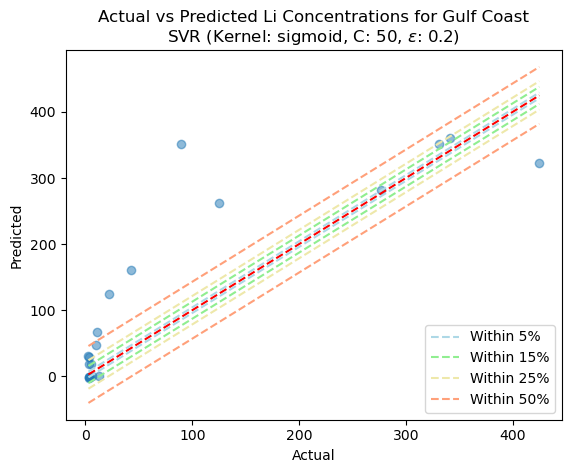

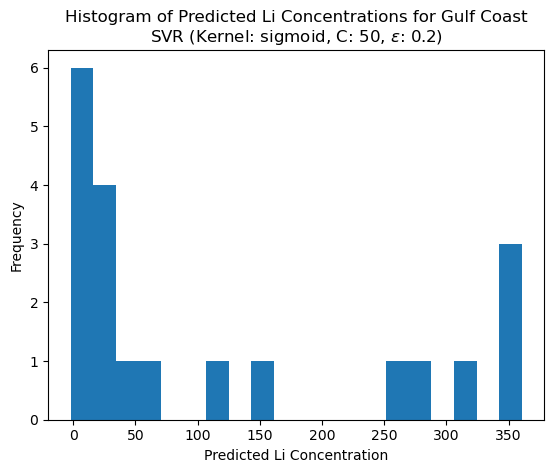

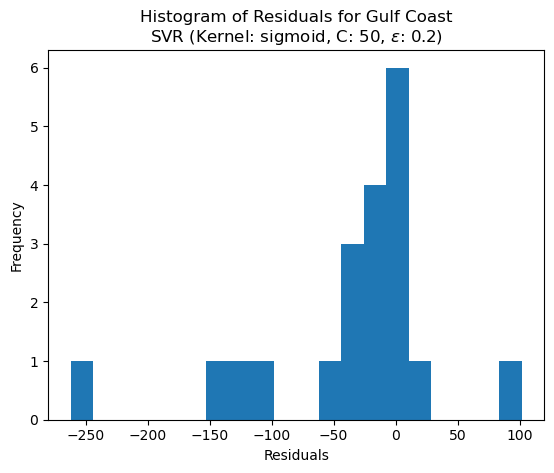

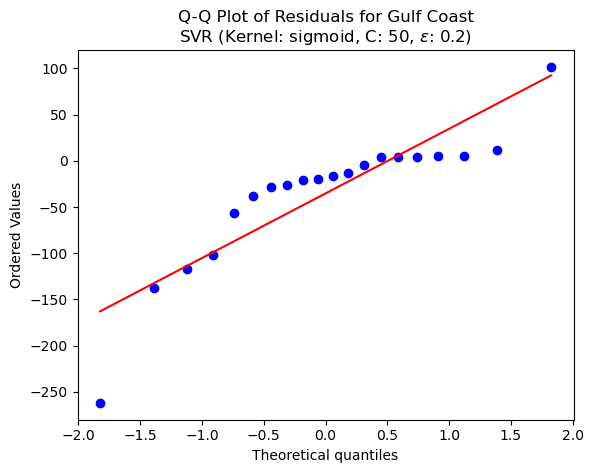

round       basin  data_row_count  feature_quantity  \
0  06_ni_nc  Gulf Coast              78                20   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0     sigmoid  [10, 50, 100, 150, 200]      50  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...               5.0               35.0               55.0   

   within_50_percent  results_min%_difference  results_max%_difference  \
0               70.0                     1.65                   997.21   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                5.11              20.22               67.97       33211.62  

[1 rows x 26 columns]

In [165]:
# Define all the variables...
round = '06_ni_nc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round06_ni_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round06_ni_nc

#### ROUND 7

Gulf Coast
Number of data points:  78
Number of samples in the training dataset: 58
Best parameters: {'C': 50, 'epsilon': 0.5, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 18070.4826
MSE of the model: 2210.6170435901718
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 47.017199444354105
MAE of the best SVR model: 27.150393894042526
-------------------------------
R-squared (Coefficient of Determination): 0.8776669615016164
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  15.0
±15%:  65.0
±25%:  70.0
±50%:  80.0
-------------------------------
Minimum percentage difference: 2.19%
Maximum percentage difference: 324.78%
-------------------------------
Quantile regression loss:
Quantile 0.25: 4.675765314945496
Quantile 0.5

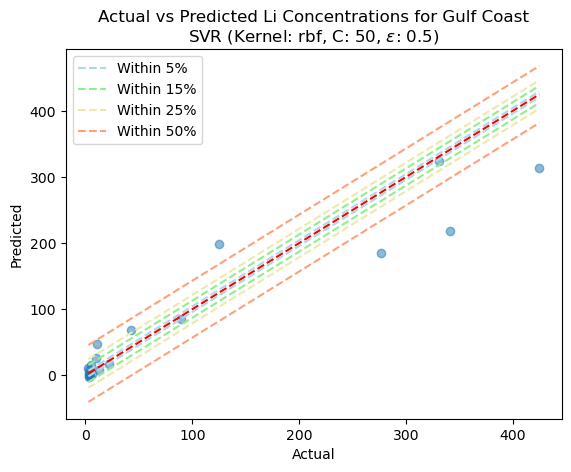

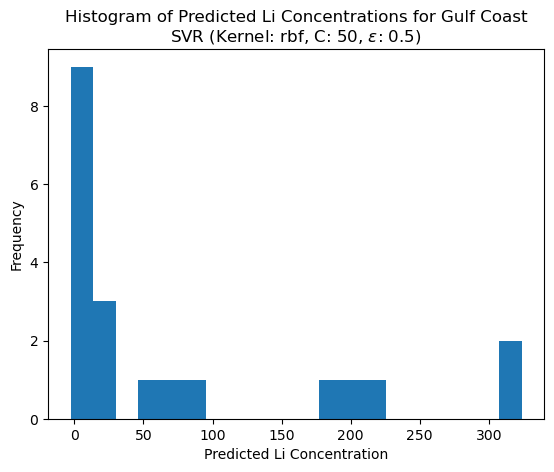

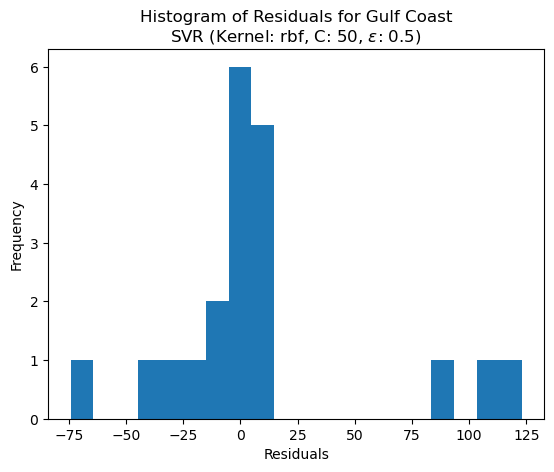

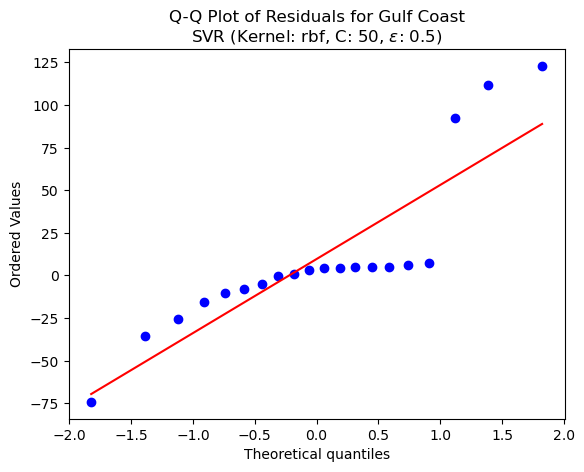

round       basin  data_row_count  feature_quantity  \
0  07_ni_nc  Gulf Coast              78                20   

                                        feature_list kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...    [rbf, poly]   

  best_kernel             c_options  best_c            epsilon_options  ...  \
0         rbf  [10, 20, 30, 40, 50]      50  [0.1, 0.2, 0.3, 0.4, 0.5]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0              15.0               65.0               70.0               80.0   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     2.19                   324.78                4.68   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               6.55               28.27       37162.79  

[1 rows x 26 columns]

In [166]:
# Define all the variables...
round = '07_ni_nc'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly']
c_values = [10, 20, 30, 40, 50]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round07_ni_nc = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round07_ni_nc

### INPUT: Base df (w/ imputed) (no categorical) (element concentrations only)

In [167]:
# Define the input df for this section
df = df_with_imputed.copy()

# Drop the 'IDUSGS' column as it is not needed
columns_to_drop = ['IDUSGS', 'API', 'DATESAMPLE', 'PLAYTYPE', 'WELLTYPE', 
                   'FORMSIMPLE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 
                   'WELLNAME', 'PERIOD', 'LATITUDE', 'LONGITUDE', 
                   'DEPTHUPPER', 'DEPTHLOWER', 'CHARGEBAL']
df.drop(columns_to_drop, axis=1, inplace=True)

# Define variables that are common to all rounds
basins = df['BASIN_CATEGORY'].unique()
categorical_columns = []

#### ROUND 1

Gulf Coast
Number of data points:  435
Number of samples in the training dataset: 304


Best parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'poly'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 42148.16030227634
MSE of the model: 32335.794015278512
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 179.82156159726372
MAE of the best SVR model: 39.60273159153559
-------------------------------
R-squared (Coefficient of Determination): 0.23280651436802868
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  31.297709923664126
±15%:  61.832061068702295
±25%:  77.09923664122137
±50%:  82.44274809160305
-------------------------------
Minimum percentage difference: 0.27%
Maximum percentage difference: 3582.54%
-------------------------------
Quantile regression loss:
Quantile 0.25: 2.27460452495006
Quantile 0.5: 6.515780404558306
Q

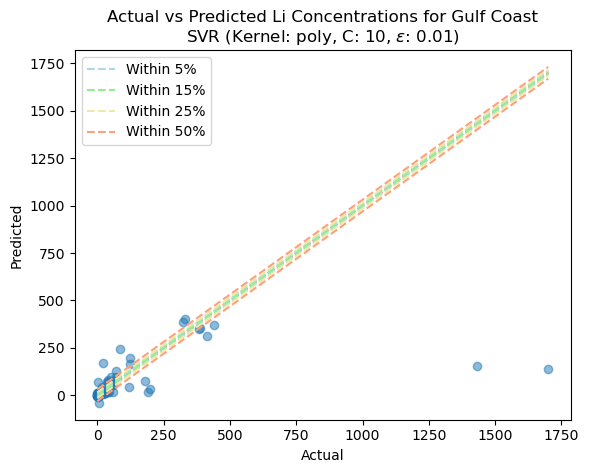

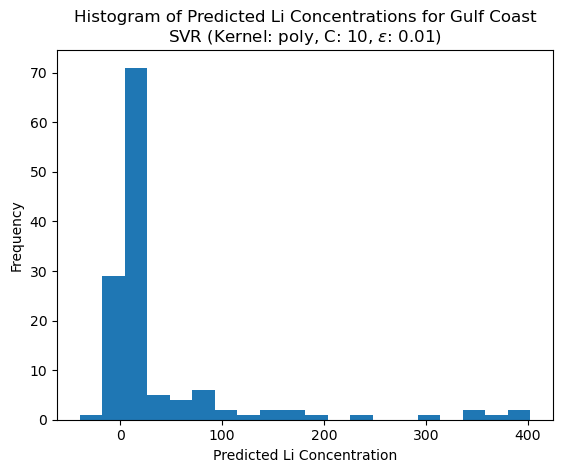

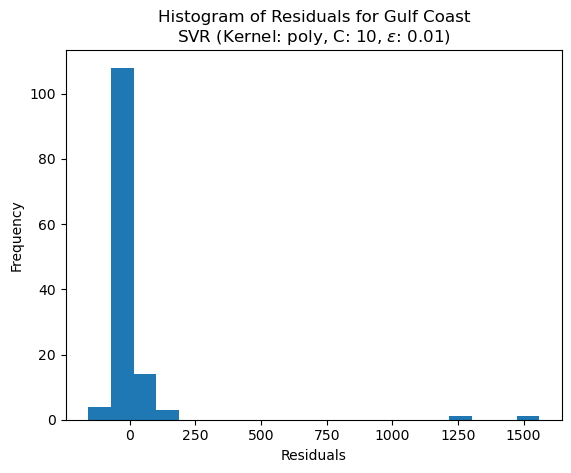

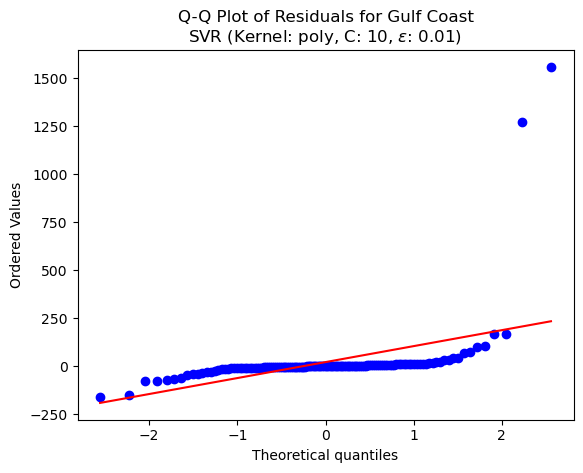

round       basin  data_row_count  feature_quantity  \
0  01_wi_nc_eo  Gulf Coast             435                15   

                                        feature_list       kernel_options  \
0  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...  [linear, rbf, poly]   

  best_kernel     c_options  best_c   epsilon_options  ...  within_5_percent  \
0        poly  [0.1, 1, 10]      10  [0.01, 0.1, 0.5]  ...              31.3   

   within_15_percent  within_25_percent  within_50_percent  \
0              61.83               77.1              82.44   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.27                  3582.54                2.27   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               6.52               14.76        3028.03  

[1 rows x 26 columns]

In [168]:
# Define all the variables...
round = '01_wi_nc_eo'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly']
c_values = [0.1, 1, 10]
epsilon_values = [0.01, 0.1, 0.5]

# Run the function...
df_round01_wi_nc_eo = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round01_wi_nc_eo

#### ROUND 2

Gulf Coast
Number of data points:  435
Number of samples in the training dataset: 304


Best parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 42148.16030227634
MSE of the model: 32602.852485392228
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 180.56259990760054
MAE of the best SVR model: 36.63851371267781
-------------------------------
R-squared (Coefficient of Determination): 0.22647033105187842
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  50.38167938931297
±15%:  74.80916030534351
±25%:  81.67938931297711
±50%:  85.49618320610686
-------------------------------
Minimum percentage difference: 0.16%
Maximum percentage difference: 10836.67%
-------------------------------
Quantile regression loss:
Quantile 0.25: 1.0455042985371996
Quantile 0.5: 3.0841424906957116

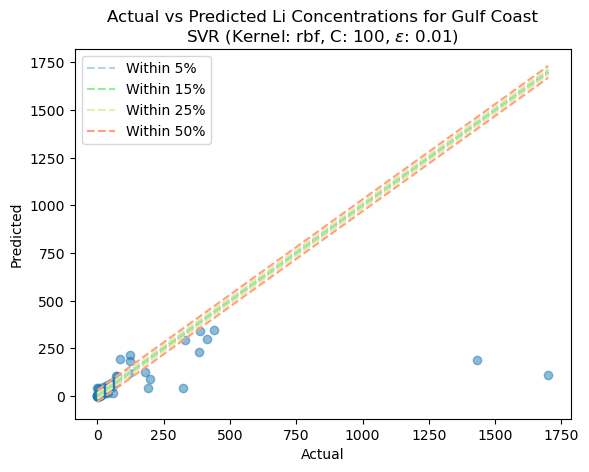

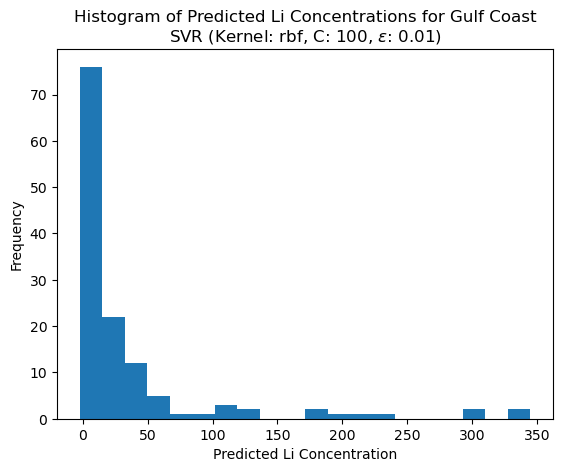

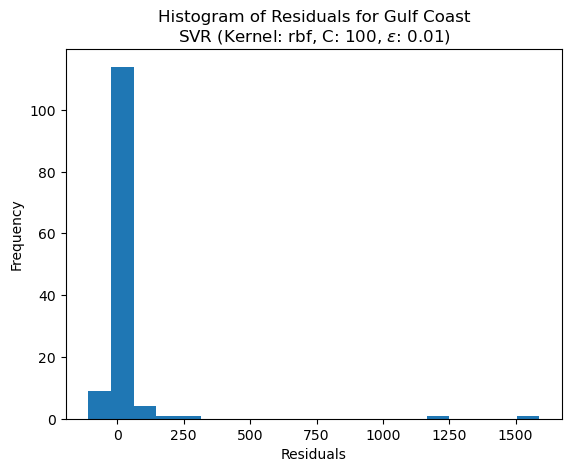

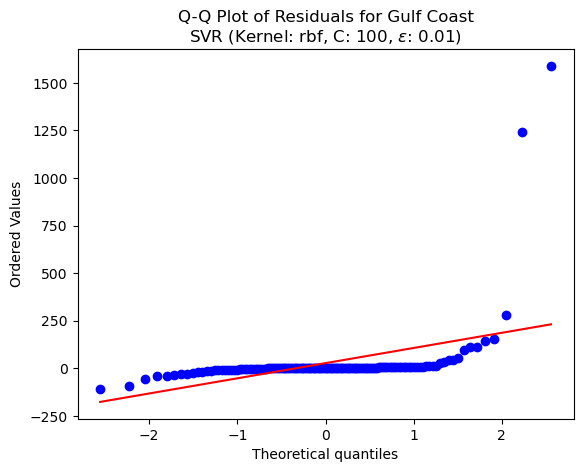

round       basin  data_row_count  feature_quantity  \
0  02_wi_nc_eo  Gulf Coast             435                15   

                                        feature_list  \
0  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   

                 kernel_options best_kernel                      c_options  \
0  [linear, rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50, 100]   

   best_c              epsilon_options  ...  within_5_percent  \
0     100  [0.01, 0.05, 0.1, 0.2, 0.5]  ...             50.38   

   within_15_percent  within_25_percent  within_50_percent  \
0              74.81              81.68               85.5   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.16                 10836.67                1.05   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               3.08                9.37        2790.34  

[1 rows x 26 columns]

In [169]:
# Define all the variables...
round = '02_wi_nc_eo'
test_size = 0.3
random_state = 42
kernel_values = ['linear', 'rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50, 100]
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.5]

# Run the function...
df_round02_wi_nc_eo = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round02_wi_nc_eo

#### ROUND 3

Gulf Coast
Number of data points:  435
Number of samples in the training dataset: 326
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 49772.978934522995
MSE of the model: 38822.571229954185
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 197.03444173533262
MAE of the best SVR model: 41.48719356275379
-------------------------------
R-squared (Coefficient of Determination): 0.22000707892075777
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  51.37614678899083
±15%:  76.14678899082568
±25%:  78.89908256880734
±50%:  86.23853211009175
-------------------------------
Minimum percentage difference: 0.15%
Maximum percentage difference: 9676.76%
-------------------------------
Quantile

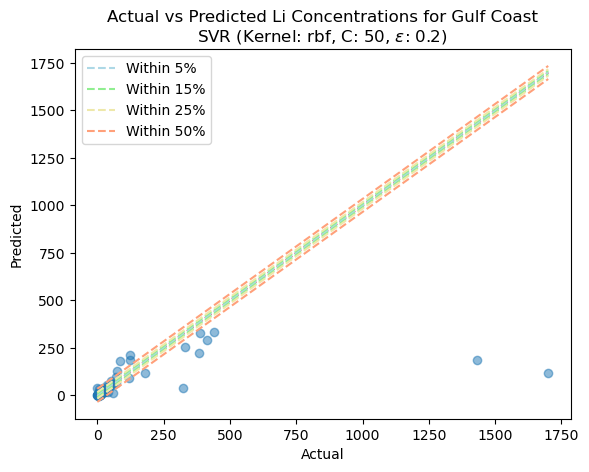

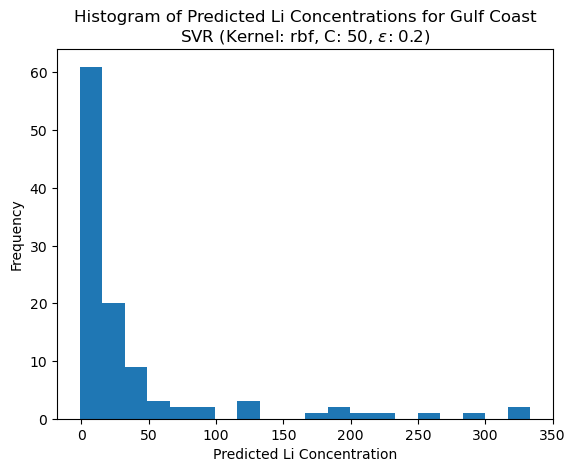

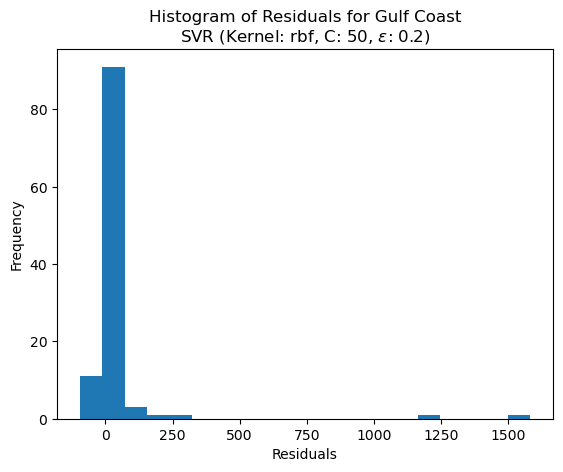

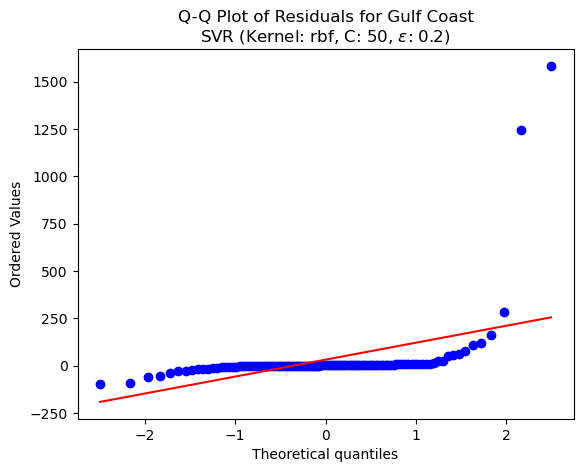

round       basin  data_row_count  feature_quantity  \
0  03_wi_nc_eo  Gulf Coast             435                15   

                                        feature_list        kernel_options  \
0  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...  [rbf, poly, sigmoid]   

  best_kernel                 c_options  best_c         epsilon_options  ...  \
0         rbf  [0.1, 0.5, 1, 5, 10, 50]      50  [0.01, 0.05, 0.1, 0.2]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             51.38              76.15               78.9              86.24   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.15                  9676.76                1.23   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               3.15                7.91         2819.0  

[1 rows x 26 columns]

In [170]:
# Define all the variables...
round = '03_wi_nc_eo'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50]
epsilon_values = [0.01, 0.05, 0.1, 0.2]

# Run the function...
df_round03_wi_nc_eo = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round03_wi_nc_eo

#### ROUND 4

Gulf Coast
Number of data points:  435
Number of samples in the training dataset: 326
Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'poly'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 49772.978934522995
MSE of the model: 38280.48340394306
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 195.65398898040146
MAE of the best SVR model: 42.98128301257667
-------------------------------
R-squared (Coefficient of Determination): 0.2308982861101898
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  33.94495412844037
±15%:  65.13761467889908
±25%:  77.98165137614679
±50%:  81.65137614678899
-------------------------------
Minimum percentage difference: 0.55%
Maximum percentage difference: 3424.11%
-------------------------------
Quantile 

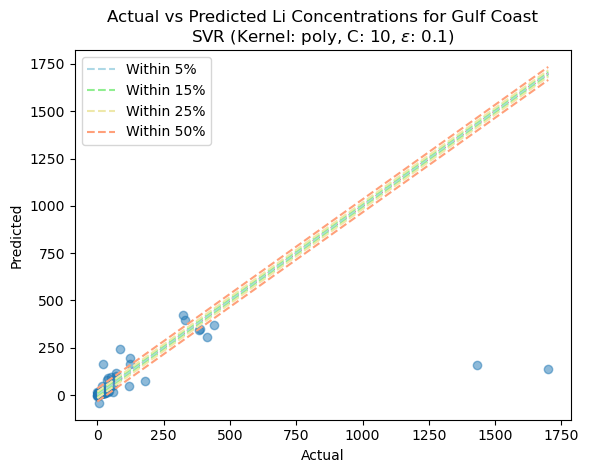

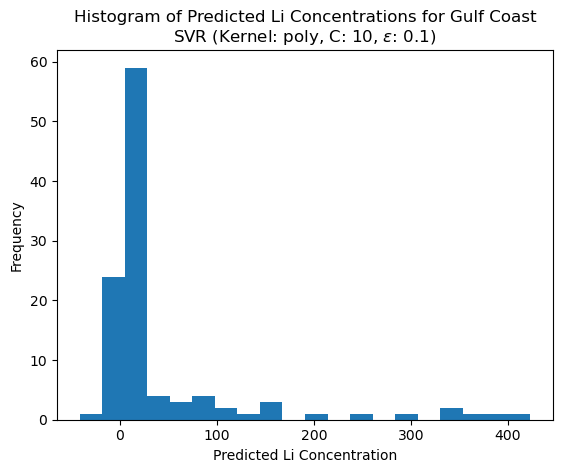

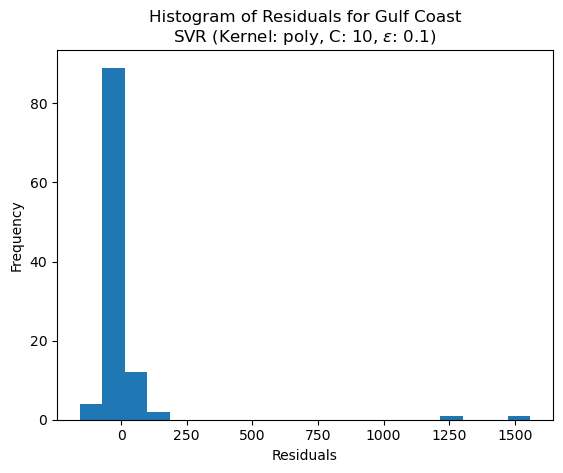

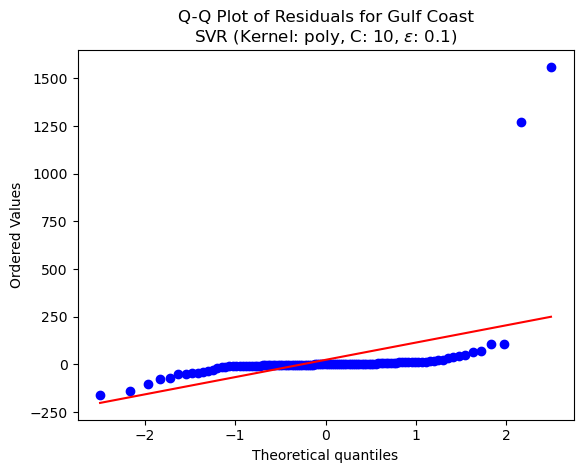

round       basin  data_row_count  feature_quantity  \
0  04_wi_nc_eo  Gulf Coast             435                15   

                                        feature_list        kernel_options  \
0  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...  [rbf, poly, sigmoid]   

  best_kernel             c_options  best_c    epsilon_options  ...  \
0        poly  [0.1, 0.5, 1, 5, 10]      10  [0.01, 0.05, 0.1]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             33.94              65.14              77.98              81.65   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.55                  3424.11                2.17   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                6.0               15.11        2976.24  

[1 rows x 26 columns]

In [171]:
# Define all the variables...
round = '04_wi_nc_eo'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10]
epsilon_values = [0.01, 0.05, 0.1]

# Run the function...
df_round04_wi_nc_eo = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round04_wi_nc_eo

#### ROUND 5

Gulf Coast
Number of data points:  435
Number of samples in the training dataset: 261
Best parameters: {'C': 200, 'epsilon': 0.5, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 33425.17781681859
MSE of the model: 25127.375213234594
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 158.5161670405722
MAE of the best SVR model: 33.79492837878529
-------------------------------
R-squared (Coefficient of Determination): 0.24825006613454026
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  41.37931034482759
±15%:  66.0919540229885
±25%:  71.83908045977012
±50%:  79.3103448275862
-------------------------------
Minimum percentage difference: 0.31%
Maximum percentage difference: 10501.68%
-------------------------------
Quantile r

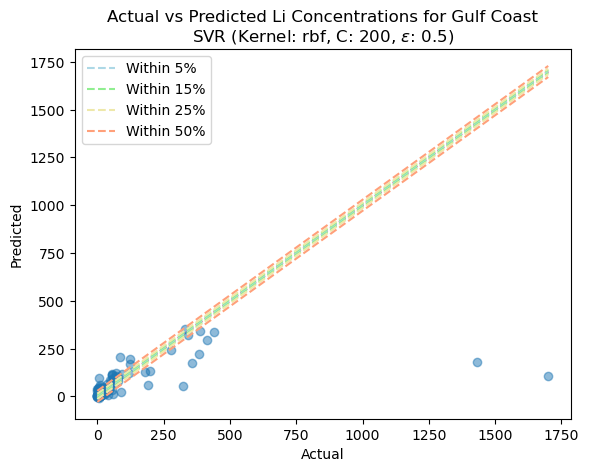

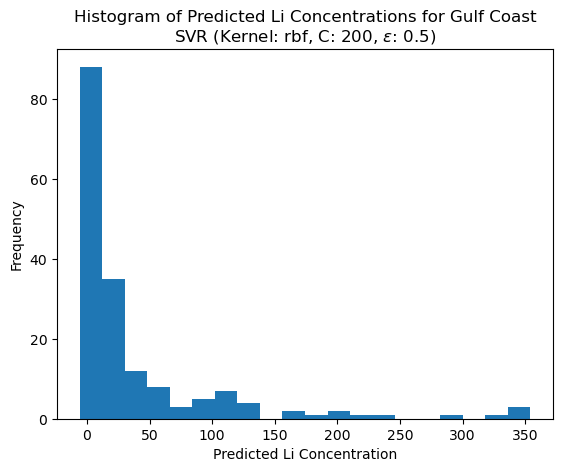

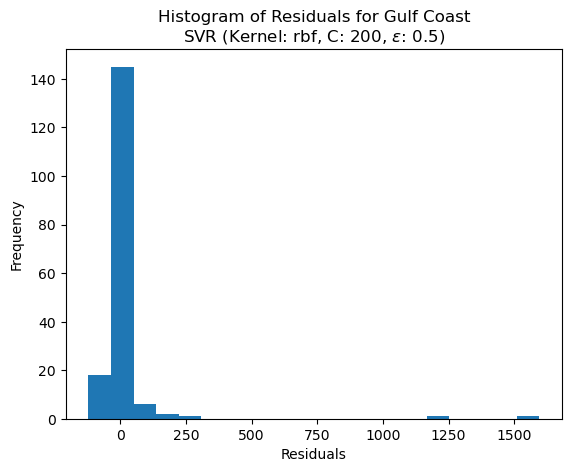

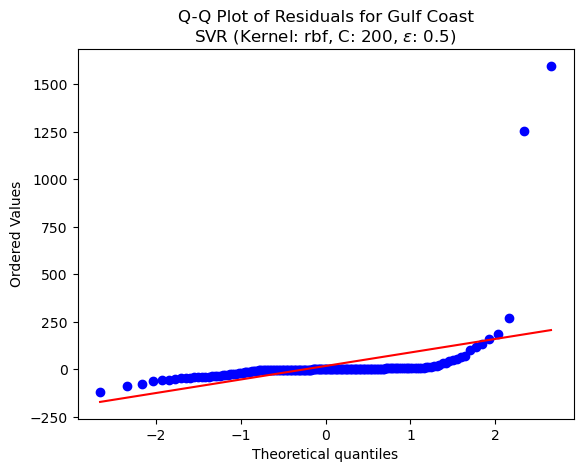

round       basin  data_row_count  feature_quantity  \
0  05_wi_nc_eo  Gulf Coast             435                15   

                                        feature_list        kernel_options  \
0  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0         rbf  [10, 50, 100, 150, 200]     200  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...             41.38              66.09              71.84   

   within_50_percent  results_min%_difference  results_max%_difference  \
0              79.31                     0.31                 10501.68   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                1.41               4.02                19.0        3178.37  

[1 rows x 26 columns]

In [172]:
# Define all the variables...
round = '05_wi_nc_eo'
test_size = 0.4
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round05_wi_nc_eo = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round05_wi_nc_eo

#### ROUND 6

Gulf Coast
Number of data points:  435
Number of samples in the training dataset: 326
Best parameters: {'C': 200, 'epsilon': 0.4, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 49772.978934522995
MSE of the model: 39118.00376008733
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 197.78271855773278
MAE of the best SVR model: 41.07350489156392
-------------------------------
R-squared (Coefficient of Determination): 0.21407147819005223
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  49.54128440366973
±15%:  74.31192660550458
±25%:  78.89908256880734
±50%:  87.1559633027523
-------------------------------
Minimum percentage difference: 0.50%
Maximum percentage difference: 11630.41%
-------------------------------
Quantile

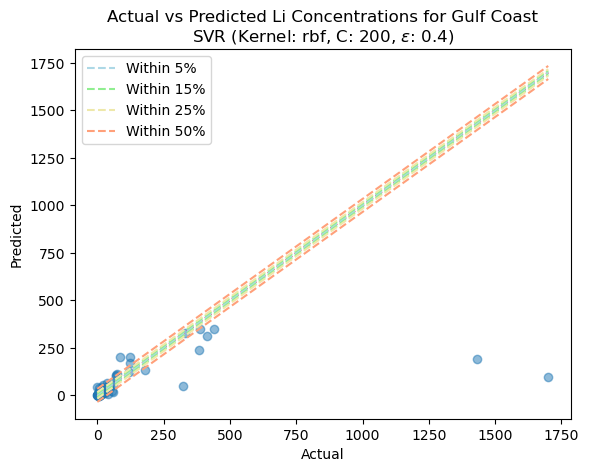

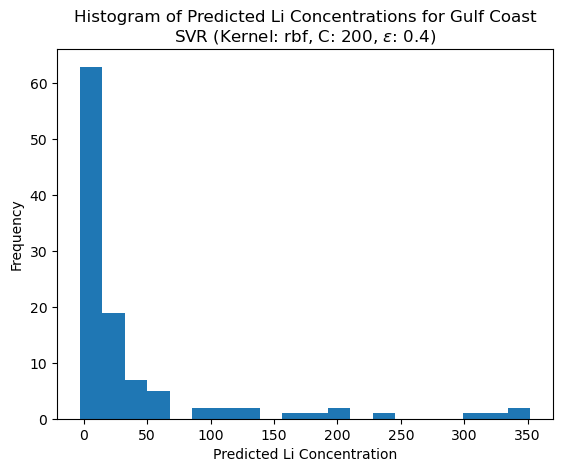

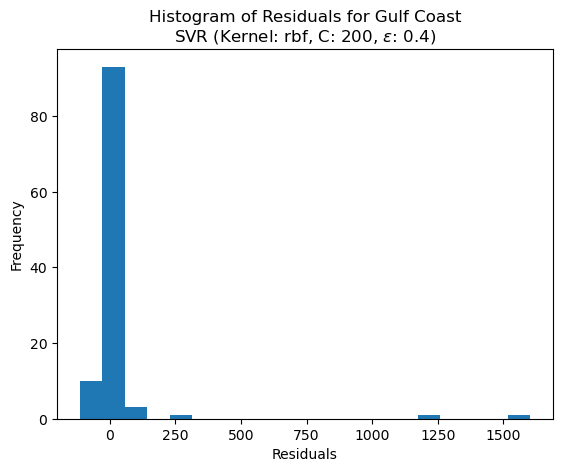

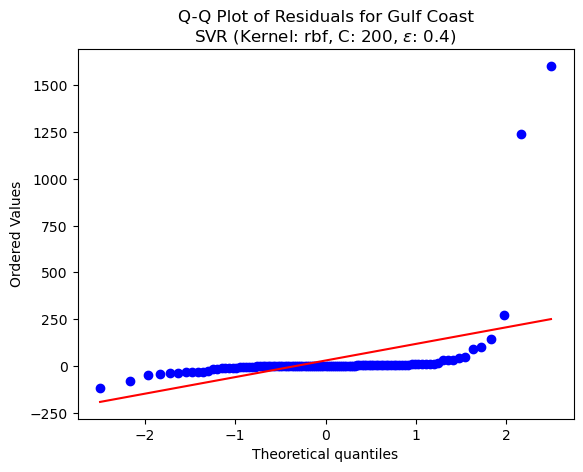

round       basin  data_row_count  feature_quantity  \
0  06_wi_nc_eo  Gulf Coast             435                15   

                                        feature_list        kernel_options  \
0  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c            epsilon_options  \
0         rbf  [10, 50, 100, 150, 200]     200  [0.1, 0.2, 0.3, 0.4, 0.5]   

   ...  within_5_percent  within_15_percent  within_25_percent  \
0  ...             49.54              74.31               78.9   

   within_50_percent  results_min%_difference  results_max%_difference  \
0              87.16                      0.5                 11630.41   

   0.25_quantile_loss  0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                1.19               3.74               10.37         2532.7  

[1 rows x 26 columns]

In [173]:
# Define all the variables...
round = '06_wi_nc_eo'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [10, 50, 100, 150, 200]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round06_wi_nc_eo = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round06_wi_nc_eo

#### ROUND 7

Gulf Coast
Number of data points:  435
Number of samples in the training dataset: 326
Best parameters: {'C': 50, 'epsilon': 0.5, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 49772.978934522995
MSE of the model: 38836.63734517846
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 197.07013306226406
MAE of the best SVR model: 41.49907703738476
-------------------------------
R-squared (Coefficient of Determination): 0.21972447346845436
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  52.293577981651374
±15%:  76.14678899082568
±25%:  78.89908256880734
±50%:  86.23853211009175
-------------------------------
Minimum percentage difference: 0.23%
Maximum percentage difference: 9608.74%
-------------------------------
Quantile

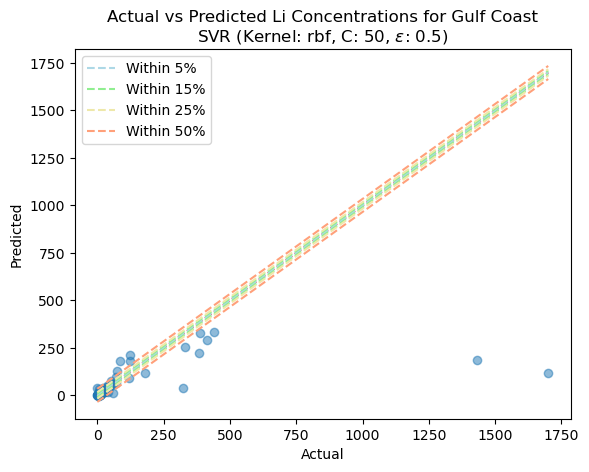

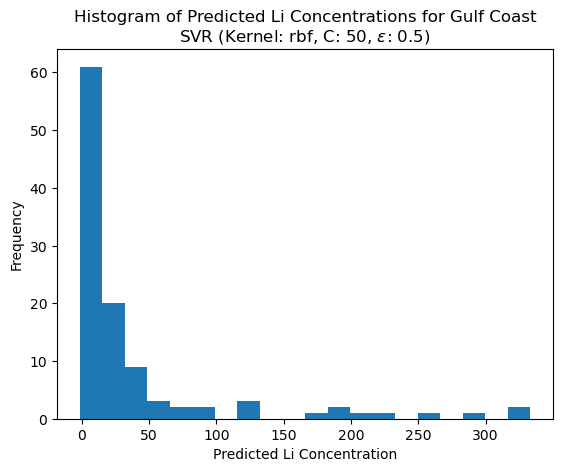

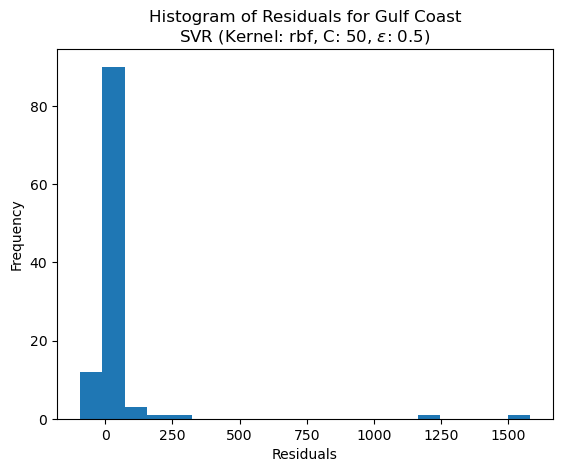

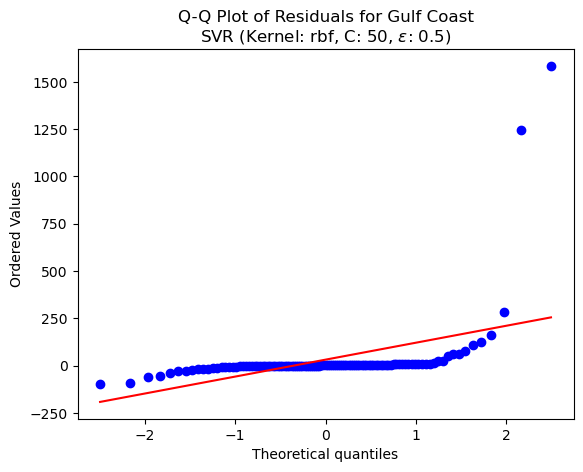

round       basin  data_row_count  feature_quantity  \
0  07_wi_nc_eo  Gulf Coast             435                15   

                                        feature_list kernel_options  \
0  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...    [rbf, poly]   

  best_kernel             c_options  best_c            epsilon_options  ...  \
0         rbf  [10, 20, 30, 40, 50]      50  [0.1, 0.2, 0.3, 0.4, 0.5]  ...   

   within_5_percent  within_15_percent  within_25_percent  within_50_percent  \
0             52.29              76.15               78.9              86.24   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.23                  9608.74                1.28   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               2.84                8.11        2817.62  

[1 rows x 26 columns]

In [174]:
# Define all the variables...
round = '07_wi_nc_eo'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly']
c_values = [10, 20, 30, 40, 50]
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Run the function...
df_round07_wi_nc_eo = generate_svr_models_by_basin(df=df, round=round, basins=basins, categorical_columns=categorical_columns, 
                                              test_size=test_size, random_state=random_state, kernel_values=kernel_values, 
                                              c_values=c_values, epsilon_values=epsilon_values)
df_round07_wi_nc_eo

## <ins>Evaluate results

### PCA

#### Merge all results dfs into 1 large df for evaluation

In [175]:
rounds = [df_round01_pca, df_round02_pca, df_round03_pca, df_round04_pca, df_round05_pca, df_round06_pca, df_round07_pca]

# Concatenate the list of DataFrames into one large DataFrame
df_results_pca = pd.concat(rounds)

# Resetting index to avoid duplicate indices
df_results_pca.reset_index(drop=True, inplace=True)

df_results_pca

round       basin  data_row_count  feature_quantity  \
0  01_pca  Gulf Coast             888                15   
1  02_pca  Gulf Coast             888                15   
2  03_pca  Gulf Coast             888                15   
3  04_pca  Gulf Coast             888                15   
4  05_pca  Gulf Coast             888                15   
5  06_pca  Gulf Coast             888                15   
6  07_pca  Gulf Coast             888                15   

                                        feature_list  \
0  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
1  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
2  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
3  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
4  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
5  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
6  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   

                 kernel_options best_kernel                      c_options  \
0           [linear, rbf, poly]        poly                   [0.1, 1, 10]   
1  [linear, rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50, 100]   
2          [rbf, poly, sigmoid]         rbf       [0.1, 0.5, 1, 5, 10, 50]   
3          [rbf, poly, sigmoid]        poly           [0.1, 0.5, 1, 5, 10]   
4          [rbf, poly, sigmoid]         rbf        [10, 50, 100, 150, 200]   
5          [rbf, poly, sigmoid]         rbf        [10, 50, 100, 150, 200]   
6                   [rbf, poly]         rbf           [10, 20, 30, 40, 50]   

   best_c              epsilon_options  ...  within_5_percent  \
0       1             [0.01, 0.1, 0.5]  ...             27.34   
1     100  [0.01, 0.05, 0.1, 0.2, 0.5]  ...             46.82   
2      50       [0.01, 0.05, 0.1, 0.2]  ...             50.45   
3       1            [0.01, 0.05, 0.1]  ...             29.73   
4     150    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             46.35   
5     200    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             51.35   
6      50    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             50.00   

   within_15_percent  within_25_percent  within_50_percent  \
0              61.80              67.42              78.28   
1              71.91              78.28              91.39   
2              72.07              78.83              91.44   
3              64.41              68.47              79.73   
4              71.07              77.81              90.73   
5              73.87              78.38              92.79   
6              71.62              78.83              91.44   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.30                   874.13                2.55   
1                     0.26                  1544.83                0.98   
2                     0.78                  1538.96                0.93   
3                     0.28                   840.68                2.36   
4                     0.36                  1336.97                1.04   
5                     0.01                  1567.18                0.94   
6                     0.43                  1582.19                0.96   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               4.61               21.59        5375.06  
1               2.95               10.39        4703.40  
2               2.67               10.61        4752.45  
3               4.31               21.38        5138.58  
4               3.00               11.10        5297.03  
5               2.47                9.38        4266.12  
6               2.71               10.40        4753.40  

[7 rows x 26 columns]

#### Create df with which model generated highest value within 15% for each basin

In [176]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_within_15_percent_pca = df_results_pca.groupby('basin')['within_15_percent'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_within_15_percent_pca = pd.merge(best_models_within_15_percent_pca, df_results_pca, on=['basin', 'within_15_percent'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_within_15_percent_pca.sort_values(by='within_15_percent',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_within_15_percent_pca.reset_index(drop=True, inplace=True)
df_best_models_within_15_percent_pca

basin  within_15_percent   round  data_row_count  feature_quantity  \
0  Gulf Coast              73.87  06_pca             888                15   

                                        feature_list        kernel_options  \
0  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c  ...    r2  within_5_percent  \
0         rbf  [10, 50, 100, 150, 200]     200  ...  0.32             51.35   

   within_25_percent  within_50_percent  results_min%_difference  \
0              78.38              92.79                     0.01   

   results_max%_difference  0.25_quantile_loss  0.5_quantile_loss  \
0                  1567.18                0.94               2.47   

   0.75_quantile_loss  cross_val_mse  
0                9.38        4266.12  

[1 rows x 26 columns]

#### Create df with which model generated highest value of r2 for each basin

In [177]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_r2_pca = df_results_pca.groupby('basin')['r2'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_r2_pca = pd.merge(best_models_r2_pca, df_results_pca, on=['basin', 'r2'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_r2_pca.sort_values(by='r2',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_r2_pca.reset_index(drop=True, inplace=True)
df_best_models_r2_pca

basin    r2   round  data_row_count  feature_quantity  \
0  Gulf Coast  0.45  05_pca             888                15   

                                        feature_list        kernel_options  \
0  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c  ... within_5_percent  \
0         rbf  [10, 50, 100, 150, 200]     150  ...            46.35   

   within_15_percent  within_25_percent  within_50_percent  \
0              71.07              77.81              90.73   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.36                  1336.97                1.04   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0                3.0                11.1        5297.03  

[1 rows x 26 columns]

### WI_WC

#### Merge all results dfs into 1 large df for evaluation

In [178]:
rounds = [df_round01_wi_wc, df_round02_wi_wc, df_round03_wi_wc, df_round04_wi_wc, df_round05_wi_wc, df_round06_wi_wc, df_round07_wi_wc]

# Concatenate the list of DataFrames into one large DataFrame
df_results_wi_wc = pd.concat(rounds)

# Resetting index to avoid duplicate indices
df_results_wi_wc.reset_index(drop=True, inplace=True)

df_results_wi_wc

round       basin  data_row_count  feature_quantity  \
0  01_wi_wc  Gulf Coast             222               343   
1  02_wi_wc  Gulf Coast             222               343   
2  03_wi_wc  Gulf Coast             222               343   
3  04_wi_wc  Gulf Coast             222               343   
4  05_wi_wc  Gulf Coast             222               343   
5  06_wi_wc  Gulf Coast             222               343   
6  07_wi_wc  Gulf Coast             222               343   

                                        feature_list  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
1  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
2  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
3  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
4  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
5  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
6  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   

                 kernel_options best_kernel                      c_options  \
0           [linear, rbf, poly]      linear                   [0.1, 1, 10]   
1  [linear, rbf, poly, sigmoid]      linear  [0.1, 0.5, 1, 5, 10, 50, 100]   
2          [rbf, poly, sigmoid]     sigmoid       [0.1, 0.5, 1, 5, 10, 50]   
3          [rbf, poly, sigmoid]     sigmoid           [0.1, 0.5, 1, 5, 10]   
4          [rbf, poly, sigmoid]     sigmoid        [10, 50, 100, 150, 200]   
5          [rbf, poly, sigmoid]     sigmoid        [10, 50, 100, 150, 200]   
6                   [rbf, poly]         rbf           [10, 20, 30, 40, 50]   

   best_c              epsilon_options  ...  within_5_percent  \
0      10             [0.01, 0.1, 0.5]  ...             25.37   
1       5  [0.01, 0.05, 0.1, 0.2, 0.5]  ...             25.37   
2      50       [0.01, 0.05, 0.1, 0.2]  ...             42.86   
3      10            [0.01, 0.05, 0.1]  ...             42.86   
4     200    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             28.09   
5     200    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             46.43   
6      50    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             17.86   

   within_15_percent  within_25_percent  within_50_percent  \
0              52.24              67.16              77.61   
1              55.22              64.18              79.10   
2              71.43              73.21              78.57   
3              69.64              73.21              76.79   
4              58.43              65.17              77.53   
5              64.29              69.64              76.79   
6              51.79              67.86              76.79   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     2.54                 14356.48                5.42   
1                     1.01                 13810.73                5.34   
2                     2.06                  1416.37                2.85   
3                     1.76                  1451.33                2.87   
4                     0.33                 11596.72                3.61   
5                     0.82                  1064.89                3.13   
6                     1.82                  2577.10                8.06   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0              15.00               39.61       14735.00  
1              13.60               45.78       14813.12  
2               7.12               32.40       18817.24  
3               8.86               31.02       21859.47  
4              11.54               31.35       18068.38  
5               9.41               55.23       15297.35  
6              16.50               52.65       20275.70  

[7 rows x 26 columns]

#### Create df with which model generated highest value within 15% for each basin

In [179]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_within_15_percent_wi_wc = df_results_wi_wc.groupby('basin')['within_15_percent'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_within_15_percent_wi_wc = pd.merge(best_models_within_15_percent_wi_wc, df_results_wi_wc, on=['basin', 'within_15_percent'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_within_15_percent_wi_wc.sort_values(by='within_15_percent',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_within_15_percent_wi_wc.reset_index(drop=True, inplace=True)
df_best_models_within_15_percent_wi_wc

basin  within_15_percent     round  data_row_count  feature_quantity  \
0  Gulf Coast              71.43  03_wi_wc             222               343   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                 c_options  best_c  ...    r2  within_5_percent  \
0     sigmoid  [0.1, 0.5, 1, 5, 10, 50]      50  ...  0.12             42.86   

   within_25_percent  within_50_percent  results_min%_difference  \
0              73.21              78.57                     2.06   

   results_max%_difference  0.25_quantile_loss  0.5_quantile_loss  \
0                  1416.37                2.85               7.12   

   0.75_quantile_loss  cross_val_mse  
0                32.4       18817.24  

[1 rows x 26 columns]

#### Create df with which model generated highest value of r2 for each basin

In [180]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_r2_wi_wc = df_results_wi_wc.groupby('basin')['r2'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_r2_wi_wc = pd.merge(best_models_r2_wi_wc, df_results_wi_wc, on=['basin', 'r2'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_r2_wi_wc.sort_values(by='r2',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_r2_wi_wc.reset_index(drop=True, inplace=True)
df_best_models_r2_wi_wc

basin    r2     round  data_row_count  feature_quantity  \
0  Gulf Coast  0.37  01_wi_wc             222               343   

                                        feature_list       kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [linear, rbf, poly]   

  best_kernel     c_options  best_c  ... within_5_percent  within_15_percent  \
0      linear  [0.1, 1, 10]      10  ...            25.37              52.24   

   within_25_percent  within_50_percent  results_min%_difference  \
0              67.16              77.61                     2.54   

   results_max%_difference  0.25_quantile_loss  0.5_quantile_loss  \
0                 14356.48                5.42               15.0   

   0.75_quantile_loss  cross_val_mse  
0               39.61        14735.0  

[1 rows x 26 columns]

### WI_NC

#### Merge all results dfs into 1 large df for evaluation

In [181]:
rounds = [df_round01_wi_nc, df_round02_wi_nc, df_round03_wi_nc, df_round04_wi_nc, df_round05_wi_nc, df_round06_wi_nc, df_round07_wi_nc]

# Concatenate the list of DataFrames into one large DataFrame
df_results_wi_nc = pd.concat(rounds)

# Resetting index to avoid duplicate indices
df_results_wi_nc.reset_index(drop=True, inplace=True)

df_results_wi_nc

round       basin  data_row_count  feature_quantity  \
0  01_wi_nc  Gulf Coast             326                20   
1  02_wi_nc  Gulf Coast             326                20   
2  03_wi_nc  Gulf Coast             326                20   
3  04_wi_nc  Gulf Coast             326                20   
4  05_wi_nc  Gulf Coast             326                20   
5  06_wi_nc  Gulf Coast             326                20   
6  07_wi_nc  Gulf Coast             326                20   

                                        feature_list  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
1  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
2  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
3  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
4  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
5  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
6  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   

                 kernel_options best_kernel                      c_options  \
0           [linear, rbf, poly]      linear                   [0.1, 1, 10]   
1  [linear, rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50, 100]   
2          [rbf, poly, sigmoid]         rbf       [0.1, 0.5, 1, 5, 10, 50]   
3          [rbf, poly, sigmoid]        poly           [0.1, 0.5, 1, 5, 10]   
4          [rbf, poly, sigmoid]         rbf        [10, 50, 100, 150, 200]   
5          [rbf, poly, sigmoid]         rbf        [10, 50, 100, 150, 200]   
6                   [rbf, poly]         rbf           [10, 20, 30, 40, 50]   

   best_c              epsilon_options  ...  within_5_percent  \
0      10             [0.01, 0.1, 0.5]  ...             13.27   
1     100  [0.01, 0.05, 0.1, 0.2, 0.5]  ...             34.69   
2      50       [0.01, 0.05, 0.1, 0.2]  ...             34.15   
3      10            [0.01, 0.05, 0.1]  ...             25.61   
4     200    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             38.93   
5     100    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             37.80   
6      50    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             35.37   

   within_15_percent  within_25_percent  within_50_percent  \
0              44.90              56.12              74.49   
1              61.22              74.49              82.65   
2              63.41              76.83              85.37   
3              62.20              68.29              75.61   
4              62.60              74.05              84.73   
5              64.63              76.83              85.37   
6              63.41              76.83              85.37   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.50                  2042.97                4.19   
1                     0.46                   976.52                1.61   
2                     0.75                   890.57                1.20   
3                     1.10                  2090.86                2.47   
4                     0.27                  1606.71                1.33   
5                     0.31                  1011.91                1.37   
6                     0.43                   917.34                1.07   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               8.56               28.11       19580.48  
1               5.01               13.70       20189.56  
2               4.88               11.47       19642.80  
3               4.86               22.13       20632.83  
4               4.95               17.30       13390.01  
5               4.97               11.19       18884.50  
6               5.11               11.35       19631.38  

[7 rows x 26 columns]

#### Create df with which model generated highest value within 15% for each basin

In [182]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_within_15_percent_wi_nc = df_results_wi_nc.groupby('basin')['within_15_percent'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_within_15_percent_wi_nc = pd.merge(best_models_within_15_percent_wi_nc, df_results_wi_nc, on=['basin', 'within_15_percent'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_within_15_percent_wi_nc.sort_values(by='within_15_percent',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_within_15_percent_wi_nc.reset_index(drop=True, inplace=True)
df_best_models_within_15_percent_wi_nc

basin  within_15_percent     round  data_row_count  feature_quantity  \
0  Gulf Coast              64.63  06_wi_nc             326                20   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c  ...    r2  within_5_percent  \
0         rbf  [10, 50, 100, 150, 200]     100  ...  0.91              37.8   

   within_25_percent  within_50_percent  results_min%_difference  \
0              76.83              85.37                     0.31   

   results_max%_difference  0.25_quantile_loss  0.5_quantile_loss  \
0                  1011.91                1.37               4.97   

   0.75_quantile_loss  cross_val_mse  
0               11.19        18884.5  

[1 rows x 26 columns]

#### Create df with which model generated highest value of r2 for each basin

In [183]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_r2_wi_nc = df_results_wi_nc.groupby('basin')['r2'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_r2_wi_nc = pd.merge(best_models_r2_wi_nc, df_results_wi_nc, on=['basin', 'r2'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_r2_wi_nc.sort_values(by='r2',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_r2_wi_nc.reset_index(drop=True, inplace=True)
df_best_models_r2_wi_nc

basin    r2     round  data_row_count  feature_quantity  \
0  Gulf Coast  0.91  06_wi_nc             326                20   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c  ... within_5_percent  \
0         rbf  [10, 50, 100, 150, 200]     100  ...             37.8   

   within_15_percent  within_25_percent  within_50_percent  \
0              64.63              76.83              85.37   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.31                  1011.91                1.37   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               4.97               11.19        18884.5  

[1 rows x 26 columns]

### WI_NC_EO

#### Merge all results dfs into 1 large df for evaluation

In [184]:
rounds = [df_round01_wi_nc_eo, df_round02_wi_nc_eo, df_round03_wi_nc_eo, df_round04_wi_nc_eo, df_round05_wi_nc_eo, df_round06_wi_nc_eo, df_round07_wi_nc_eo]

# Concatenate the list of DataFrames into one large DataFrame
df_results_wi_nc_eo = pd.concat(rounds)

# Resetting index to avoid duplicate indices
df_results_wi_nc_eo.reset_index(drop=True, inplace=True)

df_results_wi_nc_eo

round       basin  data_row_count  feature_quantity  \
0  01_wi_nc_eo  Gulf Coast             435                15   
1  02_wi_nc_eo  Gulf Coast             435                15   
2  03_wi_nc_eo  Gulf Coast             435                15   
3  04_wi_nc_eo  Gulf Coast             435                15   
4  05_wi_nc_eo  Gulf Coast             435                15   
5  06_wi_nc_eo  Gulf Coast             435                15   
6  07_wi_nc_eo  Gulf Coast             435                15   

                                        feature_list  \
0  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
1  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
2  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
3  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
4  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
5  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
6  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   

                 kernel_options best_kernel                      c_options  \
0           [linear, rbf, poly]        poly                   [0.1, 1, 10]   
1  [linear, rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50, 100]   
2          [rbf, poly, sigmoid]         rbf       [0.1, 0.5, 1, 5, 10, 50]   
3          [rbf, poly, sigmoid]        poly           [0.1, 0.5, 1, 5, 10]   
4          [rbf, poly, sigmoid]         rbf        [10, 50, 100, 150, 200]   
5          [rbf, poly, sigmoid]         rbf        [10, 50, 100, 150, 200]   
6                   [rbf, poly]         rbf           [10, 20, 30, 40, 50]   

   best_c              epsilon_options  ...  within_5_percent  \
0      10             [0.01, 0.1, 0.5]  ...             31.30   
1     100  [0.01, 0.05, 0.1, 0.2, 0.5]  ...             50.38   
2      50       [0.01, 0.05, 0.1, 0.2]  ...             51.38   
3      10            [0.01, 0.05, 0.1]  ...             33.94   
4     200    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             41.38   
5     200    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             49.54   
6      50    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             52.29   

   within_15_percent  within_25_percent  within_50_percent  \
0              61.83              77.10              82.44   
1              74.81              81.68              85.50   
2              76.15              78.90              86.24   
3              65.14              77.98              81.65   
4              66.09              71.84              79.31   
5              74.31              78.90              87.16   
6              76.15              78.90              86.24   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.27                  3582.54                2.27   
1                     0.16                 10836.67                1.05   
2                     0.15                  9676.76                1.23   
3                     0.55                  3424.11                2.17   
4                     0.31                 10501.68                1.41   
5                     0.50                 11630.41                1.19   
6                     0.23                  9608.74                1.28   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               6.52               14.76        3028.03  
1               3.08                9.37        2790.34  
2               3.15                7.91        2819.00  
3               6.00               15.11        2976.24  
4               4.02               19.00        3178.37  
5               3.74               10.37        2532.70  
6               2.84                8.11        2817.62  

[7 rows x 26 columns]

#### Create df with which model generated highest value within 15% for each basin

In [185]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_within_15_percent_wi_nc_eo = df_results_wi_nc_eo.groupby('basin')['within_15_percent'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_within_15_percent_wi_nc_eo = pd.merge(best_models_within_15_percent_wi_nc_eo, df_results_wi_nc_eo, on=['basin', 'within_15_percent'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_within_15_percent_wi_nc_eo.sort_values(by='within_15_percent',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_within_15_percent_wi_nc_eo.reset_index(drop=True, inplace=True)
df_best_models_within_15_percent_wi_nc_eo

basin  within_15_percent        round  data_row_count  \
0  Gulf Coast              76.15  03_wi_nc_eo             435   
1  Gulf Coast              76.15  07_wi_nc_eo             435   

   feature_quantity                                       feature_list  \
0                15  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
1                15  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   

         kernel_options best_kernel                 c_options  best_c  ...  \
0  [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
1           [rbf, poly]         rbf      [10, 20, 30, 40, 50]      50  ...   

     r2  within_5_percent  within_25_percent  within_50_percent  \
0  0.22             51.38               78.9              86.24   
1  0.22             52.29               78.9              86.24   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.15                  9676.76                1.23   
1                     0.23                  9608.74                1.28   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               3.15                7.91        2819.00  
1               2.84                8.11        2817.62  

[2 rows x 26 columns]

#### Create df with which model generated highest value of r2 for each basin

In [186]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_r2_wi_nc_eo = df_results_wi_nc_eo.groupby('basin')['r2'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_r2_wi_nc_eo = pd.merge(best_models_r2_wi_nc_eo, df_results_wi_nc_eo, on=['basin', 'r2'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_r2_wi_nc_eo.sort_values(by='r2',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_r2_wi_nc_eo.reset_index(drop=True, inplace=True)
df_best_models_r2_wi_nc_eo

basin    r2        round  data_row_count  feature_quantity  \
0  Gulf Coast  0.25  05_wi_nc_eo             435                15   

                                        feature_list        kernel_options  \
0  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c  ... within_5_percent  \
0         rbf  [10, 50, 100, 150, 200]     200  ...            41.38   

   within_15_percent  within_25_percent  within_50_percent  \
0              66.09              71.84              79.31   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.31                 10501.68                1.41   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               4.02                19.0        3178.37  

[1 rows x 26 columns]

### NI_WC

#### Merge all results dfs into 1 large df for evaluation

In [187]:
rounds = [df_round01_ni_wc, df_round02_ni_wc, df_round03_ni_wc, df_round04_ni_wc, df_round05_ni_wc, df_round06_ni_wc, df_round07_ni_wc]

# Concatenate the list of DataFrames into one large DataFrame
df_results_ni_wc = pd.concat(rounds)

# Resetting index to avoid duplicate indices
df_results_ni_wc.reset_index(drop=True, inplace=True)

df_results_ni_wc

round       basin  data_row_count  feature_quantity  \
0  01_ni_wc  Gulf Coast              55               103   
1  02_ni_wc  Gulf Coast              55               103   
2  03_ni_wc  Gulf Coast              55               103   
3  04_ni_wc  Gulf Coast              55               103   
4  05_ni_wc  Gulf Coast              55               103   
5  06_ni_wc  Gulf Coast              55               103   
6  07_ni_wc  Gulf Coast              55               103   

                                        feature_list  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
1  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
2  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
3  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
4  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
5  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
6  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   

                 kernel_options best_kernel                      c_options  \
0           [linear, rbf, poly]      linear                   [0.1, 1, 10]   
1  [linear, rbf, poly, sigmoid]      linear  [0.1, 0.5, 1, 5, 10, 50, 100]   
2          [rbf, poly, sigmoid]     sigmoid       [0.1, 0.5, 1, 5, 10, 50]   
3          [rbf, poly, sigmoid]     sigmoid           [0.1, 0.5, 1, 5, 10]   
4          [rbf, poly, sigmoid]     sigmoid        [10, 50, 100, 150, 200]   
5          [rbf, poly, sigmoid]     sigmoid        [10, 50, 100, 150, 200]   
6                   [rbf, poly]         rbf           [10, 20, 30, 40, 50]   

   best_c              epsilon_options  ...  within_5_percent  \
0      10             [0.01, 0.1, 0.5]  ...             23.53   
1       5  [0.01, 0.05, 0.1, 0.2, 0.5]  ...             23.53   
2      50       [0.01, 0.05, 0.1, 0.2]  ...             28.57   
3      10            [0.01, 0.05, 0.1]  ...             35.71   
4     200    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             13.64   
5     200    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             28.57   
6      50    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             28.57   

   within_15_percent  within_25_percent  within_50_percent  \
0              47.06              52.94              82.35   
1              47.06              52.94              82.35   
2              35.71              50.00              71.43   
3              50.00              57.14              57.14   
4              45.45              54.55              86.36   
5              50.00              50.00              92.86   
6              35.71              42.86              64.29   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     8.56                   497.99               20.76   
1                     8.56                   497.99               20.76   
2                    12.43                   332.49               15.61   
3                     5.54                   118.93                4.82   
4                     9.83                   342.31               14.93   
5                     3.55                   295.93               11.40   
6                    15.79                   355.39               10.45   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0              38.63              118.00        5616.74  
1              38.63              118.00        5616.74  
2              81.77              138.82       11934.85  
3              38.71              280.65       25127.92  
4              41.06              109.63        8789.91  
5              50.27              119.18        6989.62  
6              84.41              149.07       16433.40  

[7 rows x 26 columns]

#### Create df with which model generated highest value within 15% for each basin

In [188]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_within_15_percent_ni_wc = df_results_ni_wc.groupby('basin')['within_15_percent'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_within_15_percent_ni_wc = pd.merge(best_models_within_15_percent_ni_wc, df_results_ni_wc, on=['basin', 'within_15_percent'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_within_15_percent_ni_wc.sort_values(by='within_15_percent',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_within_15_percent_ni_wc.reset_index(drop=True, inplace=True)
df_best_models_within_15_percent_ni_wc

basin  within_15_percent     round  data_row_count  feature_quantity  \
0  Gulf Coast               50.0  04_ni_wc              55               103   
1  Gulf Coast               50.0  06_ni_wc              55               103   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   
1  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c  ...    r2  within_5_percent  \
0     sigmoid     [0.1, 0.5, 1, 5, 10]      10  ... -0.15             35.71   
1     sigmoid  [10, 50, 100, 150, 200]     200  ...  0.19             28.57   

   within_25_percent  within_50_percent  results_min%_difference  \
0              57.14              57.14                     5.54   
1              50.00              92.86                     3.55   

   results_max%_difference  0.25_quantile_loss  0.5_quantile_loss  \
0                   118.93                4.82              38.71   
1                   295.93               11.40              50.27   

   0.75_quantile_loss  cross_val_mse  
0              280.65       25127.92  
1              119.18        6989.62  

[2 rows x 26 columns]

#### Create df with which model generated highest value of r2 for each basin

In [189]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_r2_ni_wc = df_results_ni_wc.groupby('basin')['r2'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_r2_ni_wc = pd.merge(best_models_r2_ni_wc, df_results_ni_wc, on=['basin', 'r2'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_r2_ni_wc.sort_values(by='r2',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_r2_ni_wc.reset_index(drop=True, inplace=True)
df_best_models_r2_ni_wc

basin    r2     round  data_row_count  feature_quantity  \
0  Gulf Coast  0.23  05_ni_wc              55               103   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c  ... within_5_percent  \
0     sigmoid  [10, 50, 100, 150, 200]     200  ...            13.64   

   within_15_percent  within_25_percent  within_50_percent  \
0              45.45              54.55              86.36   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     9.83                   342.31               14.93   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0              41.06              109.63        8789.91  

[1 rows x 26 columns]

### NI_NC

#### Merge all results dfs into 1 large df for evaluation

In [190]:
rounds = [df_round01_ni_nc, df_round02_ni_nc, df_round03_ni_nc, df_round04_ni_nc, df_round05_ni_nc, df_round06_ni_nc, df_round07_ni_nc]

# Concatenate the list of DataFrames into one large DataFrame
df_results_ni_nc = pd.concat(rounds)

# Resetting index to avoid duplicate indices
df_results_ni_nc.reset_index(drop=True, inplace=True)

df_results_ni_nc

round       basin  data_row_count  feature_quantity  \
0  01_ni_nc  Gulf Coast              78                20   
1  02_ni_nc  Gulf Coast              78                20   
2  03_ni_nc  Gulf Coast              78                20   
3  04_ni_nc  Gulf Coast              78                20   
4  05_ni_nc  Gulf Coast              78                20   
5  06_ni_nc  Gulf Coast              78                20   
6  07_ni_nc  Gulf Coast              78                20   

                                        feature_list  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
1  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
2  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
3  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
4  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
5  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
6  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   

                 kernel_options best_kernel                      c_options  \
0           [linear, rbf, poly]      linear                   [0.1, 1, 10]   
1  [linear, rbf, poly, sigmoid]     sigmoid  [0.1, 0.5, 1, 5, 10, 50, 100]   
2          [rbf, poly, sigmoid]     sigmoid       [0.1, 0.5, 1, 5, 10, 50]   
3          [rbf, poly, sigmoid]     sigmoid           [0.1, 0.5, 1, 5, 10]   
4          [rbf, poly, sigmoid]     sigmoid        [10, 50, 100, 150, 200]   
5          [rbf, poly, sigmoid]     sigmoid        [10, 50, 100, 150, 200]   
6                   [rbf, poly]         rbf           [10, 20, 30, 40, 50]   

   best_c              epsilon_options  ...  within_5_percent  \
0       1             [0.01, 0.1, 0.5]  ...             45.83   
1      50  [0.01, 0.05, 0.1, 0.2, 0.5]  ...             37.50   
2      50       [0.01, 0.05, 0.1, 0.2]  ...              5.00   
3      10            [0.01, 0.05, 0.1]  ...             40.00   
4      50    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             28.12   
5      50    [0.1, 0.2, 0.3, 0.4, 0.5]  ...              5.00   
6      50    [0.1, 0.2, 0.3, 0.4, 0.5]  ...             15.00   

   within_15_percent  within_25_percent  within_50_percent  \
0              54.17              54.17              66.67   
1              45.83              58.33              75.00   
2              35.00              55.00              70.00   
3              60.00              60.00              65.00   
4              46.88              56.25              65.62   
5              35.00              55.00              70.00   
6              65.00              70.00              80.00   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     4.09                   418.89                1.06   
1                     0.37                   843.30                2.68   
2                     1.65                   997.21                5.11   
3                     1.68                   263.45                1.47   
4                     0.81                   686.17                4.94   
5                     1.65                   997.21                5.11   
6                     2.19                   324.78                4.68   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               9.54               85.16       38535.58  
1              18.88               59.11       32489.43  
2              20.22               67.97       33211.62  
3               4.95               65.61       46748.34  
4              19.29              105.33       41965.21  
5              20.22               67.97       33211.62  
6               6.55               28.27       37162.79  

[7 rows x 26 columns]

#### Create df with which model generated highest value within 15% for each basin

In [191]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_within_15_percent_ni_nc = df_results_ni_nc.groupby('basin')['within_15_percent'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_within_15_percent_ni_nc = pd.merge(best_models_within_15_percent_ni_nc, df_results_ni_nc, on=['basin', 'within_15_percent'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_within_15_percent_ni_nc.sort_values(by='within_15_percent',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_within_15_percent_ni_nc.reset_index(drop=True, inplace=True)
df_best_models_within_15_percent_ni_nc

basin  within_15_percent     round  data_row_count  feature_quantity  \
0  Gulf Coast               65.0  07_ni_nc              78                20   

                                        feature_list kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...    [rbf, poly]   

  best_kernel             c_options  best_c  ...    r2  within_5_percent  \
0         rbf  [10, 20, 30, 40, 50]      50  ...  0.88              15.0   

   within_25_percent  within_50_percent  results_min%_difference  \
0               70.0               80.0                     2.19   

   results_max%_difference  0.25_quantile_loss  0.5_quantile_loss  \
0                   324.78                4.68               6.55   

   0.75_quantile_loss  cross_val_mse  
0               28.27       37162.79  

[1 rows x 26 columns]

#### Create df with which model generated highest value of r2 for each basin

In [192]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_r2_ni_nc = df_results_ni_nc.groupby('basin')['r2'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_r2_ni_nc = pd.merge(best_models_r2_ni_nc, df_results_ni_nc, on=['basin', 'r2'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_r2_ni_nc.sort_values(by='r2',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_r2_ni_nc.reset_index(drop=True, inplace=True)
df_best_models_r2_ni_nc

basin    r2     round  data_row_count  feature_quantity  \
0  Gulf Coast  0.88  07_ni_nc              78                20   

                                        feature_list kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...    [rbf, poly]   

  best_kernel             c_options  best_c  ... within_5_percent  \
0         rbf  [10, 20, 30, 40, 50]      50  ...             15.0   

   within_15_percent  within_25_percent  within_50_percent  \
0               65.0               70.0               80.0   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     2.19                   324.78                4.68   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               6.55               28.27       37162.79  

[1 rows x 26 columns]

### ALL Results Combined

#### Merge all results dfs into 1 large df for evaluation

In [197]:
all_results = [df_results_pca, df_results_wi_wc, df_results_wi_nc, df_results_wi_nc_eo, df_results_ni_nc] #df_results_ni_wc,

# Concatenate the list of DataFrames into one large DataFrame
df_all_results = pd.concat(all_results)

# Resetting index to avoid duplicate indices
df_all_results.reset_index(drop=True, inplace=True)

# Save as csv sorted from highest to lowest r2
df_all_results.sort_values(by='r2',ascending=False).reset_index(drop=True).to_csv('df_model_results_csv_files/svr_all_results.csv', index=False)

df_all_results

round       basin  data_row_count  feature_quantity  \
0        01_pca  Gulf Coast             888                15   
1        02_pca  Gulf Coast             888                15   
2        03_pca  Gulf Coast             888                15   
3        04_pca  Gulf Coast             888                15   
4        05_pca  Gulf Coast             888                15   
5        06_pca  Gulf Coast             888                15   
6        07_pca  Gulf Coast             888                15   
7      01_wi_wc  Gulf Coast             222               343   
8      02_wi_wc  Gulf Coast             222               343   
9      03_wi_wc  Gulf Coast             222               343   
10     04_wi_wc  Gulf Coast             222               343   
11     05_wi_wc  Gulf Coast             222               343   
12     06_wi_wc  Gulf Coast             222               343   
13     07_wi_wc  Gulf Coast             222               343   
14     01_wi_nc  Gulf Coast             326                20   
15     02_wi_nc  Gulf Coast             326                20   
16     03_wi_nc  Gulf Coast             326                20   
17     04_wi_nc  Gulf Coast             326                20   
18     05_wi_nc  Gulf Coast             326                20   
19     06_wi_nc  Gulf Coast             326                20   
20     07_wi_nc  Gulf Coast             326                20   
21  01_wi_nc_eo  Gulf Coast             435                15   
22  02_wi_nc_eo  Gulf Coast             435                15   
23  03_wi_nc_eo  Gulf Coast             435                15   
24  04_wi_nc_eo  Gulf Coast             435                15   
25  05_wi_nc_eo  Gulf Coast             435                15   
26  06_wi_nc_eo  Gulf Coast             435                15   
27  07_wi_nc_eo  Gulf Coast             435                15   
28     01_ni_nc  Gulf Coast              78                20   
29     02_ni_nc  Gulf Coast              78                20   
30     03_ni_nc  Gulf Coast              78                20   
31     04_ni_nc  Gulf Coast              78                20   
32     05_ni_nc  Gulf Coast              78                20   
33     06_ni_nc  Gulf Coast              78                20   
34     07_ni_nc  Gulf Coast              78                20   

                                         feature_list  \
0   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
1   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
2   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
3   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
4   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
5   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
6   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
7   [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
8   [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
9   [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
10  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
11  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
12  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
13  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
14  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
15  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
16  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
17  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
18  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
19  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
20  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...   
21  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
22  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
23  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
24  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
25  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
26  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
27  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
28  [TDS, LATITU

#### Create df with which model generated highest value within 15% for each basin

In [198]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_within_15_percent = df_all_results.groupby('basin')['within_15_percent'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
best_models_within_15_percent = pd.merge(best_models_within_15_percent, df_all_results, on=['basin', 'within_15_percent'], how='inner')

# Sort the DataFrame by 'basin' for clarity
best_models_within_15_percent.sort_values(by='within_15_percent',ascending=False, inplace=True)

# Resetting index for clarity
best_models_within_15_percent.reset_index(drop=True, inplace=True)
best_models_within_15_percent

basin  within_15_percent        round  data_row_count  \
0  Gulf Coast              76.15  03_wi_nc_eo             435   
1  Gulf Coast              76.15  07_wi_nc_eo             435   

   feature_quantity                                       feature_list  \
0                15  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   
1                15  [TDS, PH, B, Ba, Br, HCO3, Ca, Cl, FeTot, K, M...   

         kernel_options best_kernel                 c_options  best_c  ...  \
0  [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
1           [rbf, poly]         rbf      [10, 20, 30, 40, 50]      50  ...   

     r2  within_5_percent  within_25_percent  within_50_percent  \
0  0.22             51.38               78.9              86.24   
1  0.22             52.29               78.9              86.24   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.15                  9676.76                1.23   
1                     0.23                  9608.74                1.28   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               3.15                7.91        2819.00  
1               2.84                8.11        2817.62  

[2 rows x 26 columns]

#### Create df with which model generated highest value of r2 for each basin

In [199]:
# Grouping by 'basin' and finding the maximum value in 'r2' column
best_models_r2 = df_all_results.groupby('basin')['r2'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
best_models_r2 = pd.merge(best_models_r2, df_all_results, on=['basin', 'r2'], how='inner')

# Sort the DataFrame by 'basin' for clarity
best_models_r2.sort_values(by='r2',ascending=False, inplace=True)

# Resetting index for clarity
best_models_r2.reset_index(drop=True, inplace=True)
best_models_r2

basin    r2     round  data_row_count  feature_quantity  \
0  Gulf Coast  0.91  06_wi_nc             326                20   

                                        feature_list        kernel_options  \
0  [TDS, LATITUDE, LONGITUDE, DEPTHUPPER, DEPTHLO...  [rbf, poly, sigmoid]   

  best_kernel                c_options  best_c  ... within_5_percent  \
0         rbf  [10, 50, 100, 150, 200]     100  ...             37.8   

   within_15_percent  within_25_percent  within_50_percent  \
0              64.63              76.83              85.37   

   results_min%_difference  results_max%_difference  0.25_quantile_loss  \
0                     0.31                  1011.91                1.37   

   0.5_quantile_loss  0.75_quantile_loss  cross_val_mse  
0               4.97               11.19        18884.5  

[1 rows x 26 columns]

#### Create df with all results for Gulf Coast Basin sorted from highest to lowest r2

In [200]:
df_gulfcoast_all_results = df_all_results[df_all_results['basin'] == 'Gulf Coast'].sort_values(by='r2',ascending=False).reset_index(drop=True)

df_gulfcoast_all_results.to_csv('df_model_results_csv_files/svr_gulfcoast_all_results.csv', index=False)